In [1]:
import pandas as pd
import requests 

In [2]:
#This method will calculate the similarity score for us
def get_jaccard_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1.union(S2))
#This method will calculate the similarity score for us
def get_dice_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return 2 * ( len(S1.intersection(S2)) / (len(S1) + len(S2)))
#This method will calculate the similarity score for us
def get_overlap_similarity(S1,S2):
    if len(S1) == 0 or len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / min((len(S1) , len(S2)))
#This method will calculate the similarity score for us
def get_containment_similarity(S1,S2):
    if len(S1) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1)

In [8]:
def get_augmented_babelnet_set_different_length(word):
    list_output = get_augmented_babelnet_list(word)
    return  [set  (list_output[:1]), set (list_output[:2]),
             set ( list_output[:3]) , set ( list_output[:4]) ,
             set ( list_output[:5]) , set ( list_output) ]


def get_augmented_babelnet_list(word):
    try:
        service_url = 'https://babelnet.io/v5/getSenses'

        lemma = word
        lang = 'EN'
        key  = 'ce56ec0a-1d73-4dfc-8231-ac484659e93b'

        params = {
                'lemma' : lemma,
                'searchLang' : lang,
                'key'  : key
        }
        headers = {'content-type': 'Content-Encoding'}

        # sending get request and saving the response as response object 
        r = requests.get(url = service_url, params = params, headers=headers) 

        # extracting data in json format 
        data = r.json() 
        listOfsimpleLemma = []
        for result in data:
        #     print(result.get('properties'))
            properties = result.get('properties')
            simple_lemma = properties.get('simpleLemma')
            print(simple_lemma)
            if simple_lemma.lower() not in listOfsimpleLemma:
                listOfsimpleLemma.append(simple_lemma.lower())
        return listOfsimpleLemma
    except Exception as e:
        print(word , str(e))
        return []

In [4]:
eng_word1_aug = get_augmented_babelnet_set_different_length("English")
eng_word1_aug

American_English
American_language
English
English_language
English
English_people
American
English
English
side
Aiden_English
American_English
English,_West_Virginia
English:_An_Autumn_in_London
English_studies
Glossary_of_cue_sports_terms
Microdata_Corporation
Opt-out
Pakistani_English
1:54
English
English,_Indiana
English,_West_Virginia
British_English
English,_Indiana
English_language
English_people
Léon_Bloy
1:54
Aiden_English
American_English
British_English
Carl_Schurz_English
en
en-gb
en-us
eng
English
English
English
English
english
English
English
English
English
English
English
English
English
English
English,_Indiana
English,_West_Virginia
English_language
English_people
English_studies
Glossary_of_cue_sports_terms
Leo__Bloy
Leo__Bloy
Leon_Bloy
Leon_Bloy
Léo__Bloy
Léon_Bloy
Matt_Rehwoldt
Microdata_Corporation
opt-out
opt_out
Pakistani_English
United_States_English
US_English
English
English
English
English
AmE
American_English
BrE
British_English
English
English
U.S._Englis

[{'american_english'},
 {'american_english', 'american_language'},
 {'american_english', 'american_language', 'english'},
 {'american_english', 'american_language', 'english', 'english_language'},
 {'american_english',
  'american_language',
  'english',
  'english_language',
  'english_people'},
 {'1:54',
  'aiden_english',
  'am._eng.',
  'ame',
  'ameng',
  'amerenglish',
  'american',
  'american-english',
  'american_accents',
  'american_dialect_of_english',
  'american_dialect_of_the_english_language',
  'american_english',
  'american_english/standard_american_english',
  'american_english_language',
  'american_english_phonology',
  'american_language',
  'american_phonology',
  'angelcynn',
  'angla_lingvo',
  'anglesc',
  'anglicist',
  'anglistics',
  'balk',
  'bang_raising',
  'billiard_glossary',
  'billiard_lingo',
  'billiard_terminology',
  'billiards_glossary',
  'billiards_lingo',
  'billiards_terminology',
  'bloy,_leon',
  'bloy,_léon',
  'bre',
  'break',
  'brea

In [6]:
def get_augmented_babelnet_set(word):
    try:
        service_url = 'https://babelnet.io/v5/getSenses'

        lemma = word
        lang = 'EN'
        key  = '64833591-9d03-4852-aa4a-a98b1f760bab'

        params = {
                'lemma' : lemma,
                'searchLang' : lang,
                'key'  : key
        }
        headers = {'content-type': 'Content-Encoding'}

        # sending get request and saving the response as response object 
        r = requests.get(url = service_url, params = params, headers=headers) 

        # extracting data in json format 
        data = r.json() 
        listOfsimpleLemma = []
        for result in data:
        #     print(result.get('properties'))
            properties = result.get('properties')
            simple_lemma = properties.get('simpleLemma')
            print(simple_lemma)
            if simple_lemma not in listOfsimpleLemma:
                listOfsimpleLemma.append(simple_lemma.lower())
        return set(listOfsimpleLemma)
    except Exception as e:
        print(word , str(e))
        return set()

In [9]:
given_data = pd.read_excel('dataset for code execuation.xlsx')
given_data.shape

(500, 9)

In [10]:
given_data.head()

English Word 1 English word 2  score  Unnamed: 3          Urdu word 1  \
0               Joule     spacecraft   0.58         NaN                  جول   
1       Promised Land           Baku   0.42         NaN       وعدہ کردہ زمین   
2                 car        bicycle   2.83         NaN                 گاڑی   
3          polyhedron          actor   0.00         NaN           کثیرالسطوح   
4  multiple sclerosis             MS   3.92         NaN  ایک سے زیادہ کاٹھنی   

  Urdu Word 2  Unnamed: 6    Urdu word 1.1 Urdu Word 2.1  
0  خلائی جہاز         NaN             جاول    خلائی جہاز  
1        باکو         NaN              جنت          باکو  
2     بائیسکل         NaN             گاڑی        سائیکل  
3      اداکار         NaN       کثیرالسطوح        اداکار  
4    ایم ایس          NaN  پٹھوں کی بیماری      ایم ایس

In [11]:
for i in range(1 , 7):
#     print("English Word 1 AL" + i)
    given_data[ "English Word 1 AL"+str(i) ] = ''
    given_data[ "English Word 2 AL"+str(i) ] = ''
    given_data['Jaccard A'+str(i)] = ''
    given_data['Dice A'+str(i)] = ''
    given_data['Overlap A'+str(i)] = ''
    given_data['Containment A'+str(i)] = ''
given_data.head()

English Word 1 English word 2  score  Unnamed: 3          Urdu word 1  \
0               Joule     spacecraft   0.58         NaN                  جول   
1       Promised Land           Baku   0.42         NaN       وعدہ کردہ زمین   
2                 car        bicycle   2.83         NaN                 گاڑی   
3          polyhedron          actor   0.00         NaN           کثیرالسطوح   
4  multiple sclerosis             MS   3.92         NaN  ایک سے زیادہ کاٹھنی   

  Urdu Word 2  Unnamed: 6    Urdu word 1.1 Urdu Word 2.1 English Word 1 AL1  \
0  خلائی جہاز         NaN             جاول    خلائی جہاز                      
1        باکو         NaN              جنت          باکو                      
2     بائیسکل         NaN             گاڑی        سائیکل                      
3      اداکار         NaN       کثیرالسطوح        اداکار                      
4    ایم ایس          NaN  پٹھوں کی بیماری      ایم ایس                       

   ... Jaccard A5 Dice A5 Overlap A5 Containment A5 English Word 1 AL6  \
0  ...                                                                   
1  ...                                                                   
2  ...                                                                   
3  ...                                                                   
4  ...                                                                   

  English Word 2 AL6 Jaccard A6 Dice A6 Overlap A6 Containment A6  
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

[5 rows x 45 columns]

In [12]:
for index, row in given_data.iterrows():
    print (index ,row["English Word 1"], row["English word 2"] )

0 Joule spacecraft
1 Promised Land Baku
2 car bicycle
3 polyhedron actor
4 multiple sclerosis MS
5 fault system
6 weapon helmet
7 screenwriter television
8 United Nations Ban Ki-moon
9 Si-o-seh pol Mathematical Bridge
10 basilica mosaic
11 watercolor painting brush
12 democracy monarchy
13 Gauss scientist
14 tuberculosis LED
15 self-driving car autonomous car
16 apocalypse fire
17 speed post
18 PlayStation Wii
19 laptop notebook
20 Harry Potter wizard
21 snowboard skiing
22 pointer slide
23 sensor radiator
24 hit frame
25 theory hypothesis
26 Wall Street financial market
27 Darwin evolution
28 actor actress
29 film theatre
30 national anthem patriotism
31 screen monitor
32 dairy honey
33 Mount Everest Chomolungma
34 tug of war Snakes and Ladders
35 pesticide pest
36 policeman politician
37 neuropsychology parapsychology
38 battery energy
39 Legion of Honour stationery
40 Spider-Man street
41 peninsula island
42 equator Ecuador
43 chart graph
44 simulation robotics
45 Nike Adidas
46 soc

In [13]:
# given_data.at[1 , "English Word 1 Augmentation"]  = ''
for index, row in given_data.iterrows():
    print(index)
    eng_word1_aug = get_augmented_babelnet_set_different_length(row["English Word 1"])
    eng_word2_aug = get_augmented_babelnet_set_different_length(row["English word 2"])
    
    for i in range(len(eng_word1_aug)):
    
        given_data.at[index , "English Word 1 AL" + str(i +1)] = ",".join(list(eng_word1_aug[i]))
        given_data.at[index , "English Word 2 AL" + str(i +1)] = ",".join(list(eng_word2_aug[i]))

        given_data.at[index , 'Jaccard A'+str(i + 1)] = get_jaccard_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Dice A'+str(i + 1)] = get_dice_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Overlap A'+str(i + 1)] = get_overlap_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Containment A'+str(i + 1)] = get_containment_similarity(eng_word1_aug[i] , eng_word2_aug[i])



0
joule
J
watt_second
Joule
James_Prescott_Joule
James_Prescott_Joule
joule
watt_second
Joule
Joule
Joule
James_Prescott_Joule
joule
Joule
Joule
Joule
kilojoule
kJ
W_s
watt-second
watt_second
W·s
joule
joule
James_Prescott_Joule
Attojoule
Centijoule
Decajoule
Decijoule
Exajoule
Exajoules
Femtojoule
Gigajoule
Gigajoules
Hectojoule
J._Joule
J._P._Joule
J.P._Joule
James_Joule
James_P._Joule
James_prescott_joule
Joule_programming_language
Joules
Kilojoule
Kilojoules
List_of_converted_amounts_of_joules
Megajoule
Megajoules
Millijoule
Nanojoule
Ocrajoule
Petajoule
Petajoules
Picojoule
SI_unit_of_energy
Terajoule
Terajoules
Watt-second
Watt-seconds
Watt_seconds
Yoctojoule
Yottajoule
Zeptojoule
Zetajoule
Zettajoule
ΜJ
Joule
Joule
spacecraft
ballistic_capsule
space_vehicle
starship
spaceship
space_vehicle
spacecraft
starship
interstellar_spacecraft
space-craft
space-ship
space_craft
space_ship
Space_vehicle
spacecraft
spaceship
starcraft
starship
spacecraft
spacecraft
spaceship
spaceship
space_

bicycle
cycling
bike
wheel
cycle
bicycle
cycling
pseudoforest
Recumbent_bicycle
Humania
Bichael
Bichael
Bicycle
bicycles
bicycling
bike
biking
cycle
cycling
Endless_roll
Humania
pedal_bike
pedal_cycle
Pseudoforest
pushbike
Recumbent_bicycle
women's_cycling
🚲
🚲
bicycle
bicycling
bike
biking
cycle
cycling
bicycle
bike
biking
cycle
cycling
pseudoforest
cycling
1-forest
1-tree
Bicicletta
bicycle
Bicycle_rider
Bicycle_riding
Bicycle_user
Bicycle_uses
Bicycles
Bicyclists
Bike
Bike_rider
Bike_riding
Bikecycle
Biked
Bikeriding
Bikes
Biking
Bycicle
Bycycle
Cyclism
Cyclists
Directed_pseudoforest
Dutch_bicycles
Functional_graph
Lowracer
Maximal_pseudoforest
Near-tree
Pedal_bicycle
Pedal_bike
Pedal_cycle
Pedal_cyclist
Pedalcycle
People_on_bikes
Pseudoarboricity
Pseudotree
Push-bike
Push_bike
Pushbike
Recumbant_bicycle
Recumbent_bicycles
Recumbent_bike
Recumbent_bikes
Recumbent_tricycle
Recumbents
SkimBike
Spanning_pseudoforest
Unicyclic_graph
🚲
🚳
🚴
Bicycle
Bicycle
Bicycle
Bicycles
Bike
Bikes
Endle

fault
faulting
geological_fault
fault
shift
fracture
break
fault
fault
wine_fault
Fault
fault
fault
fracture
fault
Fault
Fault
fracture
geologic_fault
geological_fault
Wine_fault
fault
wine_defect
wine_fault
fault
fault
fault
fault
flaw
Asymmetric_fault
Brittle_deformation
Dextral_fault
Dip-slip
Dip-slip_fault
Dip-slip_faults
Earth_fault
Earthquake_fault
Earthquake_hotspot
Earthquake_zone
Electrical_fault
Electrical_faults
Fault-line
Fault_activity
Fault_current
Fault_in_the_wine
Fault_lines
Fault_plane
Fault_trough
Fault_zone
Fault_Zone
Faulting
Faultline
Faults_in_the_wine
Faultzone
Foot_wall
Fractured_rock
Geologic_fault
Geologic_fault_line
Geologic_faults
Geological_fault
Geological_fault_line
Geological_fracture
Ground_Fault
Ground_faulting
Hangingwall
Ladybird_taint
Mousiness
Oblique-slip
Oblique-slip_fault
Persistent_fault
Planar_fracture
Prospective_fault_current
Restricted_earth_fault
Right_lateral_fault
Rock_fracture
Rocky_crevices
Seismic_fault
Seismological_fault
Shatter_be

helmet
visor
vizor
helmet
Helme,_Estonia
Cricket_helmet
Helme,_Estonia
helmet
Helmet_pigeon
Hockey_helmet
Helmet
helmet
Men
cricket_helmet
face
helm
Helme
helmet
helmet
helmet
Helmet
Helmet
Hockey_helmet
Men
helmet
visor
brain_bucket
helmet
helmet
visor
Boxing_helmet
Brain_bucket
Bump_cap
Closed_helmet
Conical_helmet
Face_cage
Head_armor
Helmat
HELMET
Helmets
Ice_hockey_helmet
Leather_helmet
Men_kendo
Open_helmet
Pot_helmet
Helmet
Helmet
Helmet
Helmet
Helmet
Helmet
Visor
visor
Visor
visor
7
screenwriter
film_writer
screenwriter
scenarist
screenwriter
scriptwriter
writer
screenwriter
American_screenwriter
Film_writer
Movie_writer
Scenario_writer
Scenarists
Screen-writer
Screen_play_writer
Screen_play_writers
Screen_writer
Screen_writers
Screenplay_writer
Screenplay_writers
Screenwriters
Script-writer
Script_Writer
Script_writer
Script_writers
Scriptwriters
television
telecasting
television_receiver
TV
television
television_system
television
television_set
tv
tv_set
idiot_box
boob_tube
t

watercolorist
watercolourist
watercolor_painting
aquarelle
art_of_watercolor_painting
art_of_watercolour_painting
watercolor
watercolour
watercolor
watercolorist
watercolourist
Aquarel
Aquarelle
aquarelle
Modern_watercolours
Water-colours
Water_colors
Water_colourist
Watercolor_paint
Watercolor_paintings
Watercolor_paper
Watercolor_pencil
Watercolorist
watercolorist
Watercolors
Watercolour_Artist
Watercolour_painter
Watercolour_painting
Watercolour_Paintings
watercolourist
Watercolourist
Watercolours
Wet-in-wet
Wet_in_wet
brush
encounter
brush
brush
light_touch
brush
brush
brushing
brushwood
coppice
copse
scrubland
brushing
mallet
brush
clash
skirmish
thicket
brush
hammer
brush
brush
brush
Brush,_Colorado
Shrubland
Brush,_Colorado
Brush,_California
George_de_Forest_Brush
percussion_mallet
thicket
brush
Brush
Brush
Brush
Brush
brush
brush
Brush
Brush
Brush
brush
Brush
Brush
Brush,_California
Brush,_Colorado
brush_g._de_f.
brush_g._de_f.
g._de_f._brush
g._de_f._brush
g._de_forest_brush
g

Autonomous_car
Autonomous_Car
Autonomous_Car
autonomous_car
driverless_car
robotic_car
self-driving_car
selfdriving_car
robocar
Automated_automobile
Automated_car
Automated_driving
Automobile_robotics
Automotive_robotics
Autonomous_automobile
Autonomous_automobiles
Autonomous_cars
Autonomous_driving
Car_robotics
Car_that_drives_itself
Computer-driven_car
Computer_driving
CyberCab
CyberCars
Driver-free_car
Driver-less_car
Driver-less_cars
Driverless_automobile
Driverless_automobiles
Driverless_car
Driverless_Car
Driverless_cars
Driving_autonomy
Hands-free_driving
Johnny_Cab
robocar
Robocar
Robot_car
Robot_Car
Robot_cars
Robotic_automobile
Robotic_automobiles
Robotic_car
Robotic_cars
Self-driven_car
Self-driving_automobile
Self-driving_automobiles
Self-driving_car
Self-driving_cars
Self-driving_vehicle
Self-steering_vehicle
Self_driving
Self_driving_car
Zoox
Autonomous_car
Autonomous_Car
Autonomous_Car
autonomous_car
driverless_car
robotic_car
self-driving_car
selfdriving_car
robocar
Aut

amphetamine
focal_ratio
methamphetamine
methamphetamine_hydrochloride
Methedrine
meth
deoxyephedrine
f_number
speed
swiftness
fastness
gamma
speed
speeding
hurrying
pep_pill
chalk
chicken_feed
crank
glass
ice
shabu
speed
stop_number
velocity
delta
upper
speed
trash
speed
f-number
Lotna
methamphetamine
Speed,_Victoria
Greeks
Speed,_Kansas
amphetamine
speed
Speed_–_The_Ride
Speed
Speed
Speed
Speed,_Missouri
Speed,_North_Carolina
Speed,_Indiana
Speed,_Kansas
Speed,_Missouri
Speed,_North_Carolina
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed,_Indiana
Speed,_Victoria
Speed:_No_Limits
velocity
Greeks
Speed
Speed
Speed
Speed
Speed
Speed
1-phenyl-2-aminopropane
aesoxynorephedrine
alpha-methylphenethylamine
amfetaminum
amfetaminum
amphetamin
amphetamin
Amphetamine,_alpha-methylphenethylamine
beta-phenylisopropylamin
beta-phenylisopropylamin
CAS_Number:_300-62-9
d-1-phenyl-2-methylaminopropane
d-deoxyephedrine
d-desoxyephedrine
d-N-methylamphetamine
d-phenylisopropylmethylamine
des

PlayStation
PlayStation_App
Cheyenne
PlayStation
Cheyenne
PlayStation
PlayStation
PlayStation
PlayStation_1
PlayStation_Official_App
PS
PS
PS1
PSOne
PSX
Sony_PlayStation
PlayStation
Comparison_of_Playstation_game_consoles
Comparison_of_PlayStation_game_consoles
Flashing_light_of_death
Official_PlayStation_App
Original_PlayStation
Play_station
Play_Station
Play_station_1
Play_Station_1
Playstation
PLAYSTATION
PlayStation_1
Playstation_1
PlayStation_9
Playstation_9
PlayStation_Communities
PlayStation_console
PlayStation_family
PlayStation_I
PlayStation_Messages
PlayStation_Official_App
Playstation_One
PlayStation_One
PS1_Mini
PS_1
PS_App
Psone
Pureisutēshon
Sony/Nintendo_Play_Station
Sony_Play_Station
Sony_Playstaion
Sony_Playstation
Sony_PlayStation
Sony_playstation
Sony_PlayStation_1
Sony_PS-X
Sony_PS1
Virgin_Oceanic_Cheyenne
プレイステーション
I/O_Processor
PlayStation
PlayStation
Playstation
PlayStation
PlayStation
Playstation
PlayStation
PS_One
Nintendo
Wii
Wii
Nintendo
Nintendo_Co.
Nintendo

magic
ace
adept
witchcraft
champion
sensation
maven
mavin
virtuoso
genius
hotshot
sorcerer
enchantment
magician
wizard
necromancer
spell
star
superstar
thaumaturge
thaumaturgist
thaumaturgy
trance
whiz
whizz
witchery
wizard
wiz
adept
Beto_Vázquez_Infinity
maven
superstar
thaumaturgy
Unseen_University
witchcraft
Adventure_Time
magic
magic
magician
Magician
The_Wizard
The_Wizard
The_Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
wizard
Wizard
Wizard_of_Oz
adept
Adventure_Time,_season_1
Bentley_Wittman
Beto_Vázquez_Infinity
effet_superstar
enchanter
enchantress
Istari
Joy_Stick_Heroes
mage
Mage
magic
magic
Magic-User
magician
magician
Maven
miracle_working
Nõiakepp
setup_assistant
sorcerer
sorceress
spellcraft
superstar
supputition
thaumaturgy
The_Wizard
The_Wizard
The_Wizard
Unseen_University
warlock
Wingless_Wizard
witchcraft
witchery
wiz
Wizard
Wizard
wizard
Wizard
wizard
Wizard
Wizard
Wizard
Wizard
Wizard
w

jig
gigue
slide
lantern_slide
slide
microscope_slide
chute
slide
playground_slide
sliding_board
slide
slideway
sloping_trough
swoop
slide
slide
glide
slide
coast
translation
gigue
Jakarta_Slide
jig
Pistol_slide
Slide,_Texas
Mule
Slide,_Texas
microscope_slide
No_Angel
playground_slide
Slide.com
slide_guitar
Steel_bar
Step_Back/Slide
The_Sword_of_Truth
Form_factor
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Sliding
Transformers
translation
Beast_Wars
bottleneck
bottleneck
Gigue
Jakarta_Slide
Jig
microscope_slide
mobile_phone_form_factor
mule
No_Angel
Pistol_slide
play_bar
playground_slide
Slide
Slide
slide
Slide
slide
Slide
slide
Slide
Slide
slide
Slide
slide
SLiDE
Slide
slide
slide
Slide,_Texas
Slide.com
Slides
Sliding_friction
steel_bar
Step_Back/Slide
The_Sword_of_Truth
Transformers
Transformers_toy_line
Transformers_toys
translation
slide
SLIDE
Slide
slide
translation
bottleneck_guitar
jig
slide
slide
slide
slide
slide_guitar
steel
translation


cartoon
frame
human_body
physical_body
material_body
soma
build
figure
physique
anatomy
shape
bod
chassis
frame-up
inning
loudspeaker
speaker
speaker_unit
loudspeaker_system
picture_frame
skeleton
skeletal_frame
skeletal_system
speaker_system
frame
skeleton
frame
frame
systema_skeletale
frame
underframe
frame
form
flesh
frame_of_reference
frame
frame
framing
setup
sketch
frame
frame
frame
cartoon
chambranle
Complete_Heyting_algebra
Film_frame
Film_frame
Former
Frame_language
Frame_story
Frameup
Fund_for_the_Replacement_of_Animals_in_Medical_Experiments
Glossary_of_cue_sports_terms
Hive_frame
human_body
Human_skeleton
Innings
Legs_to_Make_Us_Longer
Locomotive_frame
loudspeaker
Moving_frame
picture_frame
skeleton
Still_frame
Vehicle_frame
Frame
Frame
Frame
Frame
Frame
Frame
Frame
Frame
frame
Frame
Frame
Frame
Frame
framing
Framing
Framing
receiver
Anatomical_variation
band
body
Bones
cartoon
case
chambranle
complete_Heyting_algebra
door-case
film_frame
Former
frame
frame
Frame
frame
fram

guess
hypothesis
conjecture
supposition
surmise
surmisal
speculation
hypothesis
hypothesis
possibility
theory
hypothesis
theory
Hypothesis
Hypothesis
antecedent
hypothesis
Hypothesis
hypothesis
hypothesis
theory
belief
hypothesis
opinion
presumption
supposition
conjecture
hypothesis
presumption
surmise
theory
hypothesis
theory
conjecture
A_theory_of
Alternative_Theories
Alternative_theory
Hypoth
Hypotheses
Hypotheses
Hypothesize
Hypothesized
Hypothetically
Just_a_theory
List_of_scientific_theories_and_laws
List_of_theories
Merely_a_theory
Myth_theories
Myth_theorist
Scientific_hypothesis
Scientific_question
Theoretic
Theoretical
Theoretical
Theoretical_approach
Theoretical_model
Theories
Theories
theorist
Theorists
Theorists
Theorized
Theory-based_model
Theory_and_fact
Theory_and_practice
Theory_of
Ὑπόθεσις
26
New_York_Stock_Exchange
N._Y._Stock_Exchange
NYSE
big_board
Wall_Street
the_Street
Wall_Street
Wall_St.
Erin_Street_&_Wall_Street
New_York_Stock_Exchange
Wall_Street
Financial_Di

actor
defendant
actor
doer
histrion
player
thespian
role_player
suspect
worker
Actant
actor
Actor_model
defendant
Glossary_of_policy_debate_terms
Mohamed_Zouaoui
Screen_Actors_Guild_Award
suspect
The_Hero_Initiative
Actor
Actor
Actor
Actor
actor
Actor
actor
The_Optimist
Actant
actor
Actor
Actor
Actor
Actor
Actor
ACTOR
Actor
Actor
Actor
Actor
Actor
Actor
Actor
actor
Actor
Actor
Actor
actor_model
actors
actors
actress
actresses
actresses
defendant
Mohamed_Zouaoui
SAG_Award
Screen_Actors_Guild_Award
suspect
Suspect_或_crime_suspect
The_Hero_Initiative
The_Optimist
accused
actor
actor
defendant
player
suspect
actor
actor
actor
player
suspect
actor
actor
A_Commitment_to_Our_Roots
A_Commitment_To_Our_Roots
ACTOR
Actor_&_Actress
Actor_system
Actorides
Actorion
Actors
Actors_and_Actresses
Actors_and_actresses
Actresses
Agent_counterplan
American_actor
American_actress
Civil_defendant
Constructive_speech
Craig_Watkinson
Crime_suspect
Criminal_defendant
Defendants
Difference_between_Suspect_and_P

patriotism
nationalism
nationalism
patriotism
Patriotism
Patriotism
nationalism
patriotism
Patriotism
Patriotism
nationalism
patriotism
nationalism
patriotism
Age_of_Nationalism
Anti-colonial_nationalism
Anti-nationalism
British_patriotism
Criticisms_of_nationalism
Hyper-nationalism
Hypernationalism
Islam_and_nationalism
National_Ideologies
National_ideology
National_pride
National_sentiment
National_sentimentalism
National_sentimentalist
National_sentimentalists
National_sentiments
National_unity
Nationalicism
Nationalisme
Nationalisms
Nationalisms
Nationalist_ethos
Nationalistic
Nationalistic_aspirations
Nationalistic_extremism
Nationalists
Nationalists
Nationally_sentimental
Patriot
Patriotic
Patriotic
Patriotic_duty
Patriotic_sentiment
Patriotism,_a_novel
Patriots
Patroit
Proto-nationalist
Radical_nationalism
Risorgimento_nationalism
Rite_of_Love_and_Death
Scottish_patriot
Sports_nationalism
The_Rite_of_Love_and_Death
Ultra-nationalism
Ultra-nationalist
Ultra-nationalistic
Ultra-na

creamery
dairy
dairy_farm
milk_bar
creamery
dairy
Dairy,_Oregon
dairy_farming
milk_bar
Dairy
Dairy,_Oregon
creamery
dairy
Dairy
dairy_farming
dairy_store
Milk_bar
creamery
creamery
creamery
dairy
dairy
dairy
dairy_farmer
dairy_industry
dairyman
milk_farmer
creamery
dairy
dairy
dairy_farming
dairywoman
Big_milk
Creameries
Dairies
Dairy,_OR
Dairy,_Or
Dairy_agriculture
Dairy_animals
Dairy_company
Dairy_farm
Dairy_farmer
Dairy_Farming
Dairy_farms
Dairy_industry
Dairy_machinery
Dairy_production
Dairymaid
Dairyman
Dairymen
Dairywoman
Dairywomen
Diary_farming
Milk_Bar
Milk_industry
Milk_machine
Milk_production
Milking_cows
Milking_Cows
Milking_Machine
Milking_machines
Milking_parlor
Milking_parlour
Dairy
Milk_bar
dairy
dairy
dairy
beloved
dear
dearest
honey
honey
love
Big_Cat_Diary
honey
Honey:_Music_from_&_Inspired_by_the_Motion_Picture
Kehlani_discography
La_Mafia
Pretty_Girl_Special_Edition
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Hone

politician
politico
pol
political_leader
politician
politician
politician
polit.
political_figure
political_leader
politician
politician
Politicians
Career_politician
Career_politics
List_of_politicians
List_of_Politicians
Patronage
Polictian
Policymaker
Policymakers
Politicain
Political_Figure
Political_figure
Political_leader
Political_leaders
Politican
politician
Politicians
Politition
Poltician
37
physiological_psychology
neuropsychology
psychophysiology
neuropsychology
physiological_psychology
psychophysiology
Neuropsychology
Neuropsychology
neuropsychology
Physiological_psychology
psychophysiology
neuropsychology
psychophysiology
Neuropsych
Neuropsychological
Neuropsychologist
Physiological_psychologist
Physiological_Psychology
Psychoneurology
Psychophysiological
Psychophysiologist
Wikipedia_talk:Articles_for_creation/Neuropsychology
psychic_phenomena
psychic_phenomenon
parapsychology
parapsychology
parapsychology
parapsychology
Anomalous_intuition
Anomalous_Operation
Anomalous_o

Legion_of_Honour
French_Legion_of_Honor
French_Legion_of_Honor
Legion_of_Honour
Légion_d'honneur
Ordre_national_de_la_Légion_d'honneur
Legion_of_Honor
Chevalier_dans_l'Ordre_de_la_Legion_d'Honneur
Chevalier_dans_l'Ordre_de_la_Légion_d'Honneur
Chevalier_de_la_Legion_d'Honneur
Chevalier_de_la_Legion_d'honneur
Chevalier_de_la_légion_d'honneur
Chevalier_de_la_Légion_d'honneur
Chevalier_de_la_Légion_d'Honneur
Chevalier_de_La_Légion_d'Honneur
Chevalier_de_la_Légion_d’Honneur
Chevalier_de_Legion_d'Honneur
Chevalier_de_Legion_d'honneur
Chevalier_de_Légion_d'honneur
Chevalier_of_the_Legion_of_Honor
Chevalier_of_the_Legion_of_Honour
Chevalier_of_the_Légion_d'honneur
Chevalier_of_the_National_Order_of_the_Légion_d’honneur
Chevalier_of_the_Order_of_the_Légion_d'honneur
Commandant_of_the_Legion
Commander_of_the_Legion_of_Honor
Commander_of_the_Legion_of_Honour
Commandeur_de_la_Legion_d'honneur
Commandeur_de_la_Légion_d'honneur
Croix_d'Officier_of_the_Legion_of_Honour
Cross_of_the_Legion_of_Honor
Cr

street
street
street
street
street
Street,_Somerset
Humble_Beast
Mirrorwriting
street
Street,_Somerset
Street
Street
Street
Street
Street
Street
16017_Street
1_Out_of_7
Mirrorwriting
St.
Street
Street
Street
Street
Street
Street
Street
Street
Street
street
Street
Street,_Somerset
(16017)_Street
Street
street
street
Lantokay
Nd_Street
Secondbreath
Street_crater
Street_identity
Surface_street
Ulitsa
Echoes
Gravity
Missing_Person
Shoulda
Spiral
Spirits
Street
Street
Street
Street
TMRW
Waterfront
street
41
peninsula
Peninsula,_Ohio
List_of_peninsulas
Peninsula
Peninsula,_Ohio
Peninsula
biland
byland
Peninsula
Peninsula
Peninsula
peninsula
peninsula
peninsula
Florida_Peninsula
Florida_peninsula
List_of_Peninsulas
List_of_Peninsulas
List_of_peninsulas
Peninsula,_OH
Peninsular
Peninsular
Peninsulas
Peninsulas
Penninsula
Penninsula
Peninsula
Point
Point
Point
island
island
Cyprus_in_the_Eurovision_Song_Contest
Dig_Your_Roots
Glossary_of_nautical_terms
island
Island_Records
Mythology_of_Lost
Th

pretense
simulation
computer_simulation
pretence
pretending
simulation
simulation
feigning
model
simulation
computer_simulation
Logic_simulation
simulation
Simulation_video_game
dive
Diving
Simulation
The_Stage
Computer_model
computer_simulation
Dive
diving
logic_simulation
plunge
Schwalbe
simulation
Simulation
simulation
Simulation_game
simulation_video_game
dive
dive
simulation
simulation
simulation
computer_model
computer_simulation
dive
model
pretence
simulation
simulation
Artificial_word
Clinical_healthcare_simulators
Computational_modeling
Computational_modelling
Computational_simulation
Computer-aided_analysis
Computer-simulated
Computer_generated_reality
Computer_model
Computer_modeling
Computer_modelling
Computer_models
Computer_simulated
Computer_Simulation
Computer_simulation_game
Computer_simulations
Computer_simulator
Constructed_reality
Creating_God
Dive_play
Diving_football
Ergonomic_simulation
Fake_reality
Fake_world
False_reality
Football_diving
Function_simulation
Fun

scheme
strategy
strategy
Chess_strategy
Evolutionarily_stable_strategy
Strategic_management
strategy
The_Early_Tapes
Strategy
Strategy
Strategy
chess_strategy
Evolutionarily_stable_strategy
strategic_management
strategy
Strategy
Strategy
Strategy
strategy
The_Early_Tapes
scheme
strategy
strategy
scheme
strategy
strategy
strategy
Business_strategy
Business_Strategy
Chess/Strategy_and_Tactics
Chess_strategies
Competitive_strategy
Control_of_the_center
Control_of_the_centre
Corporate_strategy
Corporate_Strategy
Evolutionarily_stable
Evolutionarily_stable_strategies
Evolutionarily_Stable_Strategy
Evolutionary_stable_equilibrium
Evolutionary_stable_strategy
Evolutionary_Stable_Strategy
Evolutionary_strategy
International_Strategic_Management
International_strategic_management
Mixed_strategies
Mixed_strategy
Mixed_Strategy
Mixed_Strategy_Equilibria
Organizational_Strategy
Pure_strategies
Pure_strategy
Startegy
Statagy
Strategic
Strategic
Strategic_decisions
Strategic_drift
Strategic_enterpri

interpreter
translator
translating_program
translator
transcriber
translator
Broadcast_relay_station
Language_interpretation
Translator
Translator
translator
broadcast_relay_station
broadcast_translator
interpretation
language_interpretation
rebroadcaster
relay_transmitter
satellite_station
translator
Translator
Translator
translator
interpreter
translation
translator
translation
translator
translator
American_Sign_Language_Interpreting
American_Sign_Language_interpreting
Booster_Station
Booster_station
Broadcast_relay
Broadcast_translator
Broadcast_translators
Consecutive_Interpretation
Court_Interpreter
Dubash
FM_translator
FM_Translator
Great_Translator_Invasion
Intepreters
Interperate
Interpret
Interpreter
interpreter
Interpreters
Interprets
Language_interpretations
Medical_interpretation
National_Relay_Service
Program_translation
Programming_language_processing
Programming_language_processor
Radio_translator
Rebroadcaster
Relay_station
Relay_stations
Relay_transmitter
Relay_transm

brainstorming
brainstorming
Brainstorming
brainstorming
thought_shower
Brain-storming
BrainStorming
Dreamstorming
Electronic_Brainstorming
Individual_brainstorming
Individual_Brainstorming
Thought_Shower
telescope
scope
telescope
Telescope
Telescope
Telescope
Telescope
Telescope
Telescope
telescope
Telescope
Telescope
Telescope
Telescope_eye
telescope
telescope
Astronomic_telescope
Deme_Ranchu
Deme_ranchu
Demekin
Ground_telescope
Panoramic_telescope
Perspicil
TeleScope
Telescope-eye
Telescope_eye
Telescope_Eye
Telescope_goldfish
Telescopes
Telescopic_observational_astronomy
Telescopically
Telescopy
🔭
Telescope
telescope
telescope
53
degree
horizontal_surface
level
grade
level
spirit_level
floor
grade
level
storey
level
tier
degree
level
stage
level
layer
story
stratum
level
point
level
Adema
Eli_Young_Band
Evolutionary_grade
Experience_point
LeveL
Levél
spirit_level
storey
degree
Level
Level
Level
Level
Level
level
Stufe
Levél
Adema
area
board
bubble_level
degree
Eli_Young_Band
Evoluti

bargain
bargain
buy
steal
deal
Bargain
The_Bargain
The_Bargain
The_Bargain
Bargain
Bargain
Bargain
Bargain
The_Bargain
The_Bargain
The_Bargain
deal
I'd_Call_That_a_Bargain
Bargain
Bargain_(The_Who_song)/version_1
I'd_Call_That_a_Bargain
dicker
bargain
bargain
bargain
dicker
haggle
bargain
55
party
political_party
A_Political_Party
Political_parties_in_the_United_States
political_party
A_Political_Party
political_parties_in_the_United_States
Political_Party
political_party
party
political_party
party
political_party
Political_parties
party
American_party_system
American_Political_Parties
Comparison_of_politics_of_parties_of_the_United_States
Fraktion
History_of_American_politics
Party_member
Party_Political
Party_political
Party_politics
Party_strength
Party_strengths
Political_affiliation
Political_attitude
Political_groups
Political_parti
Political_parties
Political_parties_in_the_united_states
Political_Parties_in_the_United_States
Political_parties_in_the_United_States_of_America
Po

ostrich
par
ostrich
Struthio_camelus
Common_ostrich
Ostrich
Ostrich
par
common_ostrich
Journal_of_African_Ornithology
ostrich
Ostrich
Ostrich
par
Struthio_camelus
ostrich
ostrich
par
Ostriches
Common_Ostrich
Double_Bogey
Estridge
Masai_Ostrich
One_over_par
Osterich
Osterish
Ostrage
ostrich
Ostrich
Ostrich:_Journal_of_African_Ornithology
Ostrich_-_Journal_of_African_Ornithology
Ostrich_Egg
Ostrich_farm
Ostrich_farmer
Ostrich_farming
Ostrich_farms
Ostrich_meat
Ostrich_race
Ostrich_Racing
Ostriches
Ostridge
Ostrish
Ostritch
Par_for_the_course
Struthio_camelus
Struthious
Triple-bogey
Two_over_par
Two_under_par
Albatross
Birdy
Condor
Double_bogey
Ostrich
Par
Vulture
grove
woodlet
orchard
plantation
Orchard,_Texas
orchard
Orchard,_Texas
plantation
grove
Orchard
Orchard
Orchard_station
Orchard,_Colorado
Orchard,_Colorado
Orchard,_Nebraska
Orchard
Orchard_station
Orchard,_Iowa
Orchard,_Nebraska
Orchard,_Iowa
Anthony_Edward_Orchard
grove
Mandi_Weina-_Miss_Manitowoc_F.O.E_706_of_2015
Orchard
Orc

galax
beetleweed
coltsfoot
Galax_urceolata
galaxy
Milky_Way
galaxy
extragalactic_nebula
Milky_Way_Galaxy
Milky_Way_System
multiple_star
galaxy
wandflower
Damián_666
galax
galaxy
Galaxy_Science_Fiction
Lockheed_C-5_Galaxy
Milky_Way
Phil_Fearon
Six_Flags_Magic_Mountain
star_system
wandflower
Dove
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Six_Flags_Magic_Mountain
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy_Airlines
C-5_Galaxy
C5_Galaxy
Damián_666
Dove
extragalactic_nebula
Galax
Galax_urceolata
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy_Science_Fiction
L-500
L500
Lockheed_C-5_Galaxy
Lockheed_C-5_Galaxy
Magic_Mountain
Milky_Way
Milky_Way_Galaxy
Milky_way_galaxy
Milky_way_galaxy
multiple_star
multiple_star
multiple_star_system
multiple_star_system
multiple_stars
Phil_Fearon
Six_Flags_Magic_Mountain
star_system
stellar_system
The_Milky_Way
The_Milky_Way_Galaxy
Galaxy_Airlines
galaxy
galaxy
Ga

wrongdoer
offender
Offender
Offender
Offender
offender
Offender
Offender
64
pancreatic_cancer
pancreatic_cancer
Ca_body_of_pancreas
Ca_head_of_pancreas
Ca_tail_of_pancreas
malignant_neoplasm_of_body_of_pancreas
malignant_neoplasm_of_head_of_pancreas
malignant_neoplasm_of_tail_of_pancreas
pancreas_neoplasm
pancreatic_cancer
pancreatic_neoplasm
pancreatic_tumor
pancreatic_cancer
Adenocarcinoma_of_the_pancreas
Cancer_of_the_pancreas
Carcinoma,_pancreatic_ductal
Carcinoma_of_pancreas
Carcinoma_pancreas
Familial_pancreatic_carcinoma
Pancreas_cancer
Pancreatic_adenocarcinoma
Pancreatic_adenoma
Pancreatic_Cancer
Pancreatic_cancers
Pancreatic_carcinoma
Pancreatic_carcinoma,_familial
Pancreatic_ductal_adenocarcinoma
Pancreatic_ductal_carcinoma
Pancreatic_intraepithelial_neoplasia
Pancreatic_islet_cell_neoplasm
Pancreatic_islet_cell_tumors
Pancreatic_malignancy
Pancreatic_neoplasia
Pancreatic_neoplasms
chemotherapy
disinfectant
germicide
antimicrobic
antimicrobial
antimicrobial
chemotherapy
disi

birdcall
song
call
birdsong
Sung
Sung_dynasty
Song
Song_dynasty
song
vocal
song
song
song
strain
A_Song
Bird_vocalization
human_voice
Seong
song
Song_District
Song_dynasty
Voice_type
Geet
Song
Song
Song
Song
Amphoe_Song
Ming
Song
Song
The_Song
A_Song
bird_vocalisation
bird_vocalization
birdsong
Ming
piece
piece_of_music
Seong
Song
Song
Song
Song
Song
Song
Song
song
Song
Song
Song
Song
Song_China
Song_dynasty
Song_Empire
Soong
Soung
Soung
Sung
Sung
Sung_Dynasty
The_Song
The_Song
voice_type
宋
成
星
성
송
Song
bird_song
song
song
strain
birdcall
birdsong
call
Ming
song
song
song
song
song
Song_Dynasty
strain
track
song
voice
song
Amphoe_Song
Bei_Song
Bird-call
Bird-calls
Bird-song
Bird-songs
Bird_call
Bird_calls
Bird_identification
Bird_identification_through_sound
bird_song
Bird_Song
bird_Song
Bird_song
Bird_songs
Bird_vocalisation
Bird_vocalisations
Bird_vocalizations
birdcall
Birdcall
Birdcalls
birdsong
Birdsong
Birdsongs
Chirping_birds
Chirrup
Chirrups
Delta_song
Delta_Song_Airlines
Empir

alphabet
rudiment
first_rudiment
first_principle
alphabet
ABC
ABC's
ABCs
alphabet
Alphabet_Inc.
ABC
alphabet
Alphabet
Alphabet
Take_Care
ABC
abc.xyz
Alphabet
alphabet
alphabet
Alphabet
Alphabet
alphabet
Alphabet
Alphabet
Alphabet
Alphabet,_Inc
Alphabet,_Inc
Alphabet,_Inc.
Alphabet,_Inc.
Alphabet_Inc
Alphabet_Inc
Alphabet_Inc.
Alphabet_Incorporated
Alphabet_Incorporated
Take_Care
The_Alphabet
alphabet
alphabet
alphabet
Abc's
Abc.xyz
ABC_programming_language
Abc_programming_language
Abcs
Abeceda
Alfabet
Alpabet
Alphabet,_Inc.
Alphabet_company
Alphabet_Corp
Alphabet_Corporation
Alphabet_Inc
Alphabet_Inc_Class_A
Alphabet_Inc_Class_C
Alphabetic
Alphabetic_language
Alphabetic_writing_system
Alphabetic_writing_systems
Alphabetical
Alphabets
Alphebet
Aplhabet
Buried_Alive_Interlude
Cameras_/_Good_Ones_Go_Interlude
Chop_Care
GOOG
Google's_parent_company
Google_Alphabet
Google_parent_company
Input_symbol
Letter_name
List_of_Alphabet_Inc._Subsidiaries
List_of_assets_owned_by_Alphabet_Inc.
List_of

blanket
Jackson
Michael_Jackson
Michael_Joe_Jackson
blanket
cover
blanket
mantle
Blanket,_Texas
Blanket,_Texas
blanket
Clairette_blanche
Michael_Jackson
Urban_Species
Applehead
Blanket
blanket
Clairette_blanche
Gloved_One
Jacko
King_of_Pop
Michael_Jackson
Michael_Jackson_discography
Michael_Joe_Jackson
Michael_Joe_Jackson
Michael_Joseph_Jackson
Michael_Joseph_Jackson
Michael_Joseph_Jackson
MJ
Urban_Species
blanket
cover
coverlet
blanket
cover
mantle
Michael_Jackson
2002_Berlin_controversy_involving_Michael_Jackson
AG_Cleret
AG_Kleret
Agent_MJ
Artistry_of_Michael_Jackson
Blanc_Laffite
Blanket,_TX
Blanket_Jackson
Blankets
Blankey
Blankie
Blanquette_du_Midi
Blanquette_Velue
Bon_Afrara
Bou_Afrara
Branquete
Cha'mone
Chamone
Cibade
Clairette_blanc
Clairette_Blanc
Clairette_Blanche
Clairette_d'Aspiran
Clairette_De_Limoux
Clairette_De_Trans
Clairette_Pointue
Clairette_Pounchoudo
Clairette_verte
Clarette
Colle_Musquette
Cotticour
Cultural_impact_of_Michael_Jackson
Decorative_throw
Feher_Clairet

peace
peace
peace
peacefulness
peace_of_mind
repose
serenity
heartsease
ataraxis
peace
peace_treaty
peace
public_security
pacification
Peace_River
William_Peace_University
Peace
Peace
Peace
Peace
Peace
Peace_College
Peace_River
Archie_Shepp_–_Bill_Dixon_Quartet
Marco_Arment
peace
peace_treaty
public_security
Rosa_Peace
Make_Believe
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Archie_Shepp_–_Bill_Dixon_Quartet
Make_Believe
Marco_Arment
Mtulazaji_Davis
P.E.A.C.E.
Pax
Peace
Peace
Peace
Peace
Peace
Peace
Peace
PEACE
Peace
Peace
Peace
peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace_College
Peace_College
Peace_Institute
Peace_Institute
Peace_River
peace_treaty
public_safety
Public_security
public_security
Queen's_peace
Rosa_'Peace'
The_Peace
William_Peace_University
ease
peace
peace
ataraxis
ease
peace
peace
peace
peace_of_mind
peace
Archie_Shepp_-_Bill_Dixon_Quartet
Bugshot
Concord
Follow_Baby
Harry_"Harrison"_Koisser
Harry_Koisser
Mt

lizard
lounge_lizard
Squamata
order_Squamata
lizard
lizard
Lizard
lounge_lizard
M53/59_Praga
Squamata
Lizard
Lizard
Lizard
Lizard
Lizard
Lizard
Curt_Connors
Jesterka
Ještěrka
Lacertili
Lacertilia
Lizard
Lizard
Lizard
lizard
lizard
Lizard
Lizard
Lizard
Lizard
Lizards
Lounge_lizard
M53/59_Praga
Praga_PLDvK_vz._53/59
Sauria
scaled_reptile
Squamata
vz._53/59
lizard
lizard
scaled_reptile
lacertilian
lizard
squamate
Chipkali
Curt_Conners
Curt_Connors
Dr._Connors
Dr._Curt_Connors
Dr._Curtis_Connors
Horizontal_lizard_pattern
Lacertia
Lacertian
Lacertians
Lacertids
Lacertilian
List_of_Lizards
Lizard_Pattern
Lizard_pattern
Lizard_Town
Lizards
Lizards_in_captivity
Lounge_Lizard
M53/59
order_Squamata
Order_Squamata
Parlor_snake
PLDvK_vz_53
Scaled_reptile
scaled_reptile
Spotted_lizard
squamate
Squamate
Squamates
Vertical_lizard_pattern
🦎
Lizard
Lizard
Lizard
Red_Vertical_Lizard
The_Lizard
The_Lizard
crocodile
crocodile
Mil_Mi-24
Crocodile
Crocodile
Crocodile
Crocodile
Crocodile
Crocodile
Crocodile


Paul_the_Octopus
Paul_the_Octopus
Octopus_paul
Ollie_the_Octopus
Oracle_octopus
Paul_Pulpo
Paul_the_octopus
Paul_the_Psychic_Octopus
Psychic_octopus
Psychic_paul
Psychic_Paul
Pulpo_paul
Pulpo_Paul
Paul
Paul
Paul_II
octopus
octopus
devilfish
Cafe_Fantasy
James_Bond_007:_From_Russia_with_Love
octopus
Octopus_as_food
Packet_switching
British_Bulldog
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
007:_From_Russia_with_Love
action
bacca
baccare
black_tom
blackthorn
British_bulldogs
bulldogs_charge
bullies
bullrush
Cafe_Fantasy
Café_Fantasy
Chinese_wall
click
Clowns_and_Jugglers
cock
cock-a-rooster
cock_heaving
cockaroosha
cockarusty
cockie_duntie
crack_the_whip
dare-goal
Dead_Eye_Six
dog_and_deer,
fishy_fishy
fox-a'-dowdy
fox_and_dowdy
fox_and_geese
From_Russia_with_Love
hill,_dill,_come_over_the_hill
hill_dill
hop_and_dodge
hop_the_barger
hopping_bases
hopping_caesar
hopping_cockerals
hopping_jinny
hoppy_bowfie
James_

al-Qaeda
ball_field
baseball_field
dress_shirt
evening_shirt
Qaeda
al-Qa'ida
al-Qaida
basis
basis
foundation
base
infrastructure
fundament
foot
groundwork
substructure
bass
bass_voice
basso
diamond
base
foundation
fundament
groundwork
cornerstone
understructure
base
alkali
army_base
base
base_of_operations
military_installation
nucleotide
pedestal
base
radix
base
bag
floor
root
root_word
class
stratum
social_class
socio-economic_class
base
stand
base
stem
base
base
base
home
theme
base
radical
base
base
base
Base
base
base
base
base
al-Qaeda
alkali
Base,_Maharashtra
Base_and_superstructure
baseball_field
Baseball_metaphors_for_sex
dress_shirt
infrastructure
military_base
military_base
Nucleobase
nucleotide
OpenOffice.org
radix
social_class
Word_stem
base
Base
Base
Base
Base
base
Base
Base
Base
BASE
Base
basis
bass
foundation
root
The_Base
al-Qa'ida
al-Qaeda
al-Qaida
alkali
Apache_OpenOffice_Writer
base
Base
BASE
base
base
base
base
BASE
base
Base
Base
base
Base
Base
Base
base
base
Base

chemical
chemical_substance
chemical_substance
artificial_material
chemical
chemical_sources
chemical_substance
chemical_substances
chemicals
chemical
chemical_substance
chemicals
Artificial_material
Chemical
Chemical_sources
Chemical_substances
Chemicals
Pure_substance
80
government
authorities
government
governing
governance
government_activity
politics
political_science
regime
government
government
administration
governance
Government
government
Government_of_Ireland
Government_of_Thailand
political_science
regime
administration
government
Government_Street
administration
form_of_government
Form_of_government
forms_of_government
forms_of_government
governance
government
government
government_administration
Government_of_Ireland
Government_of_Thailand
Government_Street
polisci
political_administration
Political_regime
political_science
political_studies
political_system
political_system
Political_system
rection
regime
Royal_Thai_Government
governance
government
political_science
gov


sonnet
sonnet
Sonnet
Sonnet
sonnet
Sonnet
Sonnet
sonnet
Elizabethan_Sonnet
English_sonnets
Italian_sonnets
Link_sonnet
Master_sonnet
Petrarchan_sonnets
Sonets
Sonett
Sonnets
Sonnett
Sonnet
Sonnet
sonnet
sonnet
sonnet
beauty
beauty
beaut
smasher
stunner
knockout
beauty
ravisher
peach
lulu
looker
mantrap
flavor
flavour
sweetheart
dish
beauty
Beauty,_Kentucky
Beauty:_A_Retelling_of_the_Story_of_Beauty_and_the_Beast
Beauty_Gonzalez
bottomness
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty,_Kentucky
Shaye
Beauty
Beauty
Beauty
Beauty
flavour
Beauty
Beauty
beauty
Beauty
beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty,_Kentucky
Beauty:_A_Retelling_of_the_Story_of_Beauty_and_the_Beast
Beauty_Gonzalez
bottomness
Christine_Marie_Gonzalez
flavour
Shaye
Skoonheid
beauty
beauty
bottomness
flavour
knockout
lulu
professional_wrestling
stunner
beauty
Beaut
Beauties
Beautifies
Beautiful
Beautifully
Beautious
Beautiously
Beautiousness
Beauty,_KY
Beauty_

polyester
polyester
polyester
polyester
Polyester
polyester
Polyester
polyester
polyester
Cross-linked_polyester
Odorama
Polyester_clothing
Polyesters
Unsaturated_polyester
Polyester
polyester
cotton
cotton_fiber
cotton_plant
cotton_wool
cotton
cotton
cotton
Cotton,_Minnesota
Arthur_Disbrowe_Cotton
cotton
Cotton,_Minnesota
Cotton
Cotton
Cotton
Cotton
Arthur_Disbrowe_Cotton
Cotton
Cotton
cotton
Cotton
Cotton
Cotton
Cotton
Cotton
Cotton
cotton
Cotton,_Minnesota
cotton_cloth
cotton
cotton
cotton
cotton
cotton_batten
cotton_fiber
cotton_fiber
cotton_fibre
cotton_fibre
cotton_plant
cotton_plant
cotton_wool
cotton_boll
cotton_wool
cotton
Asiatic_cotton_mallow
Bomull
Cotton_Boll
Cotton_cloth
Cotton_Fabric
Cotton_fiber
Cotton_growing
Cotton_industry
Cotton_linter
Cotton_picking
Cotton_plant
cotton_plant
Cotton_planting
Cotton_textile_industry
Cotton_wool
Cottonfield
Cottons
Genetically_modified_cotton
GM_cotton
Indian_Cotton
List_of_people_with_last_name_Cotton
List_of_people_with_surname_Cott

buttocks
nates
arse
fundament
hindquarters
hind_end
keister
posterior
prat
rear
rear
rear_end
rump
stern
seat
tail
tail_end
tooshie
tush
bottom
behind
derriere
fanny
ass
backside
back_end
rear
butt
backside
bum
buns
rear
back
back
rear
can
buttocks
parenting
rear
Rearing
Anteversion
ass
ass
booty
booty
butt
buttocks
child_rearing
parenting
Rearing
arse
ass
ass_cheek
back
backside
behind
bottom
bum
buns
butt
butt_cheek
buttock
buttocks
can
derriere
fanny
fundament
hind_end
hindquarters
keister
nates
posterior
prat
rear
rear_end
rump
seat
stern
tail
tail_end
tooshie
tush
back
butt
hindquarter
parenting
parenting
parenting
Ass_cheeks
Asscheeks
Badonkadonk
Bare_bum
Behind
Bi-parental_care
Bundaist
Butt_cheek
Butt_cheeks
Buttcheek
Buttcheeks
Buttox
Buttucks
Caring_for_offspring
Child-raising
Child-rearing
Child_raising
Child_rearing
Childrearing
Dairy_air
Dairy_aire
Derierre
Derriere
Derrière
Fourth_point_of_contact
Gluteal_region
Gluteal_regions
Hindquarter
Hindquarters
Hiney
Human_ass
Hum

squall
squall
Squall_Leonhart
The_Squall
VA-111_Shkval
Squall
SQUALL
Squall
squall
Squall
Squall_Leonhart
The_Squall
VA-111_Shkval
Squall
gust
squall
Brubu
Bull's_Eye_Squall
Grevier
Leonhart
Mesolow
Shkval
Shkval_rocket_torpedo
Shkval_torpedo
Sjkval
Squall_Leonheart
Squalled
Squaller
Squallers
Squalling
Squalls
Squally
Sqwal
Va-111_Shkval
VA-111_Shkval_torpedo
VA-111_Sqwal
Barat
Leon
Squall
Squall
squall
waul
wawl
shout
shout_out
cry
squall
call
yell
scream
holler
hollo
squall
cry
scream
scream
shout
shout
shout_out
yell
yell
call
scream
shout
scream
scream
yell
fart
wind
air_current
farting
flatus
breaking_wind
malarky
tip
lead
steer
confidential_information
current_of_air
wind
malarkey
idle_words
jazz
wind_instrument
wind
air
wind
winding
nothingness
wind
wind
hint
wind
wind
twist
air_current
Akeboshi
Freedom_Mobile
wind
Wind:_A_Breath_of_Heart
Wind_assistance
WIND_Hellas
wind_instrument
Wind_River_Systems
air
The_Wind
WIND
Wind
Wind
WIND
Wind
Wind
WIND
air
air_current
Akeboshi
AM_56

sultan
grand_Turk
Haji_Sultan
Hassanal_Bolkiah
Soundarya_Rajinikanth
Sultan,_Bolu
Sultan_&_Shepard
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan,_Washington
sultan
Sultan,_Washington
Sultan_chicken
Sultan
Sultan
Sultan
Haji_Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
Haji_Sultan
Hassanal_Bolkiah
HM_the_Sultan
King_of_Brunei
Soundarya_Rajinikanth
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
sultan
Sultan
Sultan_&_Ned_Shepard
sultan
sultan
sultan
sultan
Haji_Hassanal_Bolkiah
Haji_Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
Hassanal_Bolkaih
Hassanal_Bolkiah,_Sultan_of_Brunei
Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
Hassanal_Bolkiah_Mu'izzadin_Waddaulah
Hassanal_Bolkiah_Muizzaddin
Hassanal_Bolkiah_Mu´izzadin
Hassanal_Bolkiah_Mu´izzadin_Waddaulah
Hassanal_Bolkiah_of_Brunei
His_Majesty_Paduka_Seri_Baginda_Sultan_Haji_Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
His_Sultanic_Highness
Malay_sultanate
Mani_Sultan
Mfalume
Muda_Hassanal_Bolkiah
Muda_Hassanal_Bolkiah_Mu'izzadin_Wa

virus
virus
computer_virus
virus
Caustic_Grip
computer_virus
Hell_of_the_Living_Dead
Honigman
Plural_form_of_words_ending_in_-us
virus
Virus_Buster_Serge
Zarch
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Caustic_Grip
computer_virus
Formula_for_Death
Hell_of_the_Living_Dead
Honigman
Plural_form_of_words_ending_in_-us
Robin_Cook's_Virus
Virus
Virus
Virus
virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
virus
Virus
Virus
ViRUS!
Virus:_Hell_of_the_Living_Dead
VIRUS_-VIRUS_BUSTER_SERGE-
Virus_Buster_Serge
viruses
Zarch
computer_virus
virus
virus
virus
virus
Virus
boot_sector_virus
file_virus
virus
virus_signature
!Lander
@mm
Andre_Michel_Karkos
Antibodies,_viral
Assembly_and_budding
Biological_virus
Biovirus
Boot_sector_virus
Boot_virus
Computer_viri
Computer_virology
Computer_Virus
Computer_virus_threat
Computer_Vir

environment
environment
niche
ecological_niche
environs
surroundings
surround
nature
system
ecological_niche
Environment_variable
nature
Social_environment
surroundings
thermodynamic_system
Typing_environment
Environment
environment
Environment
Environment
Environment
babaji_ka_thull
biophysical_environment
Ecological_niche
Environment
Environment
Environment
Environment
environment
environment
Environment
Environment:_Science_and_Policy_for_Sustainable_Development
Environment:_Science_and_Policy_for_Sustainable_Development
environment_variable
nature
reservoir
social_environment
Surroundings
surroundings
thermodynamic_system
Typing_environment
ambiance
ambiance
ecological_niche
entourage
entourage
environment
environment
environment
environment
environment
environment
environs
environs
locality
locality
nature
nature
niche
surroundings
surroundings
environment
environment
environment
locality
nature
surroundings
nature
environment
environment_variable
system
system_variable
%$CLS%
%$D

assistant
protagonist
admirer
athletic_supporter
sports_fan
rooter
patron
sponsor
supporter
fan
supporter
champion
booster
garter
helper
supporter
suspensor
jockstrap
help
jock
supporter
friend
supporter
jockstrap
Patronage
Supporter
suspenders
suspensor
The_Supporter
fan
garter
sponsor
aficionado
art_patron
athletic_supporter
braces
enthusiast
fan
fanatic
garter
jock
jock_strap
jockstrap
patron
patron
patronage
sponsor
strap
supporter
Supporter
supporter
supporter
supporters
suspenders
Suspensor
The_Supporter
assistant
auxiliary
help
succor
succour
assistant
athletic_supporter
galluses
garter
help
jock
jockstrap
patron
sponsor
supporter
supporter
suspenders
assistant
sponsor
help
Abdominal_guard
Adoring_fan
Aficianado
Aficionados
Art_patron
Art_patronage
Arts_funding
Arts_patron
Arts_patronage
Athletic_cup
Baseball_cup
Bauer_&_Black
Belt_and_suspenders
Commercial_sponsor
Commercial_sponsors
Commercial_sponsorship
Corporate_sponsorship
Cross_garters
El_Acompanamiento
El_Acompañamiento


HSBC
HSBC_Bank_Canada
HSBC_France
The_Hongkong_and_Shanghai_Banking_Corporation
HSBC_Bank
Hong_Kong_and_Shanghai_Banking_Corporation
Hongkong_and_Shanghai_Banking_Corporation_Limited
Hongkong_and_Shanghai_Banking_Corporation_Limited
HSBC
HSBC
HSBC_Bank
HSBC_Bank_Canada
HSBC_Bank_plc
HSBC_Bank_UK
HSBC_Bank_UK
HSBC_France
HSBC_Holdings
HSBC_Holdings_plc
HSBC_UK
HSBC_UK
The_Hongkong_and_Shanghai_Banking_Corporation
The_Hongkong_and_Shanghai_Banking_Corporation_Limited
.hsbc
Global_Service_Centre
Global_Service_Centres
H.S.B.C.
Hong_Kong_&_Shanghai_Bank
Hong_Kong_and_Shanghai
Hong_Kong_and_Shanghai_Bank
Hong_Kong_and_Shanghai_Banking_Corporation
Hong_kong_and_shanghai_banking_corporation
Hong_kong_and_shanghai_banking_corporation_limited
Hong_Kong_Bank
Hong_kong_bank
Hong_Kong_Bank_of_Canada
Hong_Kong_Shanghai_Banking_Corporation
Hongkong_&_Shanghai_Banking_Corporation
Hongkong_and_Shanghai_Bank
Hongkong_and_Shanghai_Banking_Company
Hongkong_and_shanghai_banking_corporation
Hongkong_and_Sh

Gospel
gospel_singing
Gospels
evangel
gospel
gospel_truth
religious_doctrine
church_doctrine
gospel
gospel
creed
gospel
creed
gospel
Gospel_in_Islam
gospel_music
Music_of_Detroit
Nana_Mouskouri
Open_Brethren
Gospel
Gospel
Gospel
Gospel
The_Gospel
''_Gospel_''
Confession_of_faith
creed
gospel
Gospel
Gospel
Gospel
Gospel
Gospel_in_Islam
Gospel_in_Islam
gospel_music
Iōánna_Moúschouri
Music_of_Detroit
Nana_Mouskouri
Open_Brethren
statement_of_belief
statement_of_faith
The_Gospel
church_doctrine
creed
gospel
gospel
religious_doctrine
gospel
gospel
gospel_music
creed
gospel
Gospel
19th-century_gospel
19th-century_gospel_music
20th-century_gospel
20th-century_gospel_music
Affirmation_of_faith
American_gospel
Article_of_Faith
Articles_of_belief
Articles_of_Faith
Articles_Of_Faith
Articles_of_faith
Bluegrass_gospel
British_black_gospel
Canonical_Gospel
Canonical_gospel
Canonical_gospels
Canonical_Gospels
Christian_Brethren
Christian_Creed
Christian_creed
Christian_Gospel
Christian_gospels
Confe

array
matrix
array
array
raiment
regalia
array
ARRAY
Array_data_structure
Array_data_type
Array_programming
Tone_row
matrix
Sequence_container
array
ARRAY
array_data_structure
array_data_type
Array_programming
matrix
Sequence_container
Tone_row
array
matrix
vector
aggregate
array
array
array
matrix
prime
vector
array
array_element
matrix
vector
0-based_array
1-based_array
AFFRM
African-American_Film_Festival_Releasing_Movement
All-partition_array
Array-based_programming
Array_element
Array_index
Array_programming_language
Array_programming_languages
C++_vector
Complex_matrices
Complex_matrix
Empty_matrix
Equal_matrix
Forward_list
Higher-dimensional_array
Infinite_matrix
Matrix_Element
Matrix_equation
Matrix_index
Matrix_math
Matrix_notation
Matrix_operation
Matrix_power
Matrix_theory
Matrix_Theory_and_Linear_Algebra
Mirror_form
Multi-dimensional_array
Multi-dimensional_Indexing
Multidimensional_array
Note_row
Off-diagonal_element
One-based_array
One-based_indexing
One-dimensional_array

Lock-up_provision
Lock-Up
Lock-Up
Lock-Up
Lock-Up
Lock-up_provision
Lock-up_Provision
Lock_up_provision
Lyle_Bolton
Lock-Up
Lock-up
Lock-Up
Lock_Up
109
essay
essay
Essay
Essay
Essay,_Orne
essay
Essay,_Orne
essay
essay
Essay
essay
essay
essay
essay
Descriptive_essay
Essai
Essay_film
Essayic
Essays
Ethics_paper
Familiar_essay
Film_essay
Historical_essay
Humanities_Essays
Narrative_essay
Narrative_essays
Philosophical_essay
Psychology_essay
The_essay
Video_essay
try
attempt
essay
test
prove
try
try_out
examine
essay
seek
assay
attempt
endeavour
try
try
prove
try
try_out
homework
prep
school_assignment
schoolwork
preparation
homework
preppy
schoolwork
The_Art_of_Getting_By
Homework
Homework
Homework
Homework
Homework
Homework
Art_of_Getting_By
Homework
Homework
Homework
Homework
Homework
Homework
Homework
homework
La_Tarea
La_tarea
prep
preppie
preppy
The_Art_of_Getting_By
homework
schoolwork
assignment
homework
homework
preppy
schoolwork
Daftendirekt
Frattie
Fratty
Funk_Ad
Home-work
Home-

neurosis
neuroticism
psychoneurosis
neurosis
neuroticism
Neurosis
Neurosis
neurosis_effects
Neuroticism
neurosis
Neuroses
Neurotic_conditions
Neurotic_disorder
Neurotic_disorders
Neurotics
Neurotism
Psychoneurosis
Psychoneurotic
Psychoneurotics
Aberration
Aberration
Neurotic
mind
psyche
thinker
creative_thinker
judgment
judgement
mind
mind
mind
idea
mind
intellect
mind
head
brain
nous
reason
understanding
intellect
mind
Fear_of_Music
Gottfried_Mind
intellect
mind
MinD
MiND:_Media_Independence
nous
reason
Mind
Mind
Mind
Mind
psyche
Fear_of_Music
g._mind
g._mind
Gottfried_Mind
Intellect
Katzen-Raffael
Katzen-Raffael_Mind
Katzenraffael
Mind
Mind
Mind
mind
Mind
Mind
Mind
MinD
Mind
Mind
MiND:_Media_Independence
National_Association_for_Mental_Health
Nous
psyche
reason
brain
brain
head
intellect
mind
mind
reason
wit
head
judgment
mind
mind
psyche
reason
mind
reason
cognition
Discursive_reason
Divine_Mind
Ennoia
Fear_Of_Music
Fear_of_music
Formal_reasoning
Historical_reason
Historical_reasons

helicopter
chopper
whirlybird
eggbeater
helicopter
Lili_Haydn
Raid_on_Bungeling_Bay
chopper
Helicopter
Helicopter
Helicopter
Helicopter
chopper
Chopper
helicopter
Helicopter
HElicopTEr
Helicopter
Helicopter
helo
Lili_Haydn
Raid_on_Bungeling_Bay
whirlybird
helicopter
chopper
copter
helichopper
whirlybird
Anatomy_of_a_helicopter
Bungling_bay
Cargo_Helicopter
Cargo_helicopter
Civilian_helicopter
Copter
Helecopter
Helichopper
HElicopTEr
HELicopTer
Helicopters
Helicoptor
Helicoptors
Helocopter
Lili_hayden
Lili_haydn
List_of_deadliest_helicopter_crashes
Raid_bungling_bay
Raid_on_Bungling_Bay
Raid_on_bungling_bay
🚁
Helicopter
Helicopter
Helicopter
Pescara
helicopter
helicopter
airplane
aeroplane
plane
plane_tree
Platanus
genus_Platanus
investment
investment_funds
plane
sycamore
platan
plane
planer
planing_machine
plane
sheet
plane
carpenter's_plane
woodworking_plane
airplane
fixed-wing_aircraft
Platanus
Plane
Plane
investment_fund
sycamore
Albion
Multiverse
Plane
plane
plane
Plane
Plane
plane

Perca
genus_Perca
Pole
terminal
pole
pole
celestial_pole
pole
magnetic_pole
perch
perch
rod
pole
rod
perch
pole
pole
pole
pole
pole
A_New_Era
celestial_pole
DNA_polymerase_epsilon
Geographical_pole
perch
perch
Pole_and_polar
Pole_figure
Zeros_and_poles
Pole
POLE
Pole
Pole
Pole
rod
terminal
A_New_Era
Celestial_pole
DNA_polymerase_epsilon,_catalytic_subunit
DNA_polymerase_epsilon,_catalytic_subunit
geographical_pole
Perca
Perca
perch
perch
perch
pole
Pole
Pole
Pole
pole
Pole
Pole
pole
Pole
pole
Pole_and_polar
Pole_figure
rod
Stefan_Betke
Terminal
pole
pole
pole
terminal
celestial_pole
lug
perch
perch
pole
pole
pole
pole
Pole
pole
rod
rod
square_rod
terminal
Cartographic_pole
Cartographical_pole
Celestial_north_pole
Celestial_Poles
Celestial_south_pole
Complex_pole
Complex_zero
De_la_Pole
DNA_pol_epsilon
Geographic_pole
Geographic_poles
Linear_perch
New_Time
North_Celestial_Pole
Northern_Celestial_Pole
Order_of_vanishing
Perchaude
Perchaude
Perches
Perches
Polar_line
Polar_reciprocation
P

planet
major_planet
satellite
planet
planet
Basement_Jaxx_discography
Planet,_Arizona
Postal_Alpha_Numeric_Encoding_Technique
Planet
Planet
Planet
The_Planet
Planet,_Arizona
planet
Probing_Lensing_Anomalies_Network
Tech_N9ne_discography
Basement_Jaxx_discography
L&M_9
Planet
Planet
Planet
Planet
Planet
Planet
PLANET
planet
Planet
Planet,_Arizona
PLANET_Co.,Ltd.
planetary_body
Postal_Alpha_Numeric_Encoding_Technique
Probing_Lensing_Anomalies_Network
Probing_Lensing_Anomalies_NETwork，PLANET
Tech_N9ne_discography
The_Planet
planet
major_planet
planet
satellite_planet
planet
Alien_world
Atlantic_Jaxx_Recordings:_A_Compilation,_Vol._2
Atlantic_Jaxx_Recordings:_a_Compilation_Vol.2
Atlantic_Jaxx_Recordings:_A_Compilation_Vol._2
Atlantic_Jaxx_Recordings:_a_Compilation_Vol._2
Basement_jaxx_discography
Basement_Jaxx_EPs
Discography_of_Tech_N9ne
Don't_Nobody_Want_None
Escaping_the_Earth
Focus_on_Atlantic_Jaxx
Foreign_planet
Former_planet
Former_planets
Jaxx_Unreleased
Jaxx_Unreleased_II
Length_of

ball_carrier
base_runner
runner
runner
blue_runner
Caranx_crysos
smuggler
runner
contrabandist
molding
moon_curser
moon-curser
stolon
casting
runner
run
running
runner
offset
runner
runner
runner
runner
runner
blue_runner
Cozy_Tapes_Vol._1:_Friends
Logan's_Run
running
Septerra_Core
Smuggling
stolon
The_Sea_and_Cake
casting
molding
offset
Runner
Runner
runner
Runner
Stargate_Atlantis
The_Runner
The_Runner
Wraith
Blue_runner
Caranx_crysos
casting
Logan's_Run
mold
molding
mould
offset
Runner
Runner
runner
Runner
Runner
Runner
Runner
runner
Runner
running
Septerra_Core:_Legacy_of_the_Creator
smuggling
Stargate_Atlantis,_season_2
stolon
The_Runner
The_Runner
The_Sea_and_Cake
traficking
Wraith
casting
contrabandist
moon-curser
moon_curser
runner
runner
runner
running
smuggle
smuggler
ball_carrier
molding
runner
runner
runner
running
running
smuggler
Alcohol_smuggling
Baking_mould
Blue_Runner
Blue_runners
Bluestripe_jack
Bob_the_Wraith
Caranx_crysos
Caranx_fusus
Cast_metal
Casting_Engineering

body_of_water
phencyclidine
phencyclidine_hydrochloride
urine
piss
pee
piddle
water
H2O
weewee
PCP
angel_dust
ice
water_ice
water
water_system
water_supply
water_vapor
water_vapour
water
corner
quoin
water
water
water
5:15
Blood_Red_Shoes
body_of_water
Heartbreak_on_a_Full_Moon
Horse_jumping_obstacles
ice
phencyclidine
Properties_of_water
quoin
urine
water
Water_resources
water_supply
water_supply_network
water_vapor
Fire_and_Water
Pharmacy
Sea
The_One
The_Water
Water
Water
Water
Water
Water
Water
water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
5.15
[OH2]
[OH2]
acqua
acqua
amp
angel_dust
aqua
Aqua
aqueous_vapor
ashy_larry
Blood_Red_Shoes
body_of_water
C17H25N
crystalline_water
D-bone
dihydridooxygen
dihydridooxygen
dihydrogen_monoxide
dihydrogen_oxide
dihydrogen_oxide
Dihydrogen_oxide
dipper
dust
Fire_and_Water
frozen_ice
frozen_water
fry_stick
Great_Mystery_of_Water
greeners
H2O
happy_stick
HOH
HOH
horse_jumping_obstacles
hydrogen_hydroxide
hydrogen

firearm
musical_composition
objet_d'art
art_object
opus
piece
piece
composition
piece
piece_of_music
slice
piece
small-arm
song
while
cannon
slice
vocal
part
piece
piece
bit
piece
piece
spell
patch
piece
piece
piece
man
piece
piece
firearm
musical_composition
Piece
Piece,_Pomeranian_Voivodeship
human_voice
objet_d'art
Piece,_Pomeranian_Voivodeship
small_arms
song
Voice_type
Yui_Aragaki
Piece
Piece
Aragaki_Yui
composing
composition
firearms
game_piece
game_token
music_composition
musical_composition
Objet_d'art
personal_firearms
piece
piece
Piece
Piece,_Pomeranian_Voivodeship
piece_of_music
small_arms
song
token
voice_type
Yui_Aragaki
cannon
fire_arm
firearm
gun
man
piece
piece
piece
piece
slice
song
spell
while
cannon
firearm
gun
man
objet_d'art
patch
piece
piece
piece
piece
slice
song
spell
track
while
song
voice
composition
composition
song
Aragaki_Yui
Art_object
Compositional
Compositional_method
Compositional_methods
Compositional_technique
Fire_arm
Fire_arms
Firearm_types
Firearms

yo-yo
Swing_ride
TM_Travel
yo-yo
Columns
Mandy_Moore
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Chair-O-Planes
chair_swing_ride
Columns
Mandy_Moore
swing_carousel
swing_ride
swings
TM_Travel
wave_swinger
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-yo
Yo-Yo
yo-yo
Bandalore
Butterfly_yo-yo
Chair-o-Planes
Chair-O-Planes
Chair_swing_ride
Column_juggling
Columns_juggling
Emigrette
Joujou_de_Normandie
L’emigrette
Split_Chick
Swing_carousel
Swing_carrousel
The_Yo-Yo
Tm_Travel
Tm_travel
TM_Travel_Ticketing_Schemes
TM_Travel_ticketing_schemes
TMTravel
Tower_swinger
Wave_Swinger
Wave_swinger
Yo-_yos
Yo-Yo
Yo-yo_technique
Yo-yo_trick
Yo-yoing
Yo-Yos
Yo_yo
Yo_yos
Yolanda_Whitaker
Yolanda_Whittaker
Yoyo
YOYO
YoYo
Yoyoing
17
Dummy
Looping
Looping
Sleeper
Sleeper
Sleeping
Sleeping
Swinger
Swings
Yo-yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo_Yo
yo-yo
plaything
toy
toy_dog
miniature
toy
toy
toy
toy
Birmingham_toy_industry
Chatoyancy
Glossary_of_graffiti
sex_toy
toy
Toy_and_Help_Yourself
toy_dog
Toyama_Airport
Yello
The_Toy
Toy
Toy
Toyama_Airpor

historian
historiographer
historian
historian
historiographer
historian
historian
historiographer
Amateur_historian
Careers_in_history
Historiographer
Objective_historian
135
mho
Siemens
Karl_Wilhelm_Siemens
Sir_Charles_William_Siemens
Siemens
Ernst_Werner_von_Siemens
siemens
reciprocal_ohm
S
Carl_Wilhelm_Siemens
Siemens
Siemens_Nexas
Werner_von_Siemens
Siemens
siemens
Carl_Wilhelm_Siemens
Ernst_Werner_von_Siemens
Lluís_Muntadas_i_Rovira
S
Siemens
siemens
Siemens
Siemens_&_Halske
SIEMENS_AG
Siemens_AG
Siemens_Aktiengesellschaft
Siemens_bestaat_in_Nederland_sinds_1879
Siemens_Nexas
Werner_von_Siemens
siemens
mho
nanosiemens
siemens
Attosiemens
Cerberus_Pyrotronics
Charles_William_Siemens
Ernst_Werner_Siemens
Ernst_Werner_von_Siemens
Ernst_werner_von_siemens
Exasiemens
Femtosiemens
Gigasiemens
Inverted_omega
Karl_Wilhelm_Siemens
Kilosiemens
Kühnle,_Kopp_&_Kausch
Megasiemens
MHO
Mho
MicroSiemens
Millisiemens
Nanosiemens
Nexas
Petasiemens
Picosiemens
Pyrotronics
Seimens
Siemen
Siemens_A.G.

steel
steel_blue
sword
steel
blade
brand
steel
Daniel_Lanois
Derek_Walcott
Kevin_Nash
Natasha_Irons
On_Your_Shore
slide_guitar
steel
steel_blue
sword
Steel
Steel
Steel
Steel
steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
4713_Steel
Acciaio
Acier
Big_Daddy_Cool
Big_Sexy
bottleneck
Daniel_Lanois
Derek_Alton_Walcott
Derek_Walcott
Diesel
John_Henry_Irons
Kevin_Nash
Master_Blaster_Steel
Natasha_Irons
On_Your_Shore
Oz
slide
Starlight
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
steel
Steel
Steel
Steel
steel_blue
sword
The_Master_Blaster
Vaporlock
Vinnie_Vegas
(4713)_Steel
steel
steel_industry
sword
bottleneck_guitar
slide
slide_guitar
steel
steel
steel
steel_blue
sword
Derek_Walcott
steel
sword
Acciaio
Aluminum_steel_alloy
Beam_sword
Beam_Sword
Big_daddy_cool
Big_Daddy_Cool_Diesel
Blade_weapon
Blade_weapons
Bladed_weapons
Bottleneck_guitar
Bottleneck_slide
Crude_steel
Dan_Lanois
Danny_Lanois
Data_of_the_sword
Derek_A._Walcott
Derek_Alton_Walcott
Derek_Walton

class
category
class_struggle
class_war
class_warfare
course
class
course_of_study
course_of_instruction
class
class
year
class
form
grade
class
stratum
social_class
socio-economic_class
family
class
course
division
class
character_class
Class_conflict
complexity_class
Cosmology_Large_Angular_Scale_Surveyor
Java_class_file
Music_examination
Ship_class
social_class
Types_of_radio_emissions
Character_class
Class
class
class
class
Class
Class
Class
class
class
Class
course
division
form
motion
The_Class
The_Class
.class
c
character_class
character_class
character_class_in_Dungeons_&_Dragons
class
CLASS
class
Class
Class
Class
class
Class
class
class
class
class
Class
Class_conflict
Class_struggle
class_warfare
classis
cls
complexity_class
Cosmology_Large_Angular_Scale_Surveyor
course
division
Entre_les_murs
form
Homeroom,_class
Java_class_file
Java_Programming/Classes
Klass
motion
Music_examination
parliamentary_motion
ship_class
social_class
taxonomic_class
taxonomy_class
The_Class
Types

animal_foot
foot
infantry
luff
Mollusca
phylum_Mollusca
foot
ft
human_foot
foot
foot
invertebrate_foot
sheet
tack
mainsheet
metrical_foot
foot
foot
metrical_unit
pes
sewing_machine
foundation
base
fundament
foot
groundwork
substructure
understructure
weather_sheet
shroud
foot
foot
foot
foot
Foot_Clan
infantry
Mollusca
sewing_machine
Tchibanga_Airport
B
Foot
Tchibanga_Airport
foot
Sail_components
foot
Foot
foot
foundation
Pada
pes
sheet
shroud
feet
feet
Foot
foot
FOOT
foot
Foot
foot
Foot
foot
Foot_Clan
Foot_family_name
foot_soldiers
Foot_surname
foundation
ft
infantry
metrical_foot
mollusc
Mollusca
molluscs
mollusks
Pada
Parts_of_a_sail
Pes
rifles
rifles
sewing_machine
sheet
TCH
Tchibanga_Airport
′
Shroud
base
feet
foot
foot
foot
foundation
fundament
groundwork
infantry
substructure
understructure
clew
clew
foot
foot
foot
foot
foot
foot
foot_soldier
foundation
head
infantry
leech
leech
luff
metrical_foot
roach
sheet
substructure
understructure
Feet
12_inches
30.48_cm
Antispastus
Archi-m

times
multiplication
times
multiplication
multiplication_sign
Terrace_Martin
The_Times
Times_New_Roman
Tournament_In_Management_and_Engineering_Skills
Daily_Universal_Register
Daily_Universal_Register
dimension_sign
into_sign
London_Times
multiplication
multiplication_sign
multiplication_symbol
multiply_sign
product
product
Terrace_Martin
The_Daily_Universal_Register
The_Daily_Universal_Register
The_Times
Times
Times_New_Roman
Times_of_London
Times_of_London
times_sign
times_symbol
Tournament_In_Management_and_Engineering_Skills
X
x
×
×
times
multiplication
multiplication
multiplication_sign
times_sign
The_Times
times
3ChordFold_-_Remixed
3ChordFold_Pulse
Arithmetic/Multiplication
Capital-pi_notation
Capital_Pi_notation
Capital_pi_notation
CG_Times
Claritas
Daily_Universal_Register
Dot_operator
Explicit_multiplication
Explicite_multiplication
Implicit_multiplication
Implicite_multiplication
Implied_multiplication
Integer_multiplication
London_Times
Multiplication_as_juxtaposition
Multi

haven
oasis
oasis
Birla_Institute_of_Technology_and_Science
Kitarō_discography
Love_Nature
Oasis,_New_Mexico
Open_Artwork_System_Interchange_Standard
Smithers-Oasis
Oasis
Oasis
Oasis
Oasis,_Utah
Arthrostylidium_banaoense
Arthrostylidium_banaoense
oasis
Oasis,_Wisconsin
Oasis_Hong_Kong_Airlines
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis,_Riverside_County,_California
Oasis,_Mendocino_County,_California
Oasis,_Riverside_County,_California
Amir_Haddad
Oasis,_Mendocino_County,_California
Oasis,_Nevada
Oasis
Oasis
OASIS
Oasis
Oasis
La_Marina
Oasis,_Nevada
Oasis
CREB3L1
Federal_Group
La_Marina
Mosaic_Fashions
Oasis,_Utah
Oasis
Oasis
Oasis
Oasis
Oasis
OASIS
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
The_Oasis
Amir
Amir_Haddad
Birla_Institute_of_Technology_and_Science
cAMP_responsive_element_binding_protein_3-like_1
cAMP_responsive_element_binding_protein_3_like_1
cienega
CREB3L1
Federal_Group
Kitarō_discography
La_Marina
Mosaic_Fashions
oases
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis

Leonardo
Leonardo_da_Vinci
da_Vinci
Italian_battleship_Leonardo_da_Vinci
Leonardo_da_Vinci
Leonardo_da_Vinci_programme
Italian_submarine_Leonardo_da_Vinci
USS_Dace
da_Vinci
Da_Vinci
Da_Vinci
da_vinci_leonardo
da_vinci_leonardo
da_Vinci_Leonardo
De_Vinci
De_Vinci
Italian_battleship_Leonardo_da_Vinci
Italian_submarine_Leonardo_da_Vinci
L._D'Vinci
L._D'Vinci
L._D._Vinci
L._D._Vinci
L._Da._Vinci
L._Da._Vinci
L._da_Vince
L._da_Vince
L._da_Vinci
L._da_Vinci
L._Davinci
L._Davinci
L._de_Pinci
L._de_Pinci
L._De_Vinci
L._De_Vinci
L._di_Vinci
L._di_Vinci
L._Vinci
L._Vinci
L.D._Vinci
L.D._Vinci
L_da_Vince
L_da_Vince
L_da_Vinci
L_da_Vinci
La_Da_Vinci
La_Da_Vinci
Le_da_Vinci
Le_da_Vinci
Leandro_da_Vinci
Leandro_da_Vinci
Leo._da_Vinci
Leo._da_Vinci
Leo_da._Vinci
Leo_da._Vinci
Leo_da_Vinci
Leo_da_Vinci
Leon._Da_Vinci
Leon._Da_Vinci
Leon_da_Vinci
Leon_da_Vinci
Leonard
Leonard
Leonard._da_Vinci
Leonard._da_Vinci
Leonard_d'Alvins
Leonard_d'Alvins
Leonard_d'Avins
Leonard_d'Avins
Leonard_da_Vinci
Leonard_d

area
foursquare
square
lame
matrix
public_square
square
second_power
square
country
square
square_toes
square
square
square
square
area
Astrological_aspect
Dessert_bar
Garden_square
Infantry_square
Perfect_power
Red_Square_Black
square
Square,_Inc.
Square_Pharmaceuticals
town_square
Deuces
matrix
Square
square
Square
Square
Square
Square
Square
Square
The_Square
The_Square
The_Square
2-cross-polytope
2-cube
2-orthoplex
area
astrological_aspect
bicross
city_square
Dessert_bar
Deuces
garden_square
hollow_square
infantry_square
matrix
Perfect_power
piazza
Piazza
plaza
public_square
Red_Square_Black
small_square
Square
square
square
Square
Square
Square
square
Square
square
Square
Square
square
Square
Square
Square
Square
square
Square_Co.,_Ltd.
Square_Company,_Limited
Square_Pharmaceuticals
Squaresoft
The_Square
The_Square
The_Square
town_square
area
matrix
square
square
town_square
area
matrix
square
square
square
square
square
square
town_square
trine
matrix
surface
area
2-cube
2-hyperc

Congress
sexual_intercourse
intercourse
sex_act
copulation
coitus
coition
sexual_congress
congress
sexual_relation
relation
carnal_knowledge
United_States_Congress
U.S._Congress
US_Congress
congress
congress
carnal_knowledge
Congress,_Ohio
Congress_Street_station
human_sexual_activity
Indian_National_Congress
sexual_intercourse
Congress
Congress
Congress
Indian_National_Congress
Indian_National_Congress
Indian_National_Congress
The_Congress
The_Congress
Congress,_Arizona
Congress,_Ohio
congress
Congress,_Arizona
National_Congress_of_Chile
United_States_Congress
Congress
Indian_National_Congress
American_Congress
American_legislature
Carnal_knowledge
Chamber_of_Deputies_of_Venezuela
Congres_Nacional_Indian
Congres_Nacional_Indian
Congreso_Nacional
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress,_Arizona
Congress_of_the_United_States
Congrès_Nacional_Indian
Congrès_Nacional_Indian
human_sexual_activity

pathology
pathology
pathology
Pathology
Pathology
Pathology
Pathology
pathology
Pathology
Pathology_as_a_medical_specialty
pathology
pathology
Autopsy_Surgeon
General_Pathology
General_pathology
Lords_of_Rephaim
Pathoanatomy
Pathobiology
Pathologic_processes
Pathological
Pathological_case
Pathologically
Pathologies
Pathology_as_a_medical_specialty
Pathology_as_a_science
Study_of_disease
Pathology
hematology
haematology
hematology
haematology
hematology
haematology
hematology
haematology
hematology
Automated_hematology
Blood_Disease
Blood_disorders
Bone_Marrow_Disease
Cytohematology
Haematological
Haematology
Heamatologic_diseases
Heamatology
Hematologic
Hematologic_agents
Hematologists
Hemotoligists
Pediatric_hematologist
153
valley
vale
Valley-Dynamo
Valley_International_Airport
Valley_International_Airport
valley
Valley,_Alabama
Valley,_Wisconsin
Valley,_Wisconsin
Valley
Valley,_Anglesey
Valley,_Anglesey
Valley,_Washington
Valley,_New_Jersey
Valley,_Washington
Valley,_Nova_Scotia
Val

telescope
scope
telescope
Telescope
Telescope
Telescope
Telescope
Telescope
Telescope
telescope
Telescope
Telescope
Telescope
Telescope_eye
telescope
telescope
Astronomic_telescope
Deme_Ranchu
Deme_ranchu
Demekin
Ground_telescope
Panoramic_telescope
Perspicil
TeleScope
Telescope-eye
Telescope_eye
Telescope_Eye
Telescope_goldfish
Telescopes
Telescopic_observational_astronomy
Telescopically
Telescopy
🔭
Telescope
telescope
telescope
chair
electric_chair
death_chair
hot_seat
professor
prof
president
chairman
chairwoman
master_of_ceremonies
chair
chairperson
emcee
professorship
chair
chair
host
seat
chair
gig
chair
Chair_acrobatics
chairman
electric_chair
master_of_ceremonies
professor
Rail_fastening_system
seat
Chair
Chair
gig
The_Chair
assistant_professor
assistant_professor
associate_professor
associate_professor
bench
chair
chair
Chair
Chair
chair
chair
chair
chair
Chair_acrobatics
chairman
chairperson
chairwoman
chaise
compère
department
electric_chair
emcee
endowed_chair
endowed_profe

Globalism
Globalism
Globalist
Globalists
visa
Mitochondrial_antiviral-signaling_protein
The_Female_Boss
Travel_visa
Visa_Inc.
AIM
Visa
Visa
CARDIF
electronic_catalog
electronic_catalog
IPS-1
IPS1
MAVS
mitochondrial_antiviral_signaling_protein
The_Female_Boss
Visa
Visa
visa
Visa
VISA
Visa
Visa
Visa_Inc
Visa_Inc.
visa
visa
Visa
Visa_card
A.M.P.
Alfred_Kelly
Ali_R_U_Ok
Ali_r_u_ok
Ali_R_U_OK
Ali_R_U_OK?
Ali_r_u_ok?
Ali_R_U_Ok?
Bankamericard
British_Swag
Chargex
Criticism_of_Visa_Inc.
Diplomatic_visa
E-Visa
E-visa
EVisa
Exit_visa
Fly_Pirate
Fly_Pirates
Foreign_Friend
Immigrant_visa
IPS-1
Kill_Me_Tonight
Landing_visa
Matahdatah
Nonimmigrant_visa
Official_visa
Ola_No_Visa
On-arrival_visa
On_arrival_visa
PayWave
Paywave
PayWave_NFC
Paywave_nfc
Paywave_NFC
PayWave_nfc
Poc_That_Still_a_Ryda
Poc_That_Still_A_Ryda
POC_THAT_STILL_A_RYDA
Steal_My_Breath_Away
Student_visa
Temporary_visa
The_New_International_Sound
The_New_International_Sound_Pt._2
Tourist_visa
Tourist_visas
Transit_papers
Transit_vis

Desmodus_rotundus
vampire
lamia
vampire_bat
true_vampire_bat
9mm_Parabellum_Bullet
common_vampire_bat
Darkstalkers:_The_Night_Warriors
De_Havilland_Vampire
Gorilla_Zoe
lamia
Le_Vampire
Trinity_Blood
vampire
Vampire:_The_Eternal_Struggle
vampire_bat
Vampyr
HMAS_Vampire
Love_and_Pain
The_Vampire
Underworld
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampyr
9mm_Parabellum_Bullet
Alonzo_Mathis
Common_vampire_bat
D11
Darkstalkers:_The_Night_Warriors
de_Havilland_DH.100
de_Havilland_Vampire
Desmodontinae
Desmodus_rotundus
DH.100
DH100
Gorilla_Zoe
HMAS_Vampire
Lamia
Le_Vampire
The_Vampire
The_Vampire
Trinity_Blood
Underworld
Vampire
vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire:_The_Eternal_Struggle
vampire_bat
vampire_in_Buffyverse
vampire_in_Marvel_Universe
Vampire_theorem_prover
Vampyr
Vampyr
common_vampire_bat
common_vampire_bat
vamp

bicameral_script
capital
capital_letter
uppercase
upper-case_letter
majuscule
case
case
shell
case
casing
display_case
font
vitrine
event
case
character
eccentric
showcase
type
casing
case
case
case
case
case
case
compositor's_case
fount
case
grammatical_case
small_letter
lowercase
lower-case_letter
minuscule
typeface
typesetter's_case
case
face
case
case
Calcium_selenide
data_type
display_case
font
grammatical_case
Joseph_Case
letter_case
letter_case
letter_case
typeface
Case
Case
Case
Case
Case
molding
Calcium_selenide
case
case
Case
case
case
Case
Case
Case
Case
Case
Case
Case
Case
Case
Case_Woodard
claim
coving
data_type
display_case
element
etui
font
font_family
grammatical_case
item
letter_case
letter_case
letter_case
molding
moulding
object
record
something
T
T
tangible_object
thing
trials
type
typeface
vitrine
data_type
data_type
object
capital_letter
case
case
case
case
case
font
grammatical_case
lowercase
minuscule
typeface
upper_case
capital
capital_letter
case
case
case
cas

extraterrestrial_being
extraterrestrial
foreigner
alien
noncitizen
outlander
stranger
alien
unknown
alien
ALICE_experiment
Alien
Conspiracy_No._5
COPS2
Extraterrestrial_life
Extraterrestrials_in_fiction
illegal_immigration
introduced_species
Sabrina_Carpenter
Alien
Alien
Alien
Alien
Alien
Alien
alien
Alien
Alien
Alien
Alien
Alien
Alien
Alien
Allen
Colonist
Extraterrestrial
Law_&_Order:_Special_Victims_Unit
A_Large_Ion_Collider_Experiment
ALICE_Collaboration
ALICE_experiment
Alien
Alien
Alien
Alien
Alien
Alien
alien
alien
Alien
alien
Alien
Alien
ALIEN
Alien
Alien
Alien
alien
Alien
Alien
Alien
alien_life
Allen
Aurelia_and_Blue_Moon
beings_from_outer_space
Colonist
Conspiracy_No._5
COP9_signalosome_subunit_2
COPS2
CSN2
E._T.
E.T.
ET
extraterrestrial
extraterrestrial_life
extraterrestrials_in_fiction
fictional_alien
fictional_extraterrestrial
foreigner
Illegal_immigrant
illegal_immigration
introduced_species
Law_&_Order:_Special_Victims_Unit,_season_7
Sabrina_Ann_Lynn_Carpenter
Sabrina_Car

button
clitoris
clit
piano_keyboard
fingerboard
clavier
curling
push_button
button
button
button
push
button
button
release
button
button
clitoris
curling
Musical_keyboard
push-button
What_to_Do_After_You_Hit_Return
button
Button
Button
Button
buck
button
Button
button
button
clitoral_glans
clitoris
command_button
curling
dealer_button
Frenulum_of_clitoris
glans_clitoris
glans_clitoris
Glans_clitoris
keyboard
musical_keyboard
push-button
push_button
What_to_Do_After_You_Hit_Return_or_P.C.C.'s_First_Book_of_Computer_Games
button
button
button
button
button
clit
clitoris
curling
keyboard
button
button
button
button
button
clit
clitoris
curling
keyboard
push-button
button
button
Abase
Body_of_clitoris
Buttons
Buttonz
Chess_on_ice
Clit
Clitoral
Clitoral_body
Clitoral_frenulum
Clitoral_glans
Clitoral_stimulation
Clitorides
Clitoris_of_the_spotted_hyena
Clitorus
Clits
Computer_Button
Corpus_clitoridis
Crus_glandis_clitoridis
Curling_broom
Curling_rink
Curling_rock
Curling_sheet
Curling_shoes

cable
cablegram
overseas_telegram
cable
cable
cable
cable_length
cable's_length
cable_television
cable
cable_television
cable_system
cable_television_service
cable
line
transmission_line
cable_length
cable_television
transmission_line
Cable
Cable
Cable
Cable,_Wisconsin
Cable,_Wisconsin
Electrical_cable
Cable
cable
Cable
Cable
Cable
Cable
Cable
Cable
Cable
cable
Cable
Cable
Cable_length
cable_television
electrical_cable
Nathan_Christopher_Charles_Summers
Nathan_Christopher_Charles_Summers
Nathan_Dayspring_Askani'Son
Nathan_Dayspring_Askani'Son
Nathan_Winters
Nathan_Winters
rope
Soldier_X
Soldier_X
Town_of_Cable
transmission_line
X-Men
cable
cable_television
line
cable
cable
cable
cable
cable_length
cable_television
CATV
cable
cable_television
CATV
community_antenna_television
Analog_cable
Analogue_cable
Askani'son
Balanced_transmission_line
Basic_Cable
Basic_cable_service
Cable's_length
Cable,_WI
Cable-television
Cable-TV
Cable:_Blood_and_Metal
Cable_Channel
Cable_channel
Cable_franchis

assembly_line
factory
plant
production_line
works
industrial_plant
mill
manufacturing_plant
manufactory
plant
flora
plant_life
shill
plant
plant
line
assembly_line
factory
flora
Glossary_of_cue_sports_terms
Glossary_of_professional_wrestling_terms
physical_plant
plant
production_line
shill
Trigun
Creature_type
factory
Plant
assembly_line
Control_System
creature_type
factorij
factory
factory
flora
Glossary_of_cue_sports_terms
glossary_of_professional_wrestling_terms
green_plant
green_plant
green_plants
manufactory
manufacturing_plant
physical_plant
PLANT
plant
plant
Plant
Plantae
plants
processing_line
processing_plant
production_line
Shill
Trigun
factory
factory
factory
flora
flora
industrial_plant
industrial_plant
manufactory
manufactory
manufacturing_plant
manufacturing_plant
mill
mill
plant
plant
plant
plant
plant_life
plant_species
shill
vegetation
whole
factory
flora
mill
plant
production_line
shill
vegetable_kingdom
vegetation
Plants
Trigun
assembly_line
Antigens,_plant
Assembly-

civilisation
civilization
culture
civilization
civilization
civilisation
civilisation
refinement
civilization
civilisation
civilization
Civilization:_The_Card_Game
Civilisation
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Star_Trek:_Enterprise
Civilisation
civilisation
Civilization
Civilization
Civilization
Civilization
Civilization
civilization
Civilization
Civilization
Civilization
Civilization
Civilization:_The_Board_Game
Civilization:_The_Boardgame
Civilization:_The_Card_Game
Star_Trek:_Enterprise,_season_1
civilisation
civilization
civilization
civilization
civilization
Advanced_culture
Ancient_civilisation
Ancient_civilisations
Ancient_civilization
Ancient_Civilization
Ancient_Civilizations
Ancient_civilizations
Ancient_Greek_Government
Andorian_Incident
Archer_IV
Bongo_bongo_bongo_I_don't_want_to_leave_the_Congo
Bongo_Bongo_Bongo_I_Don't_Want_to_Leave_the_Congo
Civ
Civ1
Civ_1
Civ_I


World_War_II
World_War_2
Second_World_War
World_War_II
Second_World_War
the_Second_World_War
the_Second_World_War
World_War_2
World_War_II
World_War_Two
WW2
WWII
Second_World_War
World_War_II
WW2
WWII
World_War_II
2nd_world_war
2nd_World_War
2nd_World_war
2w2
Countries_in_the_Second_World_War
Guerre_mondiale_II
II_World_War
IIWW
Japanese-American_War
Nazi_occupation
Second_Great_War
Second_world_war
Second_World_War
Second_world_War
Second_World_war
Second_World_War
Second_World_War:_The_History_and_the_Events
Second_World_Wars
Segunda_Guerra_Mundial
The_2nd_World_War
The_Origins_and_Commencement_of_World_War_II
The_second_great_war
The_Second_world_war
The_Second_World_War
The_second_world_war
W.W.2
W.W._II
W.W.II
War_World_2
War_World_II
War_World_Two
WarII
Word_war_II
World-War_II
World_War,_1939-1945
World_War_2
World_war_2
World_War_ii
World_war_ii
World_war_II
World_War_II/Edited_Text
World_War_II/Infobox
World_War_II_countries_and_Leaders
World_War_ll
World_War_Two
World_war_two

borderland
border_district
bunco
bunco_game
bunko
bunko_game
chump
crisscross
German_mark
Deutsche_Mark
Deutschmark
target
cross
marker
marking
mark
con
confidence_trick
confidence_game
con_game
gyp
hustle
mark
sting
flimflam
mark
stigma
brand
stain
mark
Mark
Saint_Mark
St._Mark
mark
Mark
Gospel_According_to_Mark
sign
fool
gull
mark
patsy
fall_guy
march
marchland
mark
grade
score
sucker
soft_touch
bell_ringer
bull's_eye
mark
home_run
mug
scratch
scrape
scar
mark
print
mark
mark
mark
mark
bunco
confidence_trick
County_of_Mark
German_gold_mark
Glossary_of_professional_wrestling_terms
Gospel_of_Mark
Got7
Grading_in_education
Mark,_Illinois
Mark,_Illinois
MARK1
Mark_Maymon
Mark_the_Evangelist
Pern
Pope_Mark
Yakovlev_Yak-7
march
Mark
Mark
mark
The_Mark
Mark
Mark
Mark
Mark
Mark
Mark
Mark
Mark
mark
Marking
The_Mark
Archbishop_Mark
Bunco
con
con_game
con_trick
confidence_game
confidence_scheme
confidence_trick
County_of_Mark
Dintel
German_gold_mark
glossary_of_professional_wrestling_terms
Gosp

conqueror
vanquisher
seduction
conquest
Curtiss_D-12
Curtiss_V-1570
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
conquest
HMS_Conqueror
The_Conqueror
The_Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
conqueror
Conqueror_tank
conquest
Curtiss_Conqueror
Curtiss_D-12
Curtiss_V-1150
Curtiss_V-1570
D-12
D12
Fairey_Felix
Felix
FV214_Conqueror
FV_214_Conqueror
HMS_Conqueror
The_Conqueror
The_Conqueror
The_Conqueror
V-1150
V-1570
V1150
V1570
HMS_Conqueror
conquest
conquest
seduction
Conquest
A45_Infantry_Support_Tank
Caernarvon_tank
Conquer
Conquered
Conquering
Conqueror
Conqueror_tank
Conquerors
Conquers
Curtis_V-1150-1
Curtis_V-1570-29
Curtis_V-1570-29_Conqueror
Curtiss_Conqueror
Curtiss_D-12_Engine
Curtiss_D-12C
Curtiss_D-12F
Curtiss_D12
Curtiss_GIV-1570
Curtiss_GIV-1570-FM_Conqueror
Curtiss_GIV-1570_Conqueror
Curtiss_SV-1570-15
Curtiss_V-1150


rain
rainfall
rain
rain
pelting
rainwater
Heavy_Rain
Ke'Ke'
Rain,_Kentucky
CSI:_NY
Rain
Rain
Rain
Rain,_Lucerne
Rain,_Lucerne
Simone_Battle
John_Colton
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Kentucky
Rain
Rain
Rain
Rain
Rain,_Lower_Bavaria
In_Blue
Rain,_Swabia
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Swabia
Dear_Jayne
rain
Rain,_Lower_Bavaria
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
''_Rain_''
Bonnie_Maxon
CSI:_NY,_season_1
Dear_Jayne
Heavy_Rain
In_Blue
John_Colton
Ke'Ke'
Ra:IN
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
RAIN
Rain,_Switzerland
Rain:_The_Terror_Within...
Regen
Simone_Battle
Wheat_field_in_the_rain
Rain
Rain
Rain
rain
rain_water
rain_water
rainwater
rainwater
rain
rainfall
raining
rainwater
Heavy_Rain
rain
rain
rainfall
'Til_Death_Do_We_P

ocean
sea
ocean
sea
sea
Love_Yourself:_Her
Lunar_mare
ocean
sea
Seamester
SLC25A1
Air
Bada
Sea
Sea
Sea
seah
The_Sea
The_Sea
The_Sea
Air
Bada
Choi_Seong-hee
Choi_Seong_Hee
Choi_Seonghee
Choi_Sung-hee
Choi_Sung_Hee
Choi_Sunghee
CTP
D2L2AD
Love_Yourself:_Her
lunar_mare
lunar_maria
mare
maria
mester_Global_Programs
ocean
Santarém_Esperanto-Asocio
Sea
Sea
Sea
SEA
SEA
Sea
Sea
Sea
Sea
Sea
sea
sea
Sea
Sea
Sea_EP
seah
Seamester
Seong-hee_Choi
Seong_Hee_Choi
Seonghee_Choi
SLC20A3
SLC25A1
solute_carrier_family_25_member_1
Sung-hee_Choi
Sung_Hee_Choi
Sunghee_Choi
The_Sea
The_Sea
The_Sea
바다
최_성희
최성희
body_of_water
bounding_main
mare
marine_environment
ocean
sea
sea
sea
ocean
sea
seah
Oceans
sea
Air
air
Air:_1000th_Summer
Air_anime
Air_TV_Series
Ancient_ocean
Ancient_oceans
At_sea
Choi_Sung-Hee
Choi_Sung-hee
Choi_Sung_Hee
Das_Meer
Earth's_oceans
Extraterrestial_Oceans
Extraterrestrial_oceans
Five_oceans
Global_ocean
Hafið
Illegal/Dimple
Internal_ocean
Intro:_Serendipity
Love_Yourself:_'Her'
Love_Your

handle
grip
handgrip
hold
Handle
Handle_decomposition
Handle
handle
Handle
handle
handle
handle_decomposition
handle
grip
handle
Handle_attachment
Handlebody_decomposition
Handles
Hwnd
Grip
Handle
Handle
Handle
treat
handle
do_by
manage
deal
care
handle
cover
treat
handle
plow
deal
handle
palm
wield
handle
handle
manage
address
handle
manage
manage
handle
manage
palm
handle
181
Munich_U-Bahn
Polikarpov_Po-2
RNU2
RNU2-2
U2
Vienna_U-Bahn
German_submarine_U-2
SM_U-2
SM_U-2
U-Bahn_Line_A
U2
U2
U2
U2
U2
U2
Es_la_banda_de_rock_con_más_Grammys_de_la_historia
German_submarine_U-2
Kukuruznik
Mule
Munich_U-Bahn
Po-2_Kukuruznik
PO2
Polikarpov_Po-2
Polikarpov_U-2
RNA,_U2_small_nuclear_1
RNA,_U2_small_nuclear_2,_pseudogene
RNU2
RNU2-1
RNU2-2
RNU2-2P
RNU2B
SM_U-2
SM_U-2
tandem-twin
tandem_twin
U-2
U-2
U-2
U-Bahn_Wien
U1
U1
U2
U2
U2
U2
U2
U2
U2
U2
U2
U2
U2
U2
Vienna_U-Bahn
U2
U2
U2
Austro-Hungarian_submarine_U-2
Austro-Hungarian_submarine_U-II
Austro-Hungarian_Unterseeboot_2
Austro-Hungarian_Untersee

chewing_gum
gingiva
glue
gum
gum_tree
gumwood
gum
gum
gum
mucilage
gum
gum
store_GUM
GUM
Antonio_B._Won_Pat_International_Airport
FAM105B
gum_tree
gums
mucilage
Gum
GUM
Gum
Antonio_B._Won_Pat_International_Airport
chewing_gum
Naval_Air_Station_Agana
Gum
AIPDS
AIPDS
Antonio_B._Won_Pat_International_Airport
chewing_gum
FAM105B
Geum
gingiva
Guam_International_Airport
Guem
GUM
Gum
Gum
GUM
gum
GUM
GUM
GUM
GUM
Gum
gums
Keum
Kuem
Kum
Mucilage
NAS_Agana
Naval_Air_Station_Agana
OTU_deubiquitinase_with_linear_linkage_specificity
OTULIN
PGUM
PGUM
PGUM
PGUM
tree_gum
Welington_Pereira_Rodrigues
今
琴
금
chewing_gum
gingiva
gum
gums
chewing_gum
gingiva
glue
gum
gum
gum
gum
gum_tree
mucilage
A._B._Won_Pat_Guam_International_Air_Terminal
A._B._Won_Pat_International_Airport
A._B._Wonpat_International_Air_Terminal
A.B._Won_Guam_International_Airport
A.B._Won_Pat_Guam_International_Air_Terminal
A.B._Won_Pat_International_Airport
A.B._Won_Pat_International_Airport_Authority
A.B._Won_Pat_Intn'l_Airport
A.B._W

xenophobia
xenophobia
Xenophobia
Xenophobia
Xenophobia_[Why?]
xenophobe
xenophobia
xenophobe
xenophobia
xenophobia
Fear_of_strangers
Xenophobe
Xenophobes
Xenophobic
Xenophobous
Xenophoby
Zenophobia
racism
racism
racialism
racial_discrimination
racialism
racism
ethnic_discrimination
fear_of_social_diversification
Racial_discrimination
racial_discrimination
Racialism
racism
religious_discrimination
racism
racial_supremacy
racialism
racism
racism
Albophobia
Anti-European_sentiment
Anti-White_Racism
Ethnic_discrimination
Ethnic_persecution
Ethnic_supremacy
Ethnism
History_of_racism
History_of_Racism
Overt_racism
Pure_Race
Pure_race
Purity_Of_Race
Purity_of_race
Race-baiters
Race-baiting
Race_baiter
Race_baiting
Race_discrimination
Race_prejudice
Racial_abuse
Racial_animosity
Racial_bias
Racial_bigotry
Racial_conflict
Racial_inferiority
Racial_injustice
Racial_intolerance
Racial_prejudice
Racial_tension
Racially_discriminate
Racism_against_whites
Racism_in_mass_media
Racism_in_Mass_Media
Ra

dark_blue
navy
naval_forces
United_States_Naval_Academy
United_States_Navy
US_Naval_Academy
US_Navy
USN
navy
navy_blue
Navy
navy
navy_blue
Royal_Canadian_Navy
Royal_Navy
Shades_of_blue
United_States_Naval_Academy
United_States_Navy
Navy
Navy_News
Annapolis
British_Royal_Navy
Canadian_Forces_Maritime_Command
Canadian_Navy
color_navy_blue
colour_navy_blue
Defense_Fleet
Marine_royale_canadienne
Maritime_force
Maritime_force
Maritime_power
MRC
Naval
Naval_Combatant
Naval_Force
Naval_forces
Naval_power
Naval_Service_of_Canada
Naval_Service_of_Canada
Navies
navy
navy
Navy
Navy
navy_blue
navy_blue_color
navy_blue_colour
Navy_News
navy_of_the_United_States
Navy_Royal
RCN
RN
Royal_Canadian_Navy
Royal_Canadian_Navy,_RCN
Royal_Navy
Senior_Service
shade_of_blue
shades_of_blue
U.S._Navy
United_States_Naval_Academy
United_States_Navy
US_Navy
USN
USNA
Wet_navy
dark_blue
light_blue
naval_power
navy
sea_power
navy
navy
navy_blue
USN
navy
000080
America's_Navy
America_Navy
American_Navy
American_navy
An

palace
castle
castle
castling
castle
castle
rook
castle
castling
Castle
Castle
Castle
Castle
Castle
Castle
The_Castle
Castle,_Oklahoma
Castle,_Cambridge
Castle,_Oklahoma
Operation_Castle
Castle
Castle
Castle
Castle
Castle
Castle
Revival
rook
The_Castle
The_Castle
The_Project
''_Castle_''
Castle
Castle
Castle
castle
Castle
castle
Castle
Castle
Castle
Castle
castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle,_Cambridge
Castle,_Cardiff
castling
kakoi
Operation_Castle
R
REVIVAL
Revival
rook
Slottet
The_Castle
The_Castle
The_Castle
♖
♜
Castle
Castle
castle
castle
palace
rook
castle
castle
castle
castling
rook
Castle
Aberwyvern_castle
Always_Kiss_the_Girl
Arose
Bad_Husband
Bellevue,_Belfast
Casstle
Castal
castle
Castle,_OK
Castle_Acoustics
Castle_architecture
Castle_gates
Castle_shogi
Castle_show
Castle_studies
Castle_tv
Castle_tv_series
Castle_tv_show
Castles
Castles_in_Europe
Castleview
Castling_on_opposite_sides
Castling_out_of_check
Chateau-fort
Chateau_fort
Che

Middle_East
Mideast
Near_East
Middle_East
Middle_East,_Baltimore
Middle_East_Airlines
Near_East
The_Middle_East_in_London
Wine_in_religious_communities_of_the_Middle_East
Mid_East
Middle_East
Middle_East
Middle_East
Middle_East,_Baltimore
Middle_East,_Mideast
Middle_East_Airlines
Near_East
The_Middle_East
West_Asia
Western_Asia
Wine_in_the_Middle_East
Middle_East
Mid_East
Middle_East
Middle_Easterner
Mideast
Middle_East
Air_Liban
List_of_Middle_Eastern_countries
List_of_sovereign_states_and_dependent_territories_in_the_Middle_East
Mid-east
Mid_East
Midde_East
Middle-East
Middle-east
Middle-eastern
Middle-Eastern
Middle_east
Middle_East_Air
Middle_East_Airlines_-_Air_Liban
Middle_East_Airlines_Air_Liban
Middle_East_Airlines_Air_Liban_S.A.L.
Middle_East_Airlines_Air_Liban_SAL
Middle_East_Airlines_AirLiban
Middle_East_Airlines_Airliban
Middle_East_Airlines_AirLiban_SAL
Middle_East_Airlines_Liban
Middle_East_Airlines_–_Air_Liban
Middle_Eastern
Middle_Eastern_countries
Middle_Eastern_people

meteoroid
meteor
meteor
shooting_star
Ernest_L._Ahrons
German_survey_ship_Meteor
International_Cloud_Atlas
METeOR
METEOR
Meteor_goldfish
Meteor_Stadium
Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
Thistle
Meteor,_Wisconsin
BSA_Meteor_Air_Rifle
Gloster_Meteor
Meteor,_Wisconsin
meteoroid
Paris_Métro_Line_14
Silver_Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
RV_Meteor
BSA_Meteor_Air_Rifle
Cloud_Atlas
E._L._Ahrons
Ernest_L._Ahrons
Ernest_Leopold_Ahrons
Gloster_Meteor
International_Cloud_Atlas
Matador
MBDA_Meteor
Meteor
Meteor
meteor
Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
METeOR
Meteor
Meteor
Meteor
Meteor
METEOR
Meteor
Meteor
Meteor
Meteor
Meteor
meteor_goldfish
Meteor_Mobile_Communications
meteoroid
Paris_Metro_Line_14
Paris_Métro_Line_14
RV_Meteor
shooting_star
Silver_Meteor
Stadium_Meteor
Thistle
Meteor
falling_star
meteor
shooting_star
meteor
meteoroid
shooting_star
Armstrong_Whitworth_Meteor
Armstrong_Whitworth_Meteor_NF.11
Bolide_impact
BSA_Meteor
BSA_Meteor_air_rifle
E._L._Ahro

earthquake
quake
temblor
seism
earthquake
earthquake
John_Tenta
Lady_Gaga
Samurai_Shodown
Tha_Carter
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
quake
Avalanche
Avalanche
Devil_of_pop
earth_quake
earth_quakes
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
earthquakes
Gaga
Gaga
Goodness_of_Love
Goodness_of_Love
Jo_Calderone
Jo_Calderone
Joanne
Joanne
John_Anthony_Tenta
John_Tenta
Lady_Gaga
Lady_gaga
Lady_GaGa
Lady_gaga
Lady_GaGa
Mary_Jane_Holland
Mary_Jane_Holland
Mother_Monster
Mother_Monster
Mother_Monster
Nathaniel_Martin_Stroman
quake
Quake
Samurai_Shodown
Stefani_Germanotta
Stefani_Joanne_Angelina_Germanotta
Stefani_Joanne_Angelina_Germanotta_Bisett
Stefani_Joanne_Angelina_Germanotta_Bisett
temblor
Tha_Carter
Tremblement_de_Terre
tremor
Venus
Earthquake
earthquake
seism
seismic_activity
earthquake
seism
temblor
earthquake
Lady_Gaga
E

Hebrew
Hebrew_alphabet
Hebraic_alphabet
Hebrew_script
Jew
Hebrew
Israelite
Hebrew_alphabet
Hebrew_language
Jews
Hebrew
he
Hebrew
Hebrew
Hebrew_alphabet
Hebrew_language
Jewish_people
Jewish_people
Portal:Hebrew
Hebrew
Hebrew
Hebrew_alphabet
hymie
Israelite
Jew
kike
sheeny
yid
Hebrew
Hebrew
Hebrew
Jew
'Ivrit
Alef_bet
Alefbet
Aleph-Bet
Aleph_bet
Alephbet
Basic_Hebrew_alphabet
Basic_hebrew_alphabet
Dikduk
Diqduq
Hebr.
Hebraic
Hebraic_language
Hebraica
Hebraicizes
Hebrew
Hebrew-language
Hebrew_abjad
Hebrew_Abjad
Hebrew_alefbet
Hebrew_alephbeth
Hebrew_Alphabet
Hebrew_alphabets
Hebrew_culture
Hebrew_fonts
Hebrew_grammar
Hebrew_Grammar
Hebrew_grammarian
Hebrew_Language
Hebrew_language/Grammar
Hebrew_language/Introduction_and_History
Hebrew_language/Morphology
Hebrew_language/Phonetics
Hebrew_Language_and_Literature
Hebrew_languages
Hebrew_letter
Hebrew_letters
Hebrew_morphology
Hebrew_pronounciation
Hebrew_script
Hebrew_square_character
Hebrew_square_script
Hebrew_text
Hebrew_writing
Hewbrew
H

Mentha
genus_Mentha
batch
deal
flock
good_deal
great_deal
hatful
heap
lot
mass
mess
mickle
mint
mint_candy
mountain
muckle
passel
peck
pile
plenty
pot
quite_a_little
raft
sight
slew
spate
stack
tidy_sum
mint
wad
mint
mint
mint
mint
Evolution_Robotics
Mentha
MiNT
Mint_Airways
Royal_Bank_of_Scotland_Group
SPEN
spring_green
Mint
mint
MINT
mint
Mint
Mint
Mint
Mint
Mint
slew
The_Mint
The_Project
Evolution_Robotics
HIAA0929
Mentha
MiNT
Mint
Mint
mint
Mint
Mint
mint
MINT
Mint
mint
Mint_Airways
MINT_countries
Mint_Restaurant
RBM15C
RBS_Group
SHARP
Slew
SPEN
spen_family_transcriptional_repressor
spring_green
The_Mint
The_Royal_Bank_of_Scotland_Group
Mint
batch
good_deal
great_deal
hatful
heap
lot
mass
mess
mint
mint
mountain
pile
pot
raft
stack
flock
great_deal
heap
honeydew
lot
mass
mentha
mess
mickle
mint
mint
mint
mint
mint_cream
muckle
spring_green
lot
Always_Kiss_the_Girl
Atari_MiNT
Atari_MultiTOS
Audibertia
Breath_mint
Breath_mints
Breathmint
Butter_mint
Coin_mint
Coin_mints
Coinage_mint


moisture
wet
moisture
Pet_Your_Friends
damp
damp
moisture
Pet_Your_Friends
structural_dampness
moisture
damp
moisture
wet
All_She_Can_See
Charlie_Brown's_Parents
Due_point
Miss_Emma_Peel
Only_For_So_Long
Only_for_So_Long
Penetrative_damp
Structural_moisture
Explode
Give
Haze
Moisture
Moisture
Pretty_Babies
Rising_damp
The_Feeder
208
can
Canada
flush_toilet
toilet
lavatory
lav
john
privy
can
can_buoy
public_toilet
comfort_station
public_convenience
convenience
public_lavatory
restroom
toilet_facility
wash_room
lavatory
tin
tin_can
can
bathroom
CAN_bus
Canada
Ceric_ammonium_nitrate
Christian_Association_of_Nigeria
flush_toilet
Can
Can
Guangzhou_Baiyun_International_Airport
toilet
Canada
Cricket_Association_of_Nepal
Cult_Awareness_Network
public_toilet
tin_can
Can
bathroom
British_North_America
CA
ca
CAN
CAN
CAN
Can
Can
Can
Can
CAN
CAN
can
Can
CAN_bus
Canada
CANbus
ceric_ammonium_nitrate
Christian_Association_of_Nigeria
controller_area_network
Cricket_Association_of_Nepal
Cult_Awareness_N

ant
Antalya
Adalia
emmet
pismire
Actor–network_theory
ant
Apache_Ant
Formica_dirksi
Formica_talbotae
Formicoxenus_chamberlini
Formicoxenus_provancheri
Formicoxenus_quebecensis
Pheidole_elecebra
Pheidole_inquilina
Pheidole_oculata
SLC25A4
Web_crawler
Ant
Ant
Ant
Ant
ANT
Ant
Ant
emmet
Antalya
Adenine_nucleotide_translocator
Antalya
SLC25A6
1
2
2
3
3
AAC1
AAC3
AAC3
actor-network_theory
actor–network_theory
Adenine_nucleotide_translocator
ADP/ATP_translocase_3
ant
Ant
Ant
Ant
ANT
Ant
Ant
Ant
ANT
ANT
ANT
ANT
Ant
Ant
Ant
Ant
ANT
Ant
Ant
Ant
ant
Ant
Ant
Ant
ANT1
ANT3
ANT3
ANT3Y
ANT3Y
ANT_1
ANT_2
ANT_2
ANT_3
ANT_3
Ant_Chair
Antalya
Anthony_Davis
Anton_Vladimirovich_Zavyalov
Anton_Zavyalov
Apache_Ant
automatic_indexer
AYT
Emmet
Formica_dirksi
Formica_talbotae
Formicidae
Formicoxenus_chamberlini
Formicoxenus_provancheri
Formicoxenus_quebecensis
MTDPS12
MTDPS12A
MTDPS12A
No._3100
PEO2
PEO3
PEOA2
Pheidole_elecebra
Pheidole_inquilina
Pheidole_oculata
SLC25A4
SLC25A6
SLC25A6
SLC25A6
solute_carrier_f

batting_order
buttocks
nates
stern
after_part
arse
butt
backside
bum
buns
fundament
hindquarters
hind_end
keister
posterior
prat
rear
rear_end
rump
stern
seat
tail
tail_end
tooshie
tush
bottom
behind
derriere
fanny
ass
tail
tail_assembly
empennage
fag_end
lineup
tail
shadow
shadower
tail
tail
tail_end
tail
tail_end
can
quarter
poop
tail
tail
card
buttocks
Comet_tail
empennage
stern
tail
batting_order
Hook
Tail
Tail
Tail
Tail
Tails
Anteversion
ass
ass
Batting_order
booty
booty
butt
buttocks
Comet_tail
empennage
hook
Miles_"Tails"_Prower
Miles_Prower
stern
tail
tail
Tail
Tail
tail
tail
Tails
arse
ass
ass_cheek
backside
behind
bottom
bum
buns
butt
butt_cheek
buttock
buttocks
can
card
derriere
fanny
fundament
hind_end
hindquarters
keister
nates
posterior
prat
rear
rear_end
rump
seat
stern
stern
tail
tail
tail_end
tooshie
tush
batting_order
butt
card
empennage
hindquarter
lineup
opening_batsman
poop
stern
tail
tail
tail
tail
tail
tailender
tail
Aircraft_tail
Ass_cheeks
Asscheeks
Badonkadonk

monarchy
sovereign
king
King
B._B._King
crowned_head
monarch
king
baron
big_businessman
King
Billie_Jean_King
Billie_Jean_Moffitt_King
business_leader
king
king
magnate
male_monarch
King
Martin_Luther_King
Martin_Luther_King_Jr.
Rex
Riley_B_King
mogul
power
top_executive
tycoon
queen
world-beater
king
king
king
B.B._King
Characters_of_the_Final_Fantasy_Type-0_universe
KFNQ
King,_North_Carolina
monarchy
The_Reverend_Horton_Heat
King
King
King,_North_Carolina
Billie_Jean_King
Business_magnate
Charles_Bird_King
King
King,_Ontario
King,_Portland,_Oregon
King,_Waupaca_County,_Wisconsin
King_810
King_pigeon
King_station
magnate
monarch
King
King
King
king
King
King
King
King,_Indiana
King,_Ontario
King,_Waupaca_County,_Wisconsin
King,_Indiana
King_ov_Hell
Mega_Man_&_Bass
George_King
King
King
King
King
king
King
King
King
King
King
king
King
King
King
King
King
King
The_King
B._B._King
B.B._King
BB_King
Billie_Jean_King
Billie_Jean_Moffitt
business_magnate
businessperson
C._B._King
Character

cadence
cadence
cadency
meter
metre
measure
beat
cadence
Cadence_rampa
cadence
Cadence
cadence
Cadence
Cadence
cadence
cadence
Cadence
metre
Cadence
Cadence
Cadence
Cadence
cadence
Cadence
Cadence
Cadence
Cadence_Magazine
Cadence_music
Cadence_rampa
Kadans
meter
metre
cadence
cadence
cadence
cadence
Abrupt_cadence
Amen_Cadence
Authentic_cadence
Authentischer_Schluss
Avoided_cadence
Bicycle_cadence
Broken_cadence
Burgundian_cadence
Cadence_Magazine
Cadence_music
Cadencejazzmagazine.com
Cadential
Church_cadence
Clausula_vera
Closed_cadence
Complete_cadence
Count_a_Lonely_Cadence
Deceptive_cadence
Deceptive_Cadence
Deceptive_resolution
Demi-cadence
Evaded_cadence
False_close
Feminine_cadence
Full_cadence
Full_close
Greek_cadence
Half-cadence
Half_cadence
Half_close
Half_close_cadence
Harmonic_cadence
Hypermetric
Imperfect_authentic_cadence
Imperfect_cadence
Interior_cadence
Interrupted_cadence
Inverted_cadence
Irregular_cadence
Kadans
Kadans_rampa
Masculine_cadence
Medial_cadence
Meter_in

splash
plash
spatter
spattering
splash
splashing
stir
dab
splash
splash
splashing
splash
splatter
splattering
splash
Celebrity_Splash!
Harper's_Island
Music_of_Haiti
PLA2G2D
Portuguese_Water_Dog
Splash,_Too
This_Is_What_the_Truth_Feels_Like
SPLASH
Splash
Splash
Splash
Splash
splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Celebrity_Splash!
Harper's_Island
Music_of_Haiti
phospholipase_A2_group_IID
PLA2G2D
PLA2IID
Portuguese_Water_Dog
sPLA2-IID
sPLA2S
Splash
Splash
Splash
Splash
Splash
Splash
Splash
SPLASH
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
SPLASH
SPLASH
This_Is_What_the_Truth_Feels_Like
SPLASH
Splash
splash
Portuguese_Water_Dog
splash
splash
Splash
Bzzzt
Celebrity_Diving
Celebrity_Splash
Cão_de_agua_Português
Cão_de_Água_Português
Haitian_music
Harper's_Globe
Harpers_Island
Harpers_island_episodes
I_Need_Rhythm
List_of_Harper's_Island_episodes
Music_in_Haiti
Music_of_Haïti
Patricia_Majalisa
Portgagese_water_dogs
Port

boxing_ring
closed_chain
prize_ring
ring
halo
annulus
doughnut
anchor_ring
gang
ring
ring
ringing
tintinnabulation
wrestling_ring
hoop
pack
ring
mob
ring
ring
ring
ring
band
band
ring
boxing_ring
Circular_buffer
cycloalkane
gang
Juggling_ring
Protection_ring
Ring
Ring
Ring
Ring
Ring
Rng
The_Ring
The_Ring
Ring,_County_Waterford
Ring,_County_Waterford
wrestling_ring
Ring
RING
Ring
Ring
ring
ring
Ring
The_Ring
Ring,_Wisconsin
Ludger_Tom_Ring_the_Younger
Ring,_Wisconsin
RING_finger_domain
Ring_system
ringtone
Shepherd_moon
The_Ring_Virus
tintinnabulation
annulus
Ring
Ring
Ring
Ring
Ring
Ring
Ring
ringing
The_Ring
''_The_Ring_''
annulus
Boxing_ring
Circular_buffer
cycloalkane
gang
GNU_Ring
hermann_tom_ring
hermann_tom_ring
Juggling_ring
Ludger,_II_tom_Ring
Ludger_II_Tom_Ring
Ludger_tom,_II_Ring
Ludger_Tom,_the_Younger_Ring
Ludger_Tom,_the_Younger_Ring
Ludger_tom,_the_younger_Ring
Ludger_tom_Ring
Ludger_Tom_Ring
Ludger_Tom_Ring_d._J.
Ludger_Tom_Ring_d._J.
ludger_tom_ring_d.j.
ludger_tom_ring

German
German
High_German
German_language
Germanist
Rhine_wine
Rhenish
hock
German,_Iran
German_studies
German_wine
German
hock
German
German,_Bulgaria
German,_New_York
German_orthography
German,_Bulgaria
German_language
Germans
Germán
High_German_languages
German
German
German
German
Boches
de
Deutsch
Deutsch_people
Garman
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German_alphabet
German_ancestry
German_descent
German_language
German_orthography
German_People
German_peoples
German_studies
German_wine
Germandom
Germanistics
Germans
Germán
Gorgan
Greman_people
High_German_languages
Hock
Kurqan
people_of_Germany
Qurghan
German
German
German
German
German
German
High_German
Rhenish
Rhenish
Rhine_wine
Rhineland_Regiolect
Rhinelandic
Rhinelandic_Regiolect
German
German
German
German_studies
Germanistics
Germanophone
High_German
Rhenish
German_language
Auf_Pet
Boches
Deutsch_people
Deutsche_language
Deutsche_Sprache
Deutsch

Shakespeare
William_Shakespeare
Shakspere
William_Shakspere
Bard_of_Avon
Shakespeare,_New_Mexico
Shakespeare
Shakespeare
Shakespeare,_New_Mexico
Shakespeare,_Ontario
Shakespeare,_Ontario
Shakespeare_Programming_Language
Spelling_of_Shakespeare's_name
William_Shakespeare
Shakespeare
Shakespeare
Shakespeare
Bard_of_Avon
bekende_toneelstukken
Macbeth
Shackspeare
Shackspeare
Shakespear
Shakespear
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare,_New_Mexico
Shakespeare_Programming_Language
Shakespere
Shakespere
Shakspeare
Shakspeare
spelling_of_William_Shakespeare's_name
SPL
Swan_of_Avon
The_Bard
The_Bard_of_Avon
William_Shakespeare
William_Shakspere
Shakespeare
William_Shakespeare
Shakespeare
Shakespeareana
Sweet_Swan_of_Avon
William_Shakespeare
Bard_of_Avon
Bill_Shakespear
Bill_Shakespeare
Billy_Shakes
Gulielmus_Shakspere
History_of_Shakespearan_art
Shake-speare
Shake_speare
Shakesepare
Shakesepere
Shakespare
Shakespeare
Shakespea

clergyman
priest
reverend
man_of_the_cloth
Father
Padre
priest
non-Christian_priest
Killah_Priest
PriEsT
Priest,_California
Priest,_California
Kohen
M7_Priest
priest
The_Reverend
World_of_Warcraft
Christopher_Priest
Cleric
minister
Priest
Priest
Priest
priest
Priest
Priest
priest
Priesthood
''_Priest_''
105_mm_Howitzer_Motor_Carriage_M7
105_mm_Self_Propelled_Gun,_Priest
angler's_priest
bishop
Catholic_priesthood
Christopher_J._Priest
Christopher_Priest
cleric
game_warden's_priest
James_Christopher_Owsley
James_Orsley
James_Orsley
Jim_Owsley
Killah_Priest
Kohen
M7_Priest
minister
minister
poacher's_priest
Priest
priest
Priest
priest
Priest
Priest
Priest
PriEsT
Priest
Priest
Priest
Priest
priest
Priest,_California
Priest_CA
priestess
Priority_Estimation_Tool
reverend
Roman_Catholic_priesthood
The_Rev.
The_Reverend
Walter_Reed
World_of_Warcraft
WoW
Priest
clergyman
clergyman
priest
priest
man_of_the_cloth
padre
priest
priest
priest
reverend
105_Millimeter_Howitzer_Motor_Carriage_M7
Aaroni

asterisk
celebrity
famous_person
film_star
movie_star
ace
adept
headliner
star
star_topology
champion
sensation
maven
mavin
virtuoso
genius
hotshot
star
superstar
whiz
whizz
wizard
wiz
star
star
principal
star
star
star
lead
star
Star,_North_Carolina
asterisk
Leading_actor
Star,_North_Carolina
Star,_Texas
Estelle
Star
Star,_Texas
Daughtry_discography
Growth–share_matrix
Ilean_Almaguer
Milky
Rhema_Media
star
Star,_Idaho
Star,_Mississippi
Star_China_Media
Star_India
star_network
Star_Pravah
Ulmus_americana_'Star'
Air
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star_TV
Star,_Mississippi
tar
Star,_Idaho
celebrity
Hotel_rating
movie_star
Star_polygon
The_Rise_and_Fall_of_Ziggy_Stardust_and_the_Spiders_from_Mars
Xerox_Star
Star
Star
Star
Star
Star
Star
STAR
StAR
Star
Étoile
Star,_Pembrokeshire
adept
Bituin
Guanylate_cyclase_2C
Hypothetical_star
maven
Ranks_in_the_Boy_Scouts_of_America
Star,_Pembrokeshire
Star_polygons_in_art_and_culture
Steroidogenic_acute_regulatory_protein


brightness
luminosity
brightness_level
luminance
brightness
cleverness
smartness
brightness
luminousness
astringency
stypsis
light
finish
brightness
luminance
Wine_tasting_descriptors
Wine_tasting_descriptors
brightness
luminance
Wine_tasting_descriptors
Wine_tasting_descriptors
brightness
luminance
luminosity
astringency
brightness
luminance
luminosity
brightness
luminance
Astrigency_wine
Astrigency_wine
Body_wine
Body_wine
Brigthness
Cd/m²
Complexity_wine
Complexity_wine
Earthy_wine
Earthy_wine
Fruit_forward
Fruit_forward
List_of_wine_tasting_descriptors
List_of_wine_tasting_descriptors
List_of_wine_tasting_terms
List_of_wine_tasting_terms
Luminance_factor
Medium_body
Medium_body
Minerality
Minerality
Minerally
Minerally
Muskiness
Muskiness
Photometric_brightness
Spicy_wine
Spicy_wine
Wine_descriptor
Wine_descriptor
Wine_tasting_descriptions
Wine_tasting_descriptions
Wine_tasting_descriptor
Wine_tasting_descriptor
Wine_tasting_term
Wine_tasting_term
Wine_tasting_terms
Wine_tasting_te

decimal_digit
digit
finger
fingerbreadth
finger's_breadth
digit
digit
dactyl
figure
Cyberchase
Numerical_digit
digit
Digit
digit
finger
Index
bishop's_fist
Cyberchase
Dactyl
digit
Digit
Digit
Digit
digit
digit
Digit
digit
finger
fist
hand
hand_director
index
manicule
mutton-fist
numerical_digit
pointer
pointing_hand
printer's_fist
dactyl
digit
digit
digit
digit
digit
finger
fingerbreadth
Decimal
digit
1's_place
10's_place
10s_place
1s_place
Cyber_Chase
CyberChase
Cyberchase_characters
Cybersite
Decimal_digit
decimal_digit
Digit_Computer_Magazine
Digit_LeBoid
Digit_value
Digital_value
Digiti
Dr._Marbles
Finger_symbol
Hand_symbol
Index_character
Kareem_Blackwell
List_of_Characters_from_Cyberchase
List_of_CyberChase_characters
Manicule
Numerical_digits
One's_place
Ones_place
Printer's_fist
Ten's_place
Tens_place
Tenths_digit
Thinkdigit
Unit's_digit
Unit's_place
Units_column
Units_digit
Units_place
☚
☛
☜
☝
☞
☟
👆
👇
👈
👉
🖗
🖘
🖙
🖚
🖛
🖜
🖝
🖞
🖟
🖠
🖡
🖢
🖣
Buzz
Buzz
Delete
Delete
Digit
Digit
Digit
Digi

Barack_Obama
Obama,_Fukui
Obama,_Fukui
Hopelessness
Obama
Obama
Barack_Hussein_Obama
Barack_Hussein_Obama_II
Barack_Obama
Barack_Obama_II
Barak_Obama
Barak_Obama
Barry_Obama
Barry_Obama
Barry_Obama
Hopelessness
Obama
Obama
Obama
Obama
Obama
Obama
Barack_Obama
0bama
2008_Democratic_Presidential_Nominee
44th_President_of_the_United_States
44th_president_of_the_united_states_of_america
B._H._Obama
B._Hussein_Obama
B._Obama
Bacak_Obama
Barac_obama
Barac_Obama
Barach_Obama
BARACK
Barack
Barack_H._Obama
Barack_H._Obama,_Jr
Barack_H._Obama,_Jr.
Barack_H._Obama,_Junior
Barack_H._Obama_II
Barack_H._Obama_Jr
Barack_H._Obama_Jr.
Barack_H._Obama_Junior
Barack_H_Obama
Barack_H_Obama,_Jr
Barack_H_Obama,_Jr.
Barack_H_Obama,_Junior
Barack_H_Obama_Jr
Barack_H_Obama_Jr.
Barack_H_Obama_Junior
Barack_Hussein
Barack_Hussein_Obama
Barack_Hussein_Obama
Barack_hussein_Obama
Barack_Hussein_obama
Barack_Hussein_Obama,_Jr
Barack_Hussein_Obama,_Jr.
Barack_Hussein_Obama,_Junior
Barack_Hussein_Obama_II
Barack_Husse

Supporting_character
supporting_character
Supporting_role
movie
film
picture
moving_picture
moving-picture_show
motion_picture
motion-picture_show
picture_show
pic
flick
A_Movie
film
Full_motion_video
Kites
Movie
A_Movie
cinematic_work
film
films
Full_motion_scenes
Full_motion_video
Kites
M.O.V.I.E.
motion_picture
Movie
Movie
movie
movie
film
motion_picture
movie
film
movie
moving_picture
film
7th_Art
Big-screen
Big_screen
Cinema
FiLm
filming
Filmographer
Films
Films
Flickers
Full-motion_video
Full_Motion_Video
M.O.V.I.E.
Major_motion_picture
Motion-picture
motion_picture
Motion_Picture
Motion_picture
Motion_picture_photography
Motion_pictures
Motion_Pictures
Motion_pictures
Moveis
movie
Movie
Moviefilm
Movies
Moving_image
Moving_images
Moving_picture
Recorded_motion
Theatrical_film
Theatrical_films
Worldwide_distribution
🎞
Kites
Movies
237
BC_Juventus
Juventus_F.C.
Juventus_FC
Juve
Juventus
Juventus
Juventus
Juventus_F.C.
Juventus_FC
Juventus_Football_Club
Juventus_F.C.
Bianconeri
F.C

A_battery
B_battery
battery
battery
bombardment
shelling
battery
assault_and_battery
barrage
barrage_fire
battery
electric_battery
flashlight
battery
battery
stamp_battery
torch
battery
Drumline
electrochemical_cell
battery
Battery
Battery
Battery
The_Battery
Battery_Park
Artillery_battery
bombardment
flashlight
Master_of_Puppets
barrage
Battery
battery
battery
Battery
Battery
Battery
The_Battery
The_Battery
accumulator
artillery_battery
Barrage
battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
battery
battery
Battery
battery
Battery_Park
batterymates
batterymen
bombardment
chemical_electricity_source
Drumline
electric_battery
electrical_battery
electrical_cell
electrochemical_cell
flashlight
funeral_battery
Gallo-Roman_battery
gun_battery
Master_of_Puppets
Roman_battery
The_Battery
The_Battery
The_Battery_Future_in_Our_Hands
vacuum_tube_battery
vacuum_tube_battery
Battery
Welcome_Home
battery
bombardment
cell
electric_battery
electrochemic

approach
assault
attack
attack
attack
attempt
offense
offence
offensive
assassination
flak
onslaught
onset
onrush
attack
plan_of_attack
attack
tone-beginning
fire
attack
flack
strike
blast
attack
attack
attack
assassination
Attack_on_Titan
attempt
Field_lacrosse
Glossary_of_chess
Glossary_of_cycling
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Charge
Offense
offensive
strike
The_Attack
assassination
attack
Attack
attack
Attack
Attack
Attack
attack
attack
Attack
Attack
attack
Attack
Attack
attack
ATTACK
attack
Attack_on_Titan
attempt
attempt_to_commit_a_crime
attempt_to_commit_a_crime
attempted_crime
attempted_crime
charge
Chess_blindness
criminal_attempt
cyber-attack
cyber-attack
cyber_attack
cyber_attack
cyberattack
field_lacrosse
Glossary_of_chess
Golusu
hit
hit
men's_lacrosse
military_offensive
National_Union_Attack
offence
offense
political_killing
political_killing
Shingeki_no_Kyojin
strike
The_Attack
Attack
Attack
assassination
assault
assault
attack
attack
atta

singer
singing
vocalist
vocalizing
vocalizer
vocaliser
singing
singing
vocalist
vocals
singer
singer
singer
vocalist
vocalist
vocalist
singer
singing
vocalist
singing
Additional_vocalist
Additional_vocals
Back-up_vocalist
Back-up_Vocals
Back-up_vocals
Back_up_singer
Back_up_vocalist
Back_vocal
Back_vocalist
Back_vocals
Background_singer
Background_vocals
Background_Vocals
Backing_singer
Backing_vocal
Backing_Vocalist
Backing_vocalists
Backing_Vocals
Backup_vocalist
Backup_vocals
Backup_Vocals
Bvox
Clean_vocal
Clean_vocalist
Clean_Vocals
Clean_vocals
Female_vocals
Front_woman
Frontmen
Frontress
Frontwoman
Harmony_vocal
Harmony_Vocal
Kantisto
Lead-singer
Lead_Singer
Lead_singers
Lead_vocal
Lead_Vocalist
Lead_Vocals
Lead_voice
Music_singer
Pectoris,_guttoris,_capitis
Pop_singer
Pop_singers
Sang
Second_vocalist
Sing
Sing
singer
Singer
Singers
SINGERS
Singers
Singing_vocals
Sings
Sings
Songstress
Sung
Sung_vocals
Supporting_vocalist
Throat_voice
Vocal_mechanics
Vocalist
Vocalists
Vocals
👨‍🎤

lake
pigment
lake
lake
Lake,_Kentucky
Lake,_Marinette_County,_Wisconsin
Lake,_Milwaukee_County,_Wisconsin
pigment
Lake
Lake
Lake
Lake,_Kentucky
Lake_station
Lake,_Mississippi
Lake,_West_Virginia
lake
Lake,_Mississippi
Lake,_Price_County,_Wisconsin
Lake,_West_Virginia
Lakey_The_Kid
The_Ramble_and_Lake
Lake
Lake_station
Renegades
The_Lake
lacus
lacūs
Lake
Lake
Lake
LAKE
Lake
Lake
Lake
Lake
Lake
Lake
Lake
Lake
lake
Lake
Lake
Lake
lake
Lake
Lake,_Kentucky
Lake,_Milwaukee_County,_Wisconsin
Lake,_Mississippi
Lake,_Price_County,_Wisconsin
Lake,_West_Virginia
Lake,_Wiltshire
Lake/State
Lakey_The_Kid
pigment
Renegades
The_Lake
The_Lake
The_Ramble_and_Lake
Town_of_Lake
Lake
lake
intermittent_lake
lake
lake
pigment
Ashley_Eriksson
Central_Park_Lake
Central_Park_Ramble
Ephemeral_lake
Freshwater_lake
Inland_lake
Intermittent_lake
Ladies'_Pavilion
Lake,_KY
Lake,_Marinette_County,_WI
Lake,_MS
Lake,_Price_County,_WI
Lake_beds
Lakes
Lakey_da_kid
Lakey_the_Kid
List_of_people_with_last_name_Lake
List_of_

seaport
haven
harbor
harbour
harbor
harbour
harbor
Harbor,_Oregon
Harbor,_Oregon
Harbor_Airlines
Harbor
Harbor_station
harbor
Harbor
Harbor
Harbor
Harbor,_Oregon
Harbor_Airlines
harbour
haven
The_Minch
harbor
harbour
harbor
harbour
harbour
seaport
Harbor,_Or
Harbor,_OR
Harbor_port
Harborage
Harbors
Harbour
Harbours
Harbours_and_Sea_Works
Harbours_and_sea_works
Natural_harbor
Natural_harbors
Natural_harbour
Natural_harbours
Natural_port
Oak_Harbor_Airlines
Seaport
Tidal_harbour
Harbor
Harbor
Harbour
haven
harbor
harbor
harbour
house
domiciliate
harbor
harbour
harbour
hold
entertain
nurse
harbor
harbour
shield
put_up
domiciliate
entertain
harbor
harbor
harbor
harbor
harbour
harbour
harbour
harbour
hold
house
nurse
put_up
harbour
hold
house
entertain
negligee
neglige
peignoir
wrapper
housecoat
wrap
wrapping
wrap
wrapper
wrapper
Adapter_pattern
negligee
peignoir
Wrapper_function
Wrapper_library
wrap
wrapper
Wrapper
wrapper
wrapping
adapter_pattern
negligee
peignoir
peignoir
small_packet
Sm

cryptogram
cryptograph
secret_writing
cryptogram
cryptogram
cryptograms
cryptogram
cryptogram
cryptograph
Cryptic_writing
Cryptic_writings
Crypto-gram
Cryptograms
Cryptograph
Cryptoquip
Cryptoquote
baud
baud_rate
character
grapheme
graphic_symbol
metric_system
semiotics
semiology
symbol
symbol
symbolization
symbolisation
symbolic_representation
baud
grapheme
semiotics
Symbol_rate
Symbol_theory_of_semiotics
character
Symbol
Symbol
Symbol
Symbol
Symbol
Symbol,_Kentucky
Love_Symbol_Album
metric_system
symbol
Symbol,_Kentucky
Symbol_table
Multiplier
Symbol
Symbol
Symbol
Symbol
Symbol
baud
character
chemical_symbol
computer_character
computer_symbol
grapheme
list_of_elements_by_symbol
logical_symbol
Love_Symbol_Album
metric_system
multiplier
multiplier_operator
Norm_residue_symbol
semiology
semiotic_studies
semiotics
Shinboru
sign
symbol
symbol
Symbol
symbol
Symbol
Symbol
Symbol
Symbol
Symbol
symbol
symbol
Symbol
Symbol
symbol
Symbol,_Kentucky
Symbol_font
Symbol_rate
Symbol_table
Symbol_the

autonomy
cucumber
cucumber_vine
Cucumis_sativus
liberty
shore_leave
liberty
familiarity
impropriety
indecorum
liberty
liberty
liberty
liberty
Liberty,_Kansas
Liberty,_Louisiana
Liberty
Liberty
Liberty,_Kansas
Art_Nouveau
Liberty,_Kentucky
Liberty,_Oklahoma
Liberty,_Oklahoma
autonomy
Liberty,_Missouri
Liberty,_Outagamie_County,_Wisconsin
Liberty,_Yakima_County,_Washington
Liberty
Liberty
Liberty
USS_Liberty
Liberty,_Allegheny_County,_Pennsylvania
Liberty,_Louisiana
Liberty,_Mississippi
Liberty,_Missouri
Liberty,_Saskatchewan
Liberty,_Allegheny_County,_Pennsylvania
Liberty,_Grant_County,_Wisconsin
Liberty,_Illinois
Liberty,_Mississippi
Liberty,_North_Carolina
Liberty,_Saskatchewan
Liberty,_Tazewell_County,_Virginia
Liberty,_Vernon_County,_Wisconsin
Right_Of_Way/Liberty_station
Liberty
Liberty
Liberty
Liberty
Liberty
Liberty
Liberty
Liberty
Liberty,_Arizona
Liberty,_Illinois
Liberty,_Kentucky
Liberty,_Maine
Liberty,_Arizona
Liberty,_Nebraska
Liberty,_North_Carolina
Liberty,_Nebraska
Liber

cyclone
cyclone
Apple_A7
Cyclone,_Indiana
Cyclone,_Kentucky
Cyclone,_Kentucky
Cyclone,_Pennsylvania
Hot_Wheels_SideWinder
Sikorsky_CH-148_Cyclone
Tsyklon
Wicked_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Coney_Island_Cyclone
Cyclone,_Indiana
Cyclone,_Pennsylvania
Coney_Island_Cyclone
cyclone
Cyclonic_separation
Fender_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
A7
APL0698
APL5698
Apple_A7
CH-148_Cyclone
CH148
Coney_Island_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
CYCLONE
Cyclone
Cyclone
Cyclone
Cyclone,_Indiana
Cyclone,_Kentucky
Cyclone,_Pennsylvania
cyclone_separator
cyclonic_separation
Fender_Cyclone
Riverside_Cyclone
Sikorsky_CH-148
Tsyklon
Wicked_Cyclone
🌀
Cyclone
cyclone
cyclone
148_cyclone
A7_processor
Apple_Cyclone
Centrifugal_filter
CH-148
Ch-148
CH-148_Cyclone
Ch148
CYCLONE
Cyclone,_pennsylvania
Cyclone_Australia

streetcar
tramcar
tramway
tram
aerial_tramway
cable_tramway
ropeway
tram
tram
tramcar
trolley
trolley_car
aerial_tramway
light_rail
Molecular_drive
ropeway
TICAM2
tram
Tram,_Kentucky
TramMet
Tram
Tram,_Kentucky
Tram
tramway
aerial_tramway
aerial_tramway
bush_tramway
cable_car
light_rail
light_rail_transit
LRT
Molecular_drive
MyD88-4
pendelbahn
ropeway
Ropeway
streetcar
streetcar_network
streetcar_network
streetcar_system
streetcar_system
telepherique
telepherique
TICAM-2
TICAM2
TIRAP3
TIRP
toll_like_receptor_adaptor_molecule_2
toll_like_receptor_adaptor_molecule_2
TRAM
Tram
Tram
Tram
Tram
Tram,_Kentucky
tram_network
tram_network
tram_system
tram_system
tram_transport
tram_transport
tramcar
TramMet
tramway
tramway
tramway_network
tramway_network
tramway_transport
tramway_transport
téléphérique
aerial_tram
aerial_tramway
cable-car
cable_car
cablecar
light-rail_vehicle
light-rail_vehicle
light_rail
light_rail
ropeway
streetcar
streetcar
tram
tram
tramcar
tramcar
trolley
trolley
trolley_ca

zinc
Zn
atomic_number_30
zinc
Zinc
Zinc,_Arkansas
Zinc_Township
Metal_roof
Zinc,_Arkansas
Zinc
30Zn
Cinc
element_30
Metal_roof
zinc
Zinc
Zinc
Zinc
zinc
Zinc
Zinc,_Arkansas
Zincum
Zink
Zn
Zn2+
Zn
zinc
zinc
Element_30
History_of_Zinc,_Arkansas
Metal_roofing
Mossy_zinc
Powdered_zinc
Roofsheeting
SHG_zinc
Special_high_grade_zinc
Super_high_grade_zinc
Zinc,_AR
Zinc_alloy
Zinc_alloys
Zinc_concentrate
Zinc_ions
Zinc_metabolism
Zinc_metallurgy
Zinc_pills
Zinc_poisoning
Zinc_Processing
Zinc_supplementation
Zinc_supplements
Zinc_tablets
Zinc_tiles
Zn2+
Zinc
Zinc
zinc
262
cursor
slide_rule
slipstick
pointer
CURSOR
slide_rule
Cursor
Cursor
cursor
Cursor
cursor
slide_rule
slide_ruler
sliderule
slipstick
cursor
slide_rule
cursor
pointer
slipstick
cursor
cursor
mouse_pointer
pointer
pointer
pointer
tablet_cursor
Addition_Slide_Rule
Circular_calculator
Circular_slide_rule
Cursor_hovering_text_information
Database_cursor
Keyboard_focus
Slide-rule
Slide_Rule
Slide_rule_calculator
Slide_ruler
Slide_rules

real_tennis
tennis
lawn_tennis
royal_tennis
court_tennis
Juggling_pattern
real_tennis
tennis
Tennis
Tennis
Tennis
Tennis
Tennis,_Egypt
Tennis,_Kansas
Tennis,_Egypt
Tennis,_Kansas
Tennis
Tennis
Activision_Tennis
court_tennis
juggling_pattern
lawn_tennis
lawntennis
lawntennis
real_tennis
royal_tennis
Tennis
Tennis
Tennis
Tennis
Tennis
tennis
Tennis
tennis
Tennis
Tennis,_Kansas
🎾
🎾
tennis
court_tennis
real_tennis
royal_tennis
tennis
tennis
Activision_Tennis
Alaina_Moore
Big_tennis
Break_point
Championship_point
Court_tennis
Court_Tennis
Game_point
Juggling_cut
Juggling_patterns
Juggling_trick
Lawn-Tennis
Lawn_tennis
Lawn_Tennis
List_of_juggling_patterns
List_of_juggling_tricks
Major_achievements_in_tennis_by_nation
Match_tiebreak
Real_Tennis
Real_tennis_rules
Royal_Tennis
Royal_tennis
Tenis
TenniS
Tennis,_KS
Tennis.com
Tennis_band
Tennis_coaching
Tennis_Magazine
Tennis_magazine
TENNIS_Magazine
Tenniz
Tinnis
Tinnīs
🎾
Cut
Match_point
Set_point
Tennis
Tennis
Tennis
Tennis
Tennis
Tennis
Tenni

boat
gravy_boat
gravy_holder
sauceboat
boat
Ataxin_1_like
Blake_Bortles
boat
Boat,_Kentucky
sauce_boat
Boat
Boat
Boat
The_Boat
Boat,_Kentucky
Boat
ataxin_1_like
ATXN1L
Blake_Bortles
Boat
Boat
Boat
Boat
BOAT
boat
BOAT
Boat
Boat
Boat
boat
Boat,_Kentucky
BOAT1
Sauce_boat
The_Boat
boat
boat
gravy_boat
gravy_boat
gravy_holder
sauce_boat
sauceboat
saucière
gravy_boat
sauceboat
Boats
boat
Boat,_KY
Boat_Launch
Boat_propulsion
Boats
Bortles
Gravy_boat
Sauce_Boat
Sauceboat
Sauciere
Saucière
Ski_boat
Work_boats
The_Boat
boat
sail
boat
navigate
sail
boat
sail
boat
sail
tree
tree
Bronte
Charlotte_Bronte
tree_diagram
Tree
Sir_Herbert_Beerbohm_Tree
Charlotte_Brontë
Herbert_Beerbohm_Tree
Kruskal's_tree_theorem
tree
Trees_in_mythology
The_Tree
The_Tree
tree
Tree
Tree
tree
Tree
Tree
Tree
Tree
Tree
Tree
Tree
Tree
wood
Charles_Wellesley
Charlotte_Bronte
Charlotte_Brontë
Charlotte_Nicholls
Currer_Bell
Cārla$15ṭti_Pirāṇṭē
Douro
Florian_Wellesley
Florian_Wellesley
Herbert_Beerbohm_Tree
Hsia-lo-ti_Po-lang-tʻe

strawberry
strawberry
strawberry
strawberry_mark
hemangioma_simplex
Breeding_of_strawberries
Strawberry,_Arkansas
Strawberry,_Marin_County,_California
Strawberry,_Arkansas
Strawberry,_Tuolumne_County,_California
Strawberry,_Arizona
Strawberry,_Tuolumne_County,_California
Strawberry
Strawberry,_Arizona
strawberry
Strawberry,_Nevada
Strawberry
Strawberry
Strawberry
Strawberry
breeding_of_strawberries
Fledge_the_cab-horse
Fragaria_×ananassa
garden_strawberry
Strawberry
Strawberry
strawberry
strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry,_Marin_County,_California
Strawberry,_Tuolumne_County,_California
strawberry_juice
strawberry_plant
garden_strawberry
strawberry
strawberry
strawberry
Strawberries
Ananas_strawberry
Culture_of_strawberry
Fragaria_x_ananassa
Fragaria_xananassa
Fragaria_×_ananassa
Fragaria_×ananassa
Garden_strawberries
Garden_

Neandertal_man
Neanderthal_man
Neandertal
Neanderthal
Homo_sapiens_neanderthalensis
Man_Is_the_Bastard
Neandertal
Neanderthal
Neanderthal
Neanderthal
Homo_neanderthalensis
Man_Is_the_Bastard
Neander_Valley
Neandertal
Neanderthal
Neanderthal
Neanderthal
Neanderthal
Neanderthal
H._neanderthalenis
H._neanderthalensis
H._s._neanderthalensis
Homo_neandertalensis
Homo_neanderthalensis
Homo_Neanderthalensis
Homo_neanderthalis
Homo_Neanderthalis
Homo_neandrathalensis
Homo_sapiens_neanderthalensis
Homo_sapiens_neanderthalis
Man_Is_The_Bastard
Man_is_the_Bastard
Neadertal
Neaderthaloid
Neandarthal
Neander_Valley
Neander_Valley,_Germany
Neandertahl
Neandertal,_Germany
Neandertal_man
Neandertal_Man
Neandertals
Neanderthal,_Germany
Neanderthal_Man
Neanderthal_man
Neanderthalensis
Neanderthaloid
Neanderthaloids
Neanderthals
Neanderthol
Neandethal
Neandrathal
Neardenthal
Palaeoanthropus
Palaeoanthropus_neanderthalensis
Henry_Barnes
Neanderthal
boorish
loutish
Neanderthal
Neanderthalian
Neandertal
nea

fictional_character
fictitious_character
character
character
character
reference
character_reference
character
grapheme
graphic_symbol
quality
character
lineament
character
role
theatrical_role
character
character
eccentric
type
part
persona
fiber
fibre
character
case
Cardinal_function
Character_animation
Character_theory
data_type
grapheme
Moral_character
persona
Phenotypic_trait
Character
character
character
Character
Character
Character
Character
Character
character
Cardinal_function
Character
character
character
character
Character
Character
Character
character
character
Character_animation
character_theory
computer_character
computer_symbol
data_type
fictional_character
grapheme
moral_character
Multiplicative_character
persona
phenotypic_trait
sign
symbol
T
T
trait
type
typographic_symbol
typographical_mark
typographical_symbol
data_type
data_type
character
character
grapheme
cartoon_character
character
character
data_type
grapheme
part
persona
role
Character
persona
base_data_typ

cable_car
car
auto
automobile
Central_African_Republic
Central_Africa
marsh
marshland
fen
fenland
car
elevator_car
car
machine
motorcar
car
railcar
railway_car
railroad_car
car
gondola
C.a.R.
car
Car,_Azerbaijan
Car_language
Central_apparatus_room
Coxsackie_virus_and_adenovirus_receptor
fen
marsh
cable_car
Car
Car
Car,_Azerbaijan
Car
Peter_Gabriel
Caribou_Municipal_Airport
Action_Committee_for_Renewal
Calcium-sensing_receptor
Cordillera_Administrative_Region
railcar
railroad_car
Car
Cordillera
Cordillera_Administrative_Region
CAR_and_CDR
Caribou_Municipal_Airport
Central_Africa
Central_African_Republic
Constitutive_androstane_receptor
Paraplegin
PRKAR1A
The_Car
Middle_Africa
ACRDYS1
Action_Committee_for_Renewal
ADOHR
autocar
automobile
brook
brook
C.a.R.
Cable_car
Calcium-sensing_receptor+CaSR
Calcium-sensing_receptor+CaSR
calcium_sensing_receptor
CAR
car
Car
Car
Car
CAR
Car
car
Car
CAR
Car
CAR
CAR
CAR
Car
CAR
CAR
Car
CAR
Car
CAR
CAR
CAR
CAR1
CAR4/6
CAR_and_CDR
Car_language
Car_Magazin

Jupiter
Jove
Jupiter
I_Vow_to_Thee,_My_Country
Jupiter
Jupiter,_Florida
Jupiter,_Romania
Jupiter_Corporation
Kmart
PGM-19_Jupiter
Jupiter
Jupiter
Symphony_No._41
Jupiter,_Florida
The_Planets
Jupiter
Jupiter
Jupiter
Jupiter,_Romania
Bristol_Jupiter
Take_Me_Apart
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Alfa_Jupiter
Alfa_Romeo_Jupiter
AR_Jupiter
Bristol_Jupiter
Central_Pacific_Railroad_#60
Cosmos_Jupiter
Diespiter
Diespiter
duck_you
duck_you
I_Vow_to_Thee,_My_Country
Jove
Jove
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter,_Romania
Jupiter_Corporation
Jupiter_Factory
Jupiter_Symphony
K-Mart
K._551
Kmart
M-22
PGM-19_Jupiter
PZL_Bristol_Jupiter
Sol_f
Sol_f
Sol_V
Symphony_No._41
Symphony_No._41_in_C_major
The_Planets
♃
Jupiter
Jove
Jupiter

blood
lineage
blood
line
line_of_descent
descent
bloodline
blood_line
pedigree
ancestry
Bordeaux
Bordeaux_wine
rake
rakehell
profligate
rip
blood
roue
blood
blood
origin
parentage
stemma
stock
blood
Blood_as_food
Bordeaux_wine
CJ_Wildheart
Collective_Soul
Hello_Master
heredity
Kainai_Nation
Persistence_of_Time
Rhye
The_Black_Parade
Tony_Shillitoe
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Getting_Away_with_Murder
The_Blood
Vs.
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
blood
Blood
Blood
Blood
Blood
Blood
Blood:_Franz_Ferdinand
Blood_as_food
Blood_Tribe
Bordeaux_wine
C.J_Guitarist
Christopher_Paul_Persaud-Jagdhar
Christopher_Persaud-Jagdhar
CJ
Collective_Soul
Das_Blut
Getting_Away_with_Murder
Hello_Master
heredity
Kainai_Nation
Káínawa
Persistence_of_Time
Rhye
The_Black_Parade
The_B

Islamophobia
Islamophobia
Islamophobia
Islamophobe
Islamophobia
Islamophobe
Islamophobia
Muslimphobia
Islamophobia
Anti-Bakri
Anti-Bakrism
Anti-Ibadi
Anti-ibadism
Anti-Mohammedans
Anti-Muslim_sentiment
Anti-Muslimish
Anti-Muslimism
Anti-Muslimist
Anti-Muslimists
Anti-Muslimite
Anti-Muslimites
Anti-Muslimlike
Anti-Muslimly
Anti-Muslimness
Anti-Nasibi
Anti-nasibis
Anti-Nasibism
Anti-Nawasib
Anti-Sufi
Anti-sufis
Anti-sufists
Anti-sufitic
Anti-Sunnist
Anti-Sunnistic
Anti-Sunnists
Anti-Sunnite
Anti-Sunnites
Anti-Sunnitic
Anti-Sunnitism
Antibakri
Antibakrism
Antimohammedan
Antimoslem
Antimoslemism
Antimuslimish
Antimuslimism
Antimuslimist
Antimuslimists
Antimuslimite
Antimuslimites
Antimuslimlike
Antimuslimly
Antimuslimness
AntiMuslimness
Antimusulman
Antinasibism
Antinasibist
Antinasibists
Antinawasib
Antiquranist
Antisufi
Antisufism
AntiSunni
Antisunnis
Antisunnism
Antisunnist
Antisunnistic
Antisunnists
Antisunnite
Antisunnites
Antisunnitic
Antisunnitism
Creeping_sharia_law
Criticism_of_Is

Apache_Hadoop
Apache_Hadoop
Amazon_Elastic_MapReduce
Hadoop
Hadoop_Distributed_File_System
Hadoop_distributed_file_system
Hadoop_Distributed_Filesystem
Hadoop_YARN
HDFS
YARN
touch_screen
touchscreen
touchscreen
touchscreen
touchscreen
touch_screen
touch_screen
touchscreen
Capacitative_touchscreen
Capacitive_display
Capacitive_touch_screen
Capacitive_touchscreen
Finger_touch
Finger_touchscreen_OS
Gorilla_arm
In-cell_display
In-cell_touchscreen
Projected_capacitance
Stylus_touchscreen_OS
Touch-screen
Touch-sensitive
Touch_panel
Touch_screen
Touch_Screen
Touch_screens
Touch_sensitive
Touchscreen_interface
Touchscreen_operating_system
Touchscreen_software
Touchscreens
282
fossil_fuel
fossil_fuel
fossil_fuel
fossil_fuel
Economic_effects_of_fossil_fuel_subsidies
Environmental_effects_of_fossil_fuels
Fossi_fuels
Fossil-fuel
Fossil-fuel_electricity
Fossil-fuel_industry
Fossil-fuel_plastic
Fossil-fuel_vehicle
Fossil_electricity
Fossil_energy
Fossil_Fuel
Fossil_fuel_depletion
Fossil_fuel_energy


fairytale
fairy_tale
fairy_story
fib
floor
history
account
chronicle
narrative
narration
report
news_report
soap_opera
story
account
write_up
level
storey
story
tale
tale
tarradiddle
taradiddle
story
plot
story
story
story
chronicle
fairy_tale
Leddra_Chapman
Histories
Story
Story_County,_Iowa
Makes_Me_Wonder
narration
narrative
soap_opera
storey
Story
Story,_Indiana
Story,_Arkansas
Story,_Indiana
Story,_Wyoming
Story_County,_Iowa
Robert_Story
Story,_Arkansas
Story,_Wyoming
Story
Story
Story
Anna_Leddra_Chapman
chronicle
conte
conte
conte_écrit
fabula
fairy_story
fairy_tale
folk_tale
folktale
Histories
Leddra_Chapman
literary_device
literary_technique
Makes_Me_Wonder
Mode_of_Narration
Mode_of_Narration
mode_of_narration
narration
narrative
narrative_mode
Narrative_Technique
Narrative_Technique
Robert_Story
soap
soap_opera
soapie
storey
Story
Story
story
Story
Story
story
Story
story
Story
Story
Story
Story
story
story
Story
Story,_Arkansas
Story,_Indiana
Story:_10th_Anniversary
Story_Co

governor
governor
regulator
Gio_Washington
Government_and_binding_theory
governor
Governor_of_Balochistan,_Pakistan
Governor_of_California
Governor_of_Colorado
Governor_of_Hawaii
Governor_of_Illinois
Governor_of_Kansas
Governor_of_Kentucky
Governor_of_Khyber_Pakhtunkhwa
Governor_of_Maryland
Governor_of_Massachusetts
Governor_of_Minnesota
Governor_of_Nebraska
Governor_of_New_Hampshire
Governor_of_New_Jersey
Governor_of_North_Carolina
Governor_of_Oklahoma
Governor_of_Punjab,_Pakistan
Governor_of_Sindh
Governor_of_South_Carolina
Governor_of_South_Dakota
Governor_of_the_Isle_of_Man
Governor_of_Virginia
Governor_of_Wisconsin
Governors_of_states_of_India
Governors_of_the_Australian_states
School_governor
governor
Governor
Governor
Governor
Governor
Governor
Governor
The_Governor
The_Governor
The_Intersect
American_governor
California_Governor
Colorado_Governor
Colorado_Governor
device_governor
Government_and_binding_theory
Governor
Governor
Governor
Governor
governor
Governor
governor
Govern

black
blackness
chart
mapmaking
cartography
samara
Key
Francis_Scott_Key
key
key
cay
winder
cipher
cypher
cryptograph
Florida_key
free_throw_lane
secret_code
keystone
key
headstone
inkiness
key
key_fruit
key
tonality
key
paint
key
key
key
key
key
key
key
key
KeY
Key
Kericho_Airport
Adriaen_Thomasz_Key
black
cartography
cay
chart
cipher
Database_index
Francis_Scott_Key
Identification_key
Kericho_Airport
Key,_Alabama
Key_Coalition
tonality
Unique_key
Willem_Key
key
Key
Key
key
Key
Key
Key
key
key
Key
key
Key
keystone
Ki
samara
The_Key
The_Key
The_Key
The_Key
The_Key
a._key
a._key
Adriaen_Kay
Adriaen_Kay
Adriaen_Keij
Adriaen_Key
adriaen_key
adriaen_key
Adriaen_Th._Key
Adriaen_Th._Key
Adriaen_Thomas_Key
Adriaen_Thomasz._Kay
Adriaen_Thomasz._Keij
Adriaen_Thomasz._Key
Adriaen_Thomasz_Key
adrian_key
adrian_key
Adrian_Keyen
adrian_thomas_key
adrian_thomas_key
Adrian_Thomas_Key
black
blackness
blackness
cartography
cay
Cay,_key
caye
chart
cipher
Cipher
cryptographic_key
cypher
database_index
Fr

eruditeness
erudition
learnedness
scholarship
learning
scholarship
encyclopedism
encyclopaedism
scholar
scholarly_person
bookman
student
bookselling
learning
scholarly_method
scholarship
book_shop
book_store
Bookselling
bookshop
bookstore
learning
scholarly_method
scholarship
erudition
learning
erudition
learning
scholar
scholarly_method
learning
scholarship
Antiquarian_bookseller
Associative_learning
Book_retail
Book_sale
Book_sales
Book_sellers
Book_selling
Book_shop
Book_shops
Book_store
Bookseller
Booksellers
Bookshoppe
Bookstores
College_bookstore
College_scholarship
College_Scholarship_Penalty
Factors_affecting_learning
Full-Ride
Human_learning
Incidental_learning
Learn
Learn
Learned
Learned
Learnedly
Learnedness
learner
Learning_process
Learningly
Learns
Learns
Learnt
Merit-based_financial_aid
Non-associative_learning
Sale_of_books
Scholar
scholar
Scholarly
Scholarly_research
Scholars
Scholarship_fund
Scholarships
Bookman
Scholarship
Scholarship
Scholarship
tuition
tuition_fee
t

snapdragon
Horrorcons
Qualcomm_Snapdragon
SnapDragon
Snapdragon
Snapdragon
Snapdragon
Horrorcons
Qualcomm_Snapdragon
Snapdragon
SnapDragon
Snapdragon
Snapdragon
Snapdragon
snapdragon
Apeface
Mobile_Station_Modem
MSM7X30
Quadroid
snapdragon
Snapdragon
Snapdragon_chipset
Snapdragon_cpu
Snapdragon_SoC
Snapdragon_soc
Snapdragon_Transformers)
Snapdragon
Snapdragon
Snapdragon
Snapdragon
Snapdragon
294
black_hole
black_hole
endpin
The_Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
The_Black_Hole
The_Way_I_Am
black_hole
Black_hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_hole
Black_Hole
endpin
Spike
The_Black_Hole
The_Black_Hole
The_Way_I_Am
Black_Hole
Black_Hole
black_hole
endpin
The_Black_Hole
Black_hol
Black_Hole
Black_hole_FAQ
Black_Hole_Film
Black_hole_router
Black_Holes
Black_holes
BLACK_HOLES
Black_whole
Blackhole
Blackholes
Bâton
Central_black_hole
Cosmic_vacuum_cleaners


column
editorial
newspaper_column
editorial
column
column
editorial
leader
leading_article
column
editorial
column
editorial
Daily_column
Ediborial
Editorial_page
Editorial_writer
Editorialising
Editorialists
Editorializing
Editorials
Leading_article
Newspaper_column
Newspaper_editorial
Photo-editorial
Photo_editorial
Photoeditorial
Photographic_editorial
Column
Column
editorial
editorial
editorial
news
news_program
news_show
newsworthiness
news
intelligence
tidings
news
word
news
news
news
NeWS
news_program
News
News
News
NEWS
NEWS
News
News
News
News
News
The_News
The_News
The_News
AJAM_Newshour
Evening_Journal
Evening_News
N.E.W.S
Network_extensible_Window_System
NEWS
News
News
News
News
NEWS
news
News
News
News
News
News
News
NeWS
News
News
NEWS.co.ltd
News_Journal,_National_Library_Service_for_the_Blind_and_Physically_Handicapped
news_program
news_programme
news_show
newscast
The_Evening_Journal
The_Evening_News
The_News
The_News
news
news
news
news
word
news
News
AJAM_Newshour
Am

bipolar_disorder
manic_depression
manic_depressive_illness
manic-depressive_psychosis
bipolar_disorder
anic_ipolar_ffective_disorder
bipolar_depression
bipolar_disorder
bipolar_disorder_manic_phase
bipolar_spectrum
BP
depressive-manic_psych.
depressive-manic_psych.
hypomania_mania
mania_hypomania
Manic_Bipolar_Affective_disorder
manic_bipolar_affective_disorder
manic_bipolar_affective_disorder
manic_bipolar_I_disorder
manic_depression
manic_depressive_disorder
manic_disorder
mixed_bipolar_disorder
bipolar_affective_disorder
bipolar_disorder
manic_depression
manic_depression
Acute_mania
Alternating_insanity
Bi-polar_disorder
Bi-polar_illness
Bi-Poler_Disorder
Bi_polar_disorder
Bipolar_3
Bipolar_affective_disease
Bipolar_affective_disorder
Bipolar_Affective_Disorder
Bipolar_depression
Bipolar_disease
Bipolar_Disorder
Bipolar_disorder_research
Bipolar_disorder_support_groups
Bipolar_disorders
Bipolar_disorders_research
Bipolar_III
Bipolar_illness
Bipolar_mania
Bipolar_Mental_Disorder
Bipo

absolute_zero
absolute_zero
Gone_Sovereign/Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
absolute_zero
Absolute_Zero
Absolute_Zero
Gone_Sovereign/Absolute_Zero
absolute_zero
absolute_zero
-273.15
-273.15_°C
-273_C
-273_°C
-459.67_°F
0-K
0_K
0_Kelvin
Absolute_0
Absolute_cold
Absolute_Zero
Coldest_place_in_the_universe
Coolest_place_in_the_universe
Zero_temperature
−273.15_°C
−459.67_°F
Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
vapor
vaporization
vaporisation
vapor
vapour
evaporation
vapour
evaporation
Sounds_Good_Feels_Good
U-Foes
vapor
vaporization
Vapor
VAPOR
evaporation
Ironclad
Sounds_Good_Feels_Good
U-Foes
Vapor
VAPOR
vapor
vaporization
vapour
vapourisation
evaporation
vapor
vaporization
vapour
evaporation
vapor
vaporization
vapour
evaporation
Evaporate
Evaporated
Evaporates
Evaporating
Evapourate
Evapouration
Vapor_phase
Vaporisation
Vaporise
Vaporised
Vaporize
Vaporized
Vaporizes
Vaporizing
Vaporr
Vapour
Vapourisation
Vapourise


fiberglass
glass
methamphetamine
methamphetamine_hydrochloride
Methedrine
meth
deoxyephedrine
fibreglass
field_glass
looking_glass
mirror
optical_fiber
glass_fiber
optical_fibre
glass_fibre
glass
drinking_glass
glass
glassful
chalk
chicken_feed
crank
glass
ice
shabu
glass
spyglass
trash
glass
glass
Carter_Glass
fiberglass
Floyd_Glass
glass
glass_fiber
Google_Glass
methamphetamine
Mil_Mi-24
mirror
optical_fiber
Solution_stack
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
glazing
Still
Carter_Glass
Charles_Edward_Glass
Crocodile
d-1-phenyl-2-methylaminopropane
d-deoxyephedrine
d-desoxyephedrine
d-N-methylamphetamine
d-phenylisopropylmethylamine
desoxyephedrine
Dextromethamphetamine
drinking_glass
drinkware
Fiber-reinforced_plastic
fiberglass
fibreglass
Floyd_Glass
Flying_Tank
GFRP
glass
Glass
glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
glass
Glass
Glass
Glass
Glass
Glass
glass-fiber_reinforced_plastic
glass-reinforced_plastic
Glass_EE
Glass_EE
glass_fi

atmosphere
ambiance
ambience
standard_atmosphere
atmosphere
atm
standard_pressure
air
atmosphere
aura
atmosphere
atmospheric_state
air
atmosphere
atmosphere
All_Your_Fault:_Pt._1
atmosphere
Standard_conditions_for_temperature_and_pressure
Atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
atmosphere
Atmosphere
Atmosphere
atmosphere
Mood
Presence
atm
Atmosphere
Atmosphere
atmosphere
Atmosphere
atmosphere
atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
AtmoSphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere:_Electronic_Suite
Licht_und_Blindheit
mood
normal_temperature_and_pressure
Presence
standard_atmosphere
standard_conditions_for_temperature_and_pressure
standard_temperature_and_pressure
STP
ambiance
ambience
atmosphere
aura
ambiance
atm
atmosphere
atmosphere
atmosphere
atmosphere
aura
Aerosphere
All_Your_Fault:_Pt_I
Army_Standard_Metro
Army_Standard_Metro
Atm.
Atmosfer
Atmosphaera
Atmosphere/She's_Lost_Control
Atmosphere_composition
Atmosphere_music_gr

coin
Coin,_Kentucky
Coin
Coin,_Iowa
Coin,_Kentucky
Coín
Coín
coin
Coin,_Iowa
Coin
Coin,_Minnesota
Coin,_Minnesota
Coin
Coin
Coin
Coin
Coin
coin
Coin
Coin
Coin,_Iowa
Coin,_Kentucky
Coin,_Minnesota
Coín
coin
coin
Coin,_IA
Coins
Coins_and_Coin_Collecting
Copper_coins
Coín,_Málaga
Coín,_Spain
Exergue
Metallic_currency
Rare_coin_values
Coin
COIN
Coin
I_Don't_Wanna_Dance
coin
mint
coin
strike
coin
coin
strike
coin
payment
defrayal
defrayment
payment
requital
payment
payment
payment
defrayal
payment
payment
payment
payment
payment
payment
Disburse
Disbursements
Overpay
Payers
Payments
Payor
312
oat
oat
oat
Avena_sativa
oats
oat
oat
A._sativa
Avenalin
Aveniform
Avenin
Common_oat
Cultivated_oat
Oat_fiber
Oat_milling
Oatp
Oats
Oatstraw
airfield
battlefield
battleground
discipline
field
landing_field
flying_field
sphere
domain
area
orbit
field
field_of_force
force_field
plain
field
arena
field_of_operations
subject
subject_area
subject_field
playing_field
athletic_field
field_of_battle
field
fiel

crisscross
cross
crossbreed
Greek_cross
hybridization
hybridisation
crossbreeding
cross
Cross
hybrid
cross
crown_of_thorns
cross
crossing
cross
interbreeding
hybridizing
mark
A._T._Cross_Company
Christian_cross
cross
Cross,_South_Carolina
Cross,_Wisconsin
Crosses_in_heraldry
Mount_Cross
Orbital_hybridisation
plant_breeding
Propagation_of_grapevines
Richard_Crosse
X_mark
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross,_South_Carolina
crossbreed
Kilballyowen
plant_breeding
X_-Cross-
Cross
Cross
Cross
Cross
hybrid
The_Cross
A._T._Cross_Company
Christian_cross
cross
Cross
Cross
cross
cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
cross
Cross,_South_Carolina
Cross_Oneself
crossbred
crossbreed
Crosse
Crosses_in_heraldry
hybrid
Hybrid_orbital
Kilballyowen
Mount_Cross
Orbital_hybridisation
Orbital_hybridization
Propagation_of_grapevines
Richard_Crosse
straight
The_Cross
X_-Cross-
X_mark
†
cross
hybrid
hybridisation
hybridization
plan

land_mine
ground-emplaced_mine
booby_trap
magnetic_mine
mine
mining
minelaying
mining
mine
excavation
torpedo
Herman_van_der_Mijn
MinE
Mine,_Yamaguchi
naval_mine
Tunnel_warfare
Mine
Mine,_Yamaguchi
land_mine
Lil_Kim_Season
mining
Endless
I
Mine
Mine
MINE
Mine
Mine
Mine
Mine
Mine
Mine
mining
The_Mine
Endless
gerh._van_der_myn
gerh._van_der_myn
H._Myn
H._Myn
H._V._der_Myn
H._V._der_Myn
h._van_der_mijn
h._van_der_mijn
H._van_der_Myn
H._van_der_Myn
H._Vander_Myn
H._Vander_Myn
H._Vandermyn
H._Vandermyn
Heeroman_van_der_Myn
Heeroman_Van_Der_Myn
herm._van_der_myn
herm._van_der_myn
Herman_Myn
Herman_van_der_Mijn
Herman_van_der_My
Herman_van_der_Myn
Herman_Vander_Myn
Herman_Vander_Myne
Herman_Vandermen
Herman_Vandermijn
Herman_Vandermin
Herman_Vandermine
Herman_Vandermyn
Herman_Vandermyne
hermann_van_der_myn
hermann_van_der_myn
hermann_van_der_myn_d._a.
hermann_van_der_myn_d._a.
Heroman_van_der_Mijn
I
J._Van_Dermyn
J._Van_Dermyn
Jerome_vander_Myn
Jerome_vander_Myn
Jättiläinen
land_mine
landmine

ethical_motive
ethics
moral
morals
morality
lesson
moral
morality
Moral
Moral
moral
moral
Moral
morality
lesson
ethics
lesson
morality
lesson
Amoralisation
Amoralisations
Amoralise
Amoralised
Amoralises
Amoralising
Amoralisms
Amoralistic
Amoralistically
Amoralists
Amoralities
Amoralization
Amoralizations
Amoralize
Amoralized
Amoralizes
Amoralizing
Amorally
Appropiate
decency
Decent
Decent
Decently
Ethics_and_morals
Guiding_hand
Immoral
Immoralisation
Immoralise
Immoralised
Immoraliser
Immoralisers
Immoralises
Immoralising
Immoralism
Immoralisms
Immoralist
Immoralistic
Immoralistically
Immoralists
Immoralities
immorality
Immoralization
Immoralize
Immoralized
Immoralizer
Immoralizers
Immoralizes
Immoralizing
Immorally
Immorally
Immorals
In-group_morality
Indecent_acts
moral
Moral_choice
Moral_Code
Moral_code
Moral_codes
Moral_compass
Moral_consciousness
Moral_Core
Moral_core
Moral_demand
Moral_judgement
Moral_judgment
Moral_of_the_story
Moral_outrage
Moral_standard
Moral_standards
Moral_

beryllium_bronze
cube
hexahedron
regular_hexahedron
cube
third_power
cube
square_block
block
cube
cube
Beryllium_copper
cube
Cube_Bikes
hexahedron
Borg
cube
Cube
Cube
Cube
Cube
The_Cube
''_Cube_''
3-cube
Beryllium_copper
Borg
Cube
Cube
Cube
Cube
Cube
cube
cube
Cube
Cube
hexahedron
hexahedron
The_Cube
block
cube
cube
cuboid
hexahedron
hexahedron
regular_hexahedron
regular_hexahedron
cube
cube
cube
hexahedron
Cube
3-cube
3-hypercube
6-hedron
^3
Beryllium-copper
Beryllium_alloys
beryllium_bronze
Beryllium_bronze
Beryllium_copper_wire
Borg_assimilation
Borg_Collective
Borg_collective
Borg_cube
Borg_Cube
Borg_cube_ship
Borg_Drone
Borg_nanoprobe
Borg_probe_ship
Borg_Queen
Borg_queen's_ship
Borg_race
Borg_scout_ship
Borg_sphere_ship
Borg_starship
Borg_starships
Borg_tactical_cube_ship
Borgs
Copper_beryllium
Copper_beryllium_alloy
cube
CuBe
Cube_bikes
Cube_Engine
Cube_film
Cube_film_series
Cube_FPS
Cube_Movie
Cube_number
Cube_numbers
Cube_of_a_number
Cube_series
Cubed
Cubes
Cubic_number
Cubic_

serial_killer
serial_murderer
Honolulu_Strangler
serial_killer
Honeymoon
Serial_Killer
Honeymoon
Honolulu_Rapist
Honolulu_Strangler
serial_killer
Serial_Killer
serial_killer
serial_killer
Angels_Forever,_Forever_Angels
Del_Rey's_Honeymoon_Hotline
Honeymoon_Hotline
International_serial_murder
List_of_unknown_serial_killers
Repeat_killers
Serial-killer
Serial_homicides
Serial_Killer
Serial_killer_characteristics
Serial_Killers
Serial_killers
Serial_Killers_still_at_large
Serial_killers_still_at_large
Serial_killing
Serial_kller
Serial_murder
Serial_murderer
Serial_Murderers
Serial_murders
24
Art_Deco
Art_Deco
Beautiful_People
Burnt_Norton
Burnt_Norton
Burnt_Norton
God_Knows_I_Tried
Honeymoon
Religion
Religion
Serial_Killer
Serial_Killer
Swan_Song
The_Blackest_Day
Wild_One
murderer
liquidator
manslayer
Murderer
Murderer
Murderer
killer
Murderer
murderer
Murderer
Murderer
murderer
murderer
Manslayer
Murderer
Murderer
323
matrix
nail
matrix
matrix
matrix
intercellular_substance
ground_subst

vexillology
Vexillology
vexillology
Vexillology
vexillologist
vexillology
Flagology
Study_of_flags
Vexelology
Vexillographer
Vexillogy
Vexillological
Vexillologist
Vexillologists
Vexilology
Vexology
bit_field
flag
iris
Scientology
Church_of_Scientology
flag
flagstone
flag
fleur-de-lis
masthead
value
time_value
note_value
flag
flag
signal_flag
sword_lily
pin
flag
flag
bit_field
Church_of_Scientology
flag
flagstone
note_value
Scientology
Flag
FLAG
Flag
Flag
Flag
Flag
Flag
Flag
Flag
iris
Penalty
The_Flag
Bit_field
Church_of_Scientology
COS
flag
Flag
Flag
Flag
Flag
flag
flag
Flag
flag
Flag
flag
flag
flagstone
Iris
note_value
Penalty
Scientology
The_Flag
FLAG
flag
iris
pin
Church_of_Scientology
flag
flag
flag
flag
flagstone
iris
note_value
quasihemidemisemiquaver
Scientologist
value
Scientology
American_Rights_Counsel
ARC_triangle
Bearded_Iris
Bit-field
Bitfield
Bitfields
Car_flag
Church_of_scientology
Church_of_Scientology_of_California
Church_Scientology
City_flag
Cult_of_scientology
Demi

sucrose
saccharose
sucrose
Sugars_in_wine
b_-D-Fructofuranosyl_a-D-glucopyranoside
b_-D-Fructofuranosyl_a-D-glucopyranoside
D-Sucrose
D-Sucrose
saccharose
Saccharum
Saccharum
sucrose
sugars_in_wine
table_sugar
White_sugar
White_sugar
(+)-Sucrose
(+)-Sucrose
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)oxolan-2-yl]oxy-6-(hydroxymethyl)oxane-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)oxolan-2-yl]oxy-6-(hydroxymethyl)oxane-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)tetrahydrofuran-2-yl]oxy-6-(hydroxymethyl)tetrahydropyran-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)tetrahydrofuran-2-yl]oxy-6-(hydroxymethyl)tetrahydropyran-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-dimethylol-tetrahydrofuran-2-yl]oxy-6-methylol-tetrahydropyran-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-dimethylol-tetrahydrofuran-2-yl]oxy-6-met

sandwich
Group_sex
sandwich
Sandwich
Sandwich
Sandwich,_Kent
Sandwich,_Kent
Sandwich,_Illinois
Hired_armed_cutter_Sandwich
Sandwich,_Illinois
Sandwich,_New_Hampshire
Sandwich,_Massachusetts
Sandwich,_New_Hampshire
Sandwich,_Massachusetts
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich_station
group_sex
hired_armed_cutter_Sandwich
HMS_Sandwich
Sandwich
Sandwich
sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich,_Massachusetts
Sandwich,_New_Hampshire
Sandwich_Train_Station
sandwiches
Sandwich
sandwich
daisy_chain
fuckfest
sandwich
sandwich
A_sandwich
Amanda_luurtsema
Chicken_party
Crowd_licentiousness
Food_sandwich
fuckfest
Fuckfest
Groupsex
Hooky_party
Hot_sandwich
Isosceles_Lock
Key_parties
Key_Party
Lock_and_Key_Party
Multiple_penetration
Municipal_Borough_of_Sandwich
Origin_of_sandwich
Salami_sandwich
Samich
Sammiches
Samwich
Samwidge
Sandwhich
Sandwhiches
Sandwich,_England
Sandwich,_IL
Sandwich,_Il
Sandwich,_MA
Sandwich,_Ma
Sandwich,_Mass

forest
woodland
timberland
timber
Woodland,_Alabama
Woodland,_California
Woodland,_Delaware
Woodland
Woodland,_Alabama
Woodland,_Delaware
Woodland,_Maryland
Woodland,_North_Carolina
Woodland,_Maryland
Woodland,_Michigan
Woodland,_North_Carolina
Woodland,_Michigan
Woodland,_Ohio
Woodland,_Washington,_D.C.
Woodland,_Wisconsin
Woodland
Woodland,_California
woodland
Woodland,_Washington
Woodland,_Aroostook_County,_Maine
Woodland,_Devon
Woodland,_Washington
Woodland,_Washington_County,_Maine
Woodland,_Minnesota
Woodland,_Minnesota
Woodland,_Utah
Woodland,_Utah
Woodland,_Georgia
Woodland,_Georgia
Woodland,_Illinois
Woodland,_Mississippi
Woodland,_Ohio
Woodland,_Illinois
Woodland,_Mississippi
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland,_Aroostook_County
Woodland,_California
Woodland,_Delaware
Woodland,_Geo

Joint_Photographic_Experts_Group
JPEG
JPEG_File_Interchange_Format
.jpeg
.jpg
continuous-tone_still_image_decoding
continuous-tone_still_image_encoding
JFIF
Joint_Photographic_Experts_Group
Joint_Photographic_Experts_Group
Joint_Photographic_Experts_Group
JPEG
JPEG
JPEG
JPEG_File_Interchange_Format,_ISO/IEC_10918–5:2013
JPEG_File_Interchange_Format,_version_1.02
JPG
jpeg
JPEG
jpg
JPG
JFIF
JPEG
.jpe
.jpeg
.JPEG
.JPG
.jpg
.jps
.mpo
Data_compression/JPEG
Image/jpeg
Interlaced_JPEG
ISO_10918-1
Jaypeg
Jfif
JFIF
Joint_Photography_Experts_Group
JPE_file
Jpeg
JPEG_compression
JPEG_encoding
JPEG_file
JPEG_file_format
JPEG_image
JPEG_Image
JPEG_Interchange_Format
JPEG_Stereo
Jpg
JPG
JPG_file
JPIG
Minimum_coded_unit
Minimum_Coded_Unit
P_JPG
PJPEG
PJPG
Progressive_JPEG
T.81
GDF15
PFDN1
Portable_Document_Format
probability_density_function
PDF
.pdf
GDF-15
GDF15
growth_differentiation_factor_15
MIC-1
MIC1
NAG-1
PDF
PDF
PDF
PDF
PDF
peptide_deformylase,_mitochondrial
peptide_deformylase,_mitochondrial

tax
taxation
revenue_enhancement
CNTN2
tax
AXT
CNTN2
contactin_2
FAME5
TAG-1
tax
TAX
TAX1
tax
taxation
tax
taxation
tax
tax
Basic_rate_tax
Compliance_costs
Daň
Economic_effects_of_taxation
Emergency_tax
Internal_tax
Public_expense
Revenue_enhancement
tax
Tax,_tariff,_and_trade
Tax,_tariff_&_trade
Tax,_tariff_and_trade
Tax,_trade,_and_tariff
Tax,_trade,_tariff
Tax-paid
Tax_Administration
Tax_administration
Tax_base
Tax_costs
Tax_payment
Tax_policies
Taxation
Taxation_levels
Taxation_system
Taxed
Taxes
Taxes
taxpayer
Taxpayers
Taxpayers
CNTN2
tax
tax
assess
tax
task
tax
Brexit
Brexit
United_Kingdom_withdrawal_from_the_European_Union
Brecession
Brexet
Brexit
Brexiteer
Brexitite
Brexitites
Brextremist
Britain's_Exit
Britain's_exit
Britain's_exit_from_the_EU
Britain's_withdrawal_from_the_EU
Britain's_withdrawal_from_the_European_Union
Britain_exit
Britain’s_exit_from_the_EU
British_disengagement_from_the_European_Union
British_Exit
British_exit
British_exit_from_the_EU
British_withdrawal_fr

Note-taking
note-taking
note_taking
notetaking
Active_notes
Linear_notes
Note_taking
Notes_taking
Notetaking
appointment
assignment
duty_assignment
homework
prep
assignment
assignment
designation
naming
assignment
assigning
grant
assignment
assignment
preparation
homework
NBA_Development_League
preppy
Assignment
assignment
Assignment
assignment
The_Assignment
The_Assignment
Transfer
Valuation
Assignment
Assignment
Assignment
Assignment
Assignment
Assignment
assignment
cession
homework
NBA_Development_League
position
post_of_duty
prep
preppie
preppy
The_Assignment
The_Assignment
Transfer
Valuation
assignment
appointment
assignment
assignment
assignment
assignment
assignment
grant
homework
naming
NBDL
preppy
assignment_operator
assignment_statement
job_function
Assignment_of_patent
Assignment_operation
Assignment_operator
Assignment_statement
Assignment_the_Movie_2016
Assignment_the_Movie_2016
Assigns
Chained_assignment
D-League
D-league
D-League_Showcase
D.-League
D._League
D_League
Des

salt
saltcellar
sodium_chloride
common_salt
salt
saltiness
salinity
Strategic_Arms_Limitation_Talks
salt
table_salt
common_salt
SALT
Al-Salt
Cheryl_James
salt_cellar
sodium_chloride
Salt
Salt
SALT
SALT
Salt
Salt
Al-Salt
Australian_Fellowship_of_Evangelical_Students
Salt-N-Pepa
Salt,_Girona
salt
Salt,_Girona
Strategic_Arms_Limitation_Talks
Salt_River
Salt_River
Uppu
Henry_Salt
Salt
Salt
salt
Salt
Salt
Salt
Salt
Salt
Wuthering_Heights
As_Salt
Australian_Fellowship_of_Evangelical_Students
Broncho_Saline
Cheryl_James
cryptographic_salt
Hakathi:
Henry_Salt
NaCl
NaCl
Onk_Akimel
salt
salt
Salt
salt
Salt
SALT
Salt
salt
Salt
SALT
Salt
SALT
Salt
Salt
salt
Salt
Salt
Salt
Salt
Salt
salt
Salt
Salt-n-Pepa
salt_cellar
Salt_River
sodium_chloride
Sodium_Chloride
Strategic_Arms_Limitation_Talks
Strategic_Arms_Limitation_Talks_2
Table_Salt
Uppu
Wuthering_Heights
ʼHakanyacha
salt
salt
common_salt
muriate_of_soda
NaCl
salt
SALT
salt
salt_cellar
saltmaking
sodium_chloride
table_salt
Cheryl_James
salt
Ain't_

elephant
elephant
Digital_Distortion
elephant
Gaja
Alfil
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Alfil
Digital_Distortion
elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
elephant
Elephant
Elephant
Elephant
elephant
Elephant
elephant
elephant
Gaja
Pe-Hor
sang
xiàng
elephant
elephant
Elephants
Alfil
Baby_elephants
Ball_&_Biscuit
Big_Figgins
Big_Figgins
Black_Math
Brown_elephants
Conservation_of_elephants
Elaphant
Elefonts
Elephan
elephant
ELEPHANT
Elephant_calf
Elephant_evolution
Elephant_hunter
Elephant_hunting
Elephant_population
Elephant_pregnancy
Elephant_rage
Elephant_tusk
Elephant_tusks
Elephantine
Elephants
Eric_Deulen
Evolution_of_elephants
Gestation_period_for_elephants
Girl,_You_Have_No_Faith_in_Medicine
Girl_You_Have_No_Faith_in_Medicine
Human_elephant_conflict
I_Want_to_Be_the_Boy_to_Warm_Your_Mother's_Heart
Iggy_Alert
In_the_Cold,_Cold_Night
It's_True_That_We_Love_One_Another
Little_Acorns
Mating_eleph

accelerator
accelerator_pedal
artillery
firearm
gas_pedal
grease-gun
gun
gunman
gunslinger
hired_gun
gun
gun_for_hire
heavy_weapon
triggerman
hit_man
hitman
gunman
gun
gun
gun
piece
small-arm
torpedo
gun
ordnance
gas
throttle
shooter
gun
Aircraft_ordnance
Car_controls
Conventional_Weapons
Districts_of_Japan
firearm
Geun
gun
Gun_laws_in_the_United_States_by_state
gunfighter
Louder_Than_Love
small_arms
Firearm
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Aircraft_ordnance
Automobile_controls
automobile_pedal
Conventional_Weapons
district_of_Japan
Firearm
firearms
Geun
Goon
Guhn
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun_laws_in_the_United_States_by_state
gunfighter
gunman
gunslinger
Gǔnguó_dàcháng_gōngzhǔ
Keun
Koon
Kuhn
Kun
Kun
Louder_Than_Love
personal_firearms
projectile_weapon
small_arms
君
斤
군
근
Gun
Gun
Gun
accelerator
accelerator_pedal
fire_arm
fire_arm
firearm
firearm
gas_pedal
gun
gun
gunfighter
gunman
gunslinger
piece
accelerator
firearm

ice_cream
icecream
Cornish_ice_cream
ice_cream
Nu_ABO
Billionaire_Boys_Club
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Billionaire_Boys_Club
Cornish_ice_cream
cream_ice
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
ice_cream
Ice_Cream
Ice_Cream
Ice_Cream
iced_cream
Nu_ABO
Ice_Cream
ice_cream
frozen_cow_juice
ice_cream
ice_cream
BBC_Ice_Cream
Butterscotch_vanilla
Cream-ice
Cream_ice
Frozen_Cow_Juice
History_of_ice_cream
I_Scream,_You_Scream,_We_All_Scream_for_Ice_Cream
Ice-cream
Ice-creams
Ice_-_cream
Ice_Cream
Ice_Cream_mango
Ice_creams
Ice_creme
IceCream
Icecream
Iced-cream
Iced-creams
Iced_Cream
Iced_cream
Iced_creams
Iced_creme
Liquid_nitrogen_ice_cream
ME+U
Moose_tracks
Moose_Tracks_Ice_Cream
Mr._Boogie
NU_ABO
Nu_Abo
Peanut_butter_swirl
Peanut_butter_swirl_ice_cream
🍨
BBC
Billionaire_Boys_Club
Billionaire_Boys_Club
Ice_Cream
Ice_cream
Ice_Cream
ice_cream
Ice_cream
Ice_Crea

cellular_telephone
cellular_phone
cellphone
cell
mobile_phone
mobile_phone
cell_phone
cellphone
cellphone
cellular_phone
hand_phone
mobile
mobile_phone
smart_phone
cell
cell_phone
cellphone
cellular_phone
mobile
mobile_phone
mobile_telephone
cell
cell_phone
cellular_phone
cellular_telephone
handphone
mobile_phone
mobile_telephone
cell_phone
cellular_phone
device
device
Mobile
Mobile
Mobile_Phone
mobile_phone
0-G
Cell-phone
Cell_phone
Cell_Phone
Cell_phone_carrier
Cell_phone_dance
Cell_Phones
Cell_phones
Cell_telephone
Cell_telephones
Cellphone
Cellphone_video
Cellphones
Celluar_telephone
Cellular_communication
Cellular_communication_standard
Cellular_device
Cellular_mobile
Cellular_phone
Cellular_phones
Cellular_Radio
Cellular_radio
Cellular_telephone
Cellular_Telephone
Cellular_Telephone_Technology
Cellular_telephones
Celphone
Environmental_impact_of_mobile_phones
Flip_fone
Flipfone
GSM_phone
Hand_Phone
Hand_phone
Hand_phones
Hand_telephone
Hand_telephones
Handphone
Handphones
Kosher_

rain
rainfall
rain
rain
pelting
rainwater
Heavy_Rain
Ke'Ke'
Rain,_Kentucky
Rain,_Lower_Bavaria
Rain,_Lucerne
CSI:_NY
Rain
Rain
Rain
Rain
Rain,_Lucerne
Simone_Battle
John_Colton
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Kentucky
Rain
Rain
Rain
Rain
Rain,_Lower_Bavaria
Rain,_Swabia
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Swabia
Dear_Jayne
In_Blue
rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
''_Rain_''
Bonnie_Maxon
CSI:_NY,_season_1
Dear_Jayne
Heavy_Rain
In_Blue
John_Colton
Ke'Ke'
Ra:IN
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
RAIN
Rain,_Switzerland
Rain:_The_Terror_Within...
Regen
Simone_Battle
Wheat_field_in_the_rain
Rain
Rain
Rain
rain
rain_water
rain_water
rainwater
rainwater
rain
rainfall
raining
rainwater
Heavy_Rain
rain
rain
rainfall
'Til_Death_Do_We_P

sadness
sadness
sorrow
sorrowfulness
unhappiness
gloominess
lugubriousness
sadness
sadness
Inside_Out
Radiosurgery
Sadness
Inside_Out
Inside_Out_2015
Radiosurgery
sadness
Sadness
plangency
sadness
sadness
Anthem_for_the_Unwanted
Bing-bong
Drill_It_in_My_Brain
Heavy-hearted
Heavy-heartedly
Heavy-heartedness
Heavy_Hearted
Heavy_hearted
Heavy_heartedly
Heavy_heartedness
Heavyhearted
Heavyheartedly
Heavyheartedness
INSIDE_OUT
List_of_Inside_Out_characters
Map_of_Your_Body
Memories_and_Battle_Scars
Plangency
Ready,_Aim,_Fire!
Riley_Andersen
Sad
Sadly
Summer_Fling,_Don't_Mean_a_Thing
Unhappiness
Anger
Bing_Bong
Caught_in_the_Act
Disgust
Dumped
Fear
I'm_Not_the_One
Inside_Out
Inside_Out
Joy
Over_Again
Riley_Anderson
Saddest
The_Inside_Out
Sadness
Sadness
Sadness
Sadness
Sadness
Separate_Beds
The_Inside_Out
Trainwreck
364
domestic_silkworm_moth
domesticated_silkworm_moth
Bombyx_mori
silkworm
silkworm
giant_silkworm
wild_wilkworm
Bombyx_mori
Silkworm
Silkworm
Silkworm
Bombyx_mori
C-601
Silkworm

food
food
food_for_thought
intellectual_nourishment
nutrient
food
solid_food
food
nutrient
Food
FOOD
Moanda_Airport
Food_Records
Moanda_Airport
Zico_Chain
Food
Food
Kirby
Food
Food
Food
food
food
FOOD
Food
FOOD
Food_Records
Kirby
MFF
Moanda_Airport
nutrient
Zico_Chain
food
nourishment
nutrient
nutriment
nutrition
sustenance
food
nutrient
victualage
food
9_essential_nutrients
An_essential_nutrient
Chris_Glithero
Comestibles
Cook_Kirby
Eatings
Essential_human_nutrient
Essential_nutrient
Essential_nutrients
Essential_vitamin
Essential_vitamins
FOOD
FOOD
Food-plant
Food-plants
Food_and_drink
Food_products
Food_records
Food_source
Food_sources
Foods
Foods
Foood
Fuel_molecule
Human_food
Ingesta
Ingested_food
International_food_exports
International_food_imports
Jerk_Ribs
Jidlo
Jídlo
Kaabii
Kaabii-dono
Kirbies
Kirby_character
List_of_Kirby_magical_items
Macro-nutrient
Macro-Nutrients
Macro_nutrient
Macronutrient
Macronutrients
Macronutrients_for_plants
Maxim_Tomato
Micro_and_macro_nutrients
M

lizard
lounge_lizard
Squamata
order_Squamata
lizard
lizard
Lizard
lounge_lizard
M53/59_Praga
Squamata
Lizard
Lizard
Lizard
Lizard
Lizard
Lizard
Curt_Connors
Jesterka
Ještěrka
Lacertili
Lacertilia
Lizard
Lizard
Lizard
lizard
lizard
Lizard
Lizard
Lizard
Lizard
Lizards
Lounge_lizard
M53/59_Praga
Praga_PLDvK_vz._53/59
Sauria
scaled_reptile
Squamata
vz._53/59
lizard
lizard
scaled_reptile
lacertilian
lizard
squamate
Chipkali
Curt_Conners
Curt_Connors
Dr._Connors
Dr._Curt_Connors
Dr._Curtis_Connors
Horizontal_lizard_pattern
Lacertia
Lacertian
Lacertians
Lacertids
Lacertilian
List_of_Lizards
Lizard_Pattern
Lizard_pattern
Lizard_Town
Lizards
Lizards_in_captivity
Lounge_Lizard
M53/59
order_Squamata
Order_Squamata
Parlor_snake
PLDvK_vz_53
Scaled_reptile
scaled_reptile
Spotted_lizard
squamate
Squamate
Squamates
Vertical_lizard_pattern
🦎
Lizard
Lizard
Lizard
Red_Vertical_Lizard
The_Lizard
The_Lizard
370
pineapple
pineapple_plant
Ananas_comosus
pineapple
ananas
pineapple
Ananas_comosus
pineapple
Pin

sugarcane
sugar_cane
sugarcane
sugar_cane
Saccharum_officinarum
Lost_Sirens
Saccharum_officinarum
sugarcane
Lost_Sirens
Saccharum_officinarum
sugarcane
sugarcane
sugar-cane
sugar_cane
sugarcane
sugar_cane
Aakh
Californian_Grass
Cane_syrup
Caña_de_Azucar
I'll_Stay_with_You
Saccharum_officinarum_L
Sugar-cane
Sugar_Cane
Sugar_cane
Sugar_cane_farming
Sugar_cane_industry
Sugar_canes
Sugar_cultivation
Sugercane
The_Lost_Sirens
Californian_Grass
Californian_Grass
Hellbent
I'll_Stay_with_You
I'll_Stay_with_You
I've_Got_a_Feeling
Recoil
Shake_It_Up
Sugarcane
Sugarcane
374
jeans
Jeans
Jeans
Jeans
Jeans
Jeans
Jeans
Jeans
blue_jean
denim
jean
jean
Jeans
Jeans
Jeans
jeans
jeans
Jeans
Jeans
Jeans
Jeans
Jeans
Jeans
jeans
blue_jeans
jeans
Blue-jeans
Blue_jean
Blue_jean_insulation
Blue_Jeans
Blue_jeans
Bluejeans
Damage_jeans
Denim_jeans
Denim_pants
Denim_trousers
Destroyed_jeans
Dungaree_pants
Dungaree_trousers
Jean_cuts
Jeans_pant
Jeans_trousers
Ripped_jeans
Riveted_jeans
Straight_jeans
Straight_leg_j

carbon_dioxide
CO2
carbonic_acid_gas
carbon_dioxide
Carbon_dioxide
carbon_dioxide
Carbon_dioxide_data
carbonic_acid_gas
CO2
dry_ice
carbon_dioxide
carbonic_acid_gas
carbon_dioxide
carbonic_anhydride
CO₂
fixed_air
Acidum_aereum
Acidum_mephiticum
ATC_code_V03AN02
ATCvet_code_QV03AN02
Carban_dioxide
Carbon_Dioxide
Carbon_dioxide_chemdata_supplement
Carbon_dioxide_data
Carbon_dioxide_data_page
Carbon_dioxide_partial_pressure
Carbondioxide
Carbonic-acid_gas
Carbonic_acid_gas
Carbonic_anhydride
Carbonic_gas
Carbonic_oxide
Co2
CO2
CO²
CO₂
E290
Fixed_air
O=C=O
R-744
R744
Soda_gas
Solid_carbon_dioxide
Spiritus_sylvestris
Carbon_(IV)_Oxide
carbon_dioxide
CO2
carbonic_acid_gas
carbon_dioxide
Complement_component_2
Stahlmann
CO2
An_Inconvenient_Truth
ARMD14
C2
carbon_dioxide
carbonic_acid_gas
Co2
CO2
co2
CO2
complement_C2
complement_C2
complement_component_2
dry_ice
Stahlmann
carbon_dioxide
carbonic_acid_gas
carbon_dioxide
carbonic_anhydride
CO₂
fixed_air
Acidum_aereum
Acidum_mephiticum
ATC_code_V

Lucy_Stone
picul
rock
stone
gem
gemstone
rock
stone
Stone
Harlan_Stone
Harlan_F._Stone
Harlan_Fisk_Stone
Stone
I._F._Stone
Isidor_Feinstein_Stone
Stone
Edward_Durell_Stone
stone
stone
pit
endocarp
Stone
Oliver_Stone
Stone
Harlan_Fiske_Stone
stone
stone
Stone
stone
9K720_Iskander
Fruit_anatomy
Stone
Stone
stone
Stone,_Idaho
Stone,_Idaho
Stone,_Wisconsin
Stone,_Worcestershire
Crash_Vegas
Edward_Durell_Stone
gemstone
Harlan_F._Stone
Hundred_of_Stone
I._F._Stone
Lucy_Stone
picul
Stereo_*_Type_A
Stone,_California
Stone,_Kentucky
Stone,_Wisconsin
Stone,_Worcestershire
Henry_Stone
rock
Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone
The_Stone
Stone,_California
Stone,_Kentucky
Stone,_Staffordshire
Robert_Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone,_Staffordshire
9K720_Iskander
Annie_Gautrat
Crash_Vegas
curling_stone
curling_stones
Edward_Durell_Stone
Edward_Durrell_Stone
fine_gem
fruit_anatomy
gem
gemstone
Harlan_F._Stone
Harlan_Fiske_Stone
Henry_Stone
Hundred_of_Stone
I._F._St

disk
diskette
floppy
floppy_disk
magnetic_disk
magnetic_disc
phonograph_record
phonograph_recording
disc
saucer
disk
record
disk
disc
platter
disc
disk
disc
Disk_storage
Everytime_You_Touch_Me
floppy_disk
Phonograph_record
disk
disc
disc
disk
disk
disk
disk_storage
diskette
EP
Everytime_You_Touch_Me
floppy_disk
gramophone_record
LP
phonograph_record
record
vinyl_record
disc
disk
record
disc
disc
disc
disk
disk
disk
diskette
floppy
floppy_disk
microdisk
platter
vinyl_record
disc
disk
disk
floppy_disk
floppy_disk_drive
high-density_disk
1.2M
1.44M
10"
10"_disc
10"_Record
10"_single
10"_vinyl
10-inch
10-inch_single
10_inch_vinyl
16_RPM
2-ball
3.5"
3.5"_floppy
3.5"_floppy_disc
3.5"_Floppy_Disk
3.5"_floppy_disk
3.5"_Floppy_disk
3.5"_floppy_Disk
3.5"_inch_floppy_drive
3.5-inch_floppy
3.5-inch_floppy_disk
3.5_floppy
3.5_inch_floppy
3.5_inch_floppy_disk
360K
3½"
3½"_floppy
3½"_floppy_disk
3½"_floppy_drive
3½-inch_floppy
3½-inch_floppy_disk
3½_inch
3½_inch_floppy
3½_inch_floppy_disk
3½in
3½in_f

capacitor
capacitance
condenser
electrical_condenser
capacitance
capacitor
capacitance
capacitor
condenser
Electrostatic_capacity
capacitance
capacitance
capacitor
elastance
capacitor
Capacatence
Capacitator
Capacitence
Capacitive
Capacitor_charge
Capacitor_Dielectric_and_Piezoelectric_Ceramics
Capacitors
Capacitors_in_Circuits
Condensator
Current_reversal
Elastance
Electric_capacitance
Electric_condenser
Electrical_capacitance
Electrical_capacitor
Electrical_condenser
Electrical_Condenser
Electrical_elastance
Electrostatic_capacitor
Gimmick_capacitors
Ideal_capacitor
Ideal_condenser
Multilayer_ceramic_capacitor
Non-ideal_capacitor
Non-ideal_condenser
Parallel-plate_capacitor
Parallel_plate_capacitor
Parallel_Plate_Capacitor
Power_condenser
R46_Capacitor
Real_capacitor
Real_condenser
Self-capacitance
Self_capacitance
Stray_capacitance
Transcapacitance
Voltage_reversal
Capacitor
diode
junction_rectifier
crystal_rectifier
rectifying_tube
rectifying_valve
diode
semiconductor_diode
diode
d

Plato
Plato
Plato,_Magdalena
Plato,_Missouri
Plato
Plato
Plato,_Indiana
Plato,_Magdalena
Plato,_Indiana
PLATO
Plato,_Missouri
Plato,_Minnesota
PLATO
Plato
PLATO
Plato,_Minnesota
George_Haimsohn
Aflāṭūn
Aplaton
Bolatu
Plato
Plato
Plato
PLATO
Plato
Plato
Plato
Plato
Plato
Plato
PLATO
PLATO
Plato
Plato
Plato,_Indiana
Platon
Platonas
Platone
Plátōn
Po-la-tʻu
Πλάτων
אפלטון
أفلاطون
柏拉圖
플라톤
Plato
Plato
Alexander_Goodman
Complete_works_of_Plato
Computer-based_Education_Research_Laboratory
Dialogues_of_Plato
History_of_Plato,_Minnesota
Planetary_Transits_and_Oscillations_of_stars
Plato's_dialogues
Plato's_Dialogues
Plato's_Information
Plato,_Colombia
Plato,_IN
Plato,_MN
Plato,_MO
Plato/Complete_works
Plato_and_Platonism
Plato_Comicus
Plato_computer
Plato_crater
PLATO_II
PLATO_III
PLATO_IV
PLATO_network
PLATO_System
PLATO_system
PLATO_V
Platonesque
Platonian
Platonic
Platonic_dialectic
Platonic_dialogues
Platonic_Dialogues
Plato
Platonists
Pláton
Plátōn
Pseudo-Plato
Πλάτων
Plato
Plato
PLATO
Plat

phonology
phonemics
phonology
Phonology
phonology
Phonology
Phonology_或_Phonemics
phonology
phonemics
phonology
Fonology
History_of_phonology
Phonematics
Phonemics
Phonologic
Phonological
Phonologically
Phonologies
Phonologist
Phonology_Yearbook
Sound_system_of_a_language
Sound_systems_of_languages
Spoken_form
computer_monitor
filmdom
screen
screen_door
screenland
silver_screen
projection_screen
sieve
blind
screen
screen
CRT_screen
screen
cover
screen
display
video_display
covert
concealment
screen
screen
screen
screen
Blend_modes
cathode_ray_tube
computer_monitor
CONFIG.SYS
Display_device
GNU_Screen
projection_screen
screen_door
sieve
silver_screen
screen
Screen
Screen
Screen
screen
Vessel
Blend_modes
cathode_ray_tube
computer_monitor
CONFIG.SYS
CRT
display
display
display_device
Door_security
GNU_Screen
monitor
Movie_screen
pick
projection_screen
screen
screen
Screen
Screen
screen
screen
Screen
screen
Screen
screen
scrn
scrn
seive
seive
Sieve
Sift
silver_screen
Vessel
visual_display_

football
soccer
association_football
football_game
ball
globe
orb
association_football
football
ball
football
Soccer
Soccer
Soccer
association_football
association_football_ball
football
football
football
Football
football
football_codes
Football_International
footie
footie
footy
futbol
futbol
futebol
futebol
il_Club_dei_devoti
soccer
soccer
Soccer
Soccer
Soccer
soccer_ball
Wishbone
association_football
Football
football
football
soccer
soccerball
association_football
ball
football
football
football
globe
soccer
soccerball
association_football
Asocciation_football
Ass._football
Assocation_football
Assocciation_football
Associated_football
Association-football
Association_foot-ball
Association_foot_ball
Association_Football
Association_football_ball
Association_football_balls
Association_Football_Club
Association_football_team
Association_footballers
Association_soccer
Ball_for_association_football
Buckminster_Ball
Development_of_Soccer_Ball
Diveball
FIFA_Approved
FIFA_Inspected
FIFA_Qu

ball
strike_zone
tennis_ball
testis
testicle
orchis
ball
globe
orb
ball
ballock
bollock
bullet
clod
glob
lump
musket_ball
clump
chunk
Ball
Lucille_Ball
ball
formal
slug
ball
football
nut
egg
ball
sphere
ball
ball
ball
ball
ball
Bollocks
Lucille_Ball
tennis_ball
testicle
ball
Ball
Ball
Ball
Ball
Ball,_Louisiana
BALL
ball
Ball,_Louisiana
Ball_Corporation
Ball_terminal
bullet
sphere
strike_zone
Wilfrid_Ball
Ball
Ball
Ball
ball
Ball
Ball
Ball
Ball
football
John_Ball
slug
The_Ball
association_football_ball
ball
Ball
ball
Ball
Ball
BALL
Ball
ball
ball
Ball
ball
Ball
Ball
ball
ball
ball
ball
ball
Ball
Ball
Ball_Corporation
Ball_family_name
ball_football
ball_for_table_tennis
ball_for_table_tennis
Ball_surname
Ball_terminal
balls
balls
balls
bollocks
bullet
Diane_Belmont
First_Lady_of_Television,
football
football
John_Ball
Lucille_Ball
Lucille_Ball_Arnaz
Lucille_Ball_Morton
Lucille_Desiree_Ball
Lucille_Desiree_Ball
Lucille_Désirée_Ball
Lucy_Ball
ping-pong_ball
ping-pong_ball
ping_pong_ball
Qu

gasmask
respirator
gas_helmet
mask
masquerade
masquerade_party
masque
mask
mask
mask
ANKHD1
gas_mask
M.A.S.K.
mask
masque
MST4
Photomask
respirator
The_Mask
Kernel
M.A.S.K.
Mask
Mask
Mask
mask
Mask
Mask
Mask
Mask
Mask
The_Mask
The_Mask
''_The_Mask_''
ANKHD1
ankyrin_repeat_and_KH_domain_containing_1
convolution_matrix
Gamyeon
gas_mask
kernel
Mask
Mask
mask
Mask
Mask
Mask
MASK
mask
mask
Mask
Mask
mask
Mask
Mask
Mask
MASK
MASK
Mask
Mask
Mask
Mask
MASK
mask
MASK1
Masque
MST4
photomask
photoreticle
PP2500
respirator
reticle
serine/threonine_kinase_26
serine/threonine_kinase_26
serine/threonine_protein_kinase_26
STK26
The_Mask
The_Mask
The_Mask
The_Mask
VBARP
mask
bitmask
gas_mask
mask
mask
masquerade
mask
Mask
The_Mask
Anti-chemical_masks
Bit_mask
Bit_masking
Bitmask
Can't_make_the_scene_if_you_don't_have_the_green
Court_masque
Court_masques
Don_Niko
Dorian_Loki_Tyrell
Dorian_Tyrell
Dorian_Tyrrel
EN_149
Face_cover
FFP2
FFP3
Filter_mask
Gas-mask
Gas_Masks
Gas_masks
Gasmask
IC_mask
Image_mask

expressway
freeway
highway
main_road
motorway
pike
road
state_highway
superhighway
throughway
thruway
turnpike
route
Controlled-access_highway
Electric_Arguments
Florida's_Turnpike
highway
Malaysian_Expressway_System
road
State_highways_in_Oregon
Thoroughfare
Bleeker
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Sherbet
state_highway
autobahn
Bleeker_Ridge
bridleway
controlled-access_highway
cycleway
Electric_Arguments
Florida's_Turnpike
freeway
Highway
Highway
Highway
Highway
Highway
highway
Highway
Highway
Highway
Highway
highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Malaysian_Expressway_System
motorway
Oregon_State_Highway
path
road
route
Sherbet
State_highway
State_highways_in_Oregon
thoroughfare
track
expressway
expressway
freeway
freeway
highway
highway
highway
motorway
motorway
pike
pike
road
state_highway
state_highway
superhighway
superhighway
throughway
throughway
thruway
thruway
turnp

thermodynamics
thermodynamics
thermodynamics
thermodynamics
thermodynamics
thermodynamics
Applied_thermodynamics
Axiomatics_of_thermodynamics
Classical_thermodynamics
entropy
List_of_thermodynamics_topics
Macroscopic_thermodynamics
Phenomenological_thermodynamics
second_law_of_thermodynamics
Termodynamics
Thermal_behavior
Thermics
Thermo-dynamics
Thermo-Dynamics
Thermodymanics
Thermodynamic
Thermodynamic_function
Thermodynamic_functions
Thermodynamic_Functions
Thermodynamic_law
Thermodynamic_Laws
⧧
399
example
exemplification
illustration
picture
illustration
image
icon
ikon
drawing
illustration
instance
illustration
representative
drawing
illustration
image
drawing
graphic
illustration
image
picture
drawing
design
design
design
drawing
drawing
drawing
example
figure
figure
figure
illustration
illustration
illustration
illustration
image
image
image
instance
map
map
map
pattern
pattern
pattern
picture
picture
picture
portraiture
portraiture
portraiture
representative
design
drawing
exe

spoon
spoon
spoonful
spoon
Obsolete_golf_clubs
Project_Blowed
spoon
Spoon_Records
Spoon_River_College
Stereo_*_Type_A
Spoon
Spoon
Spoon
Spoon
Spoon
Spoon
Spoon
Obsolete_golf_clubs
Project_Blowed
spoon
Spoon
Spoon
Spoon
SPOON
Spoon
spoon
Spoon
Spoon
Spoon
Spoon_Records
Spoon_River
Spoon_River_College
SRC
Stereo_*_Type_A
spoon
spoonful
spoon
spoonful
spoons
spoon
Alex_Fischel
Baffing_spoon
C.V.E.
Caviar_spoons
Chillin_Villain_Empire
Cleek
Communion_spoon
DJ_Drez
Don't_Make_Me_a_Target
Ellay_Khule
Fat_Jack
Good_life_cafe
Handforging_spoons
Honey_spoon
Kenny_Segal
King_of_Silence
Kleenrz
Lint_of_Love
Liturgical_spoon
Lozhki
Lozhky
Mashie
Mashie-niblick
Mashie_iron
Metal_spoon
Mid_mashie
Mixing_spoon
Mortming
Ngafsh
Pitching_niblick
Play_club
Project_blowed
Project_Blowed_Compilation
Project_Blowed_Records
Riddlore
Sabbath_stick
Sabbath_sticks
Sacramental_spoon
Sci-Fi_Wasabi
Serving_spoon
Spade_mashie
SPOON
Spoon-feed
Spoon_band
Spoon_Iodine
Spoon_of_Iodine
Stereo_Type_A
Sunday_Part_I
Sunda

billionaire
billionaire
The_Billionaire
Billionaire
Pit
billionaire
Billionaire
Billionaire
Billionaire
Pit
The_Billionaire
The_Billionaire
billionaire
billionaire
A_billion_bucks
Billionaire_lists
Billionaires
Billionare
Centibillionaire
Famo$a
Gavitt's_Stock_Exchange
I_wanna_be_a_billionaire
I_want_to_be_a_billionaire
List_of_billionaires_from_forbes
List_of_billionaries
List_of_rich_people
List_of_US-dollar_billionaires
The_World's_Richest_People
The_world's_richest_people
Wealthiest_man
Wealthiest_people
Billionaire
Billionaire
Billionaire
Billionaire
Billionaire
Pit
homeless
homeless_person
homeless
Mahmoud_Shoolizadeh
The_Savage_Rose
Homeless
Homeless
Homeless
The_Homeless
Homeless
Homeless
Homeless
Mahmoud_Shoolizadeh
Savage_Rose
The_Homeless
The_Savage_Rose
Homeless
Homeless
Religious_Toolmaker
Roots_of_the_Wasteland
Savage_Rose
Studying_in_the_Modern_World
Homeless
Homeless
dispossessed
homeless
stateless
homeless
roofless
stateless
stateless
408
episode
instalment
episode
epi

domestic
domestic_help
handmaid
handmaiden
house_servant
menial
servant
retainer
servant
Common_Object_Request_Broker_Architecture
domestic_worker
Servant,_Puy-de-Dôme
Servant
Servant,_Puy-de-Dôme
domestic_worker
domestic_worker
Servant
The_Servant
Common_Object_Request_Broker_Architecture
CORBA
domestic_employee
domestic_employee
domestic_employee
domestic_helper
domestic_helper
domestic_helper
domestic_servant
domestic_servant
domestic_servant
domestic_staff
domestic_staff
domestic_staff
domestic_worker
domestic_worker
domestic_worker
household_employee
household_employee
household_employee
household_servant
household_servant
household_servant
household_staff
household_staff
household_staff
household_worker
household_worker
household_worker
servant
servant
Servant
servant
servant
Servant
Servant
Servant
The_Servant
servant
body_servant
CORBA
domestic
domestic_servant
menial
retainer
servant
CORBA
Body_servant
body_servant
body_servant
Body_servant
Body_servant
body_servant
Bodyservan

somatotropin
somatotrophin
somatotropic_hormone
somatotrophic_hormone
STH
human_growth_hormone
growth_hormone
growth_hormone
Growth_hormone_therapy
pegvisomant
B2036-PEG
GH
GH
GH-N
growth_hormone
Growth_hormone
Growth_hormone_1
Growth_hormone_treatment
HGH
Pegvisomant
Pituitary_growth_hormone
Somatotropin_precursor
human_growth_hormone
growth_hormone
HGH
pegvisomant
somatotropin
somatropin
Accretropin
Antigrowth_hormone
Asellacrin_10
ATC_code_H01AC01
ATC_code_H01AX01
ATCvet_code_QH01AC01
ATCvet_code_QH01AX01
Crescormon
Genotropin
Growth_disorders
Growth_Hormone
Growth_hormone_treatment
Growth_hormone_treatment_for_bodybuilding
Growth_hormones
HECTOTROPE
HGH
Hgh
HGH_pills_and_releasers
HGH_quackery
Human_Growth_Hormone
Human_growth_hormone
Humatrope
Hygetropin
Jintropin
Norditropin
Nutropin
Nutropin_AQ
Omnitrope
PGHt_-_Amino_Based_Growth_Hormone_Precursor
Placental_growth_hormone
Recombinant_human_growth_hormone
RHGH
Somatotrophic_hormone
Somatotrophin
Somatotropic_factor
Somatotropic_h

bid_price
bid_price
Bid_price
bid
offer
bid_price
bid
price_quote
quotation
quote
Bid
London
Greater_London
British_capital
capital_of_the_United_Kingdom
London
Jack_London
John_Griffith_Chaney
London
London
London,_Kentucky
London,_Arkansas
London,_Kentucky
London_International_Airport
City_of_London
London
London
London_railway_station
Parks_and_Recreation
London,_Arkansas
London,_Ontario_railway_station
London_International_Airport
London_Railway_Station
County_of_London
London,_Belgrade
London_and_Stadt_Hamburg
Maty_Noyes
Banks
LDN
London
London
London,_California
Dickens'_London
London,_California
London,_Kiribati
London,_Ontario
Rabbits_on_the_Run
London,_Kiribati
London,_Ontario
Greater_London
Jack_London
London
London_postal_district
Mortal_Engines_Quartet
London
London
London
London
London
London
London
London
London
London
London
Greater_London
London,_Wisconsin
London,_Ohio
London,_Wisconsin
Rapparee_Cove
London
London,_Ohio
Banks
City_of_London
County_of_London
CYXU
Dickens

configuration
constellation
constellation
Celebrity_Constellation
constellation
Constellation_Airlines
Lockheed_Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Celebrity_Constellation
Connie
Constellation
Constellation
constellation
Constellation
Constellation
CONSTELLATION
constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation_Airlines
Lockheed_Constellation
constellation
constellation
C-121G_Constellation
C-121G_Super_Constellation
C121
Constelation
Constelations
Constellation:_Flowers_from_a_Neighborhood_Garden
Constellation:_Isolated_Molecule_for_a_Good_Neighborhood
Constellation:_Neighborhood_Gardiner
Constellation_boundaries
Constellation_International_Airlines
Constellation_name
ConStellations
Constellations
Dutch_constellations
Gts_constellation
GTS_Constellation
History_of_the_constellations
IAU_constellation
IAU_constellations
IMO_9192399
L104

arm
branch
sleeve
weapon
arm
arm
weapon_system
subdivision
arm
arm
arm
branch
limb
arm
ARM_architecture
ARMC9
Upper_limb
weapon
Armageddon
Arm,_Mississippi
Armidale_Airport
Aldo-keto_reductase_family_1,_member_A1
Anti-radiation_missile
Arm,_Mississippi
Arm_Holdings
Armidale_Airport
Asteroid_Redirect_Mission
Gil_Hamilton
sleeve
arm
Mineola
Tor
Advanced_RISC_Machine
Advanced_RISC_Machine
Advanced_RISC_Machines
AKR1A1
Aldo-keto_reductase_family_1,_member_A1
aldo-keto_reductase_family_1_member_A1
aldo-keto_reductase_family_1_member_A1
ALDR1
ALR
Anti-radiation_missile
Anti-radiation_missile
anti-radiation_missile
Anti-radiation_missile,_ARM
Arm
arm
arm
arm
arm
arm
ARM
ARM
ARM
ARM
Arm
arm
ARM
ARM
ARM
ARM
Arm
ARM
ARM
Arm,_Mississippi
ARM_architecture
ARM_Holdings
ARM_Holdings_plc
ARM_Holdings_plc.
ARM_Limited
ARM_Ltd.
armadillo_repeat_containing_9
Armageddon
armament
ARMC9
Armidale_Airport
arms
arms
Asteroid_Capture_Mission
Asteroid_Redirect_Mission
Asteroid_Retrieval_and_Utilization
brachium

avalanche
avalanche
Avalanche,_Wisconsin
Avalanche_breakdown
Battleforce_2000
John_Tenta
Rock–paper–scissors
Avalanche
Nick_Jonas
Avalanche,_Wisconsin
avalanche
Avalanche_effect
Characters_of_the_Final_Fantasy_VII_series
Leah_Andreone
Operation_Avalanche
Talking_Is_Hard
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Republic
The_Avalanche
The_Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche,_Wisconsin
avalanche_breakdown
Avalanche_effect
Battleforce_2000
characters_of_the_Final_Fantasy_VII_series
Dominic_Petros
Dominikos_Petrakis
John_Anthony_Tenta
J

scholar
scholarly_person
bookman
student
pupil
educatee
student
bookselling
Christ_Church,_Oxford
Matriculation_examination
scholarly_method
student
William_Sealy_Gosset
STUDENT
Student
Student
The_Student
The_Student
The_Student
book_shop
book_store
Bookselling
bookshop
bookstore
Christ_Church
Christ_Church,_Oxford
Christ_Church_College
Matriculation_examination
scholarly_method
Student
Student
Student
student
Student
STUDENT
Student
The_House
The_Student
The_Student
The_Student
William_Sealy_Gosset
pupil
pupil
student
pupil
scholar
scholarly_method
student
Students
student
student
Aedes_Christi
AEdes_Christi
Antiquarian_bookseller
Book_retail
Book_sale
Book_sales
Book_sellers
Book_selling
Book_shop
Book_shops
Book_store
Bookseller
Booksellers
Bookshoppe
Bookstores
Cardinal_College
Cardinal_College,_Oxford
Cardinal’s_College
Christ's_College,_Oxford
Christ_Church,_Oxford_University
Christ_Church_college,_Oxford
Christ_Church_College,_Oxford
Christ_church_college_oxford
Christ_Church_H

prosecutor
public_prosecutor
prosecuting_officer
prosecuting_attorney
prosecutor
Prosecutors_Office
prosecutor
Prosecutor
prosecutor
Prosecutors_Office
Senior_Crown_prosecutor
State_prosecution
A._D._A.
Assistant_D.A.
Chief_prosecutor
Court_prosecutor
Criminal_prosecutor
Procureur
Prosecute
Prosecuted
Prosecuting
Prosecuting_Attorney
Prosecuting_attorney
Prosecution's
Prosecutor's_office
Prosecutorix
Prosecutors
Prosecutors_office
Prosecutrix
Public_prosecution_service
Public_prosecutor
Public_Prosecutor
Public_prosecutors
Staatsanwaltschaft
United_States_prosecutor
Prosecutor
barrister
lawyer
attorney
burbot
eelpout
ling
cusk
Lota_lota
Attorneys_in_South_Africa
barrister
burbot
Hallalhotsoot
lawyer
Lawyer
attorney
Attorneys_in_South_Africa
Bar-at-law
barrister
barrister-at-law
Burbot
Chief_Lawyer
Jurisprudente
lawyer
Lawyer
Lota_lota
attorney
attorney
barrister
barrister
lawyer
lawyer
attorney
barrister
burbot
lawyer
Lawyers
Legal_counsel
American_burbot
Attorney
Attorneys
Bar-at-law


distance
distance
distance
aloofness
distance
length
distance
distance
space
A_Loss_for_Words
Bratz_discography
Cosmic_distance_ladder
distance
Prove_It_All
Short_Trips:_Companions
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
A_Loss_for_Words
Bratz_discography
cosmic_distance_ladder
Distance
Distance
distance
distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
distance
Distance
Distance
Distance
Distance
Distance
Distance
event_distance
Frida_&_dansbandet
geodetic_distance
Greg_Sanders
Last_Ride
Short_Trips:_Companions
travel_distance
distance
eccentricity
diameter
distance
distance_formula
length
space
distance
20_Block
A_Boy's_Tale
A_Loss_For_Words
A_Theme_for_Your_Ego
Algebraic_distance
America_Needs_a_New_Sweetheart
Apocrypha_Bipedium
Astronomical_scales
Before_It_Caves
Behind_Our_Backs
Bein'_Who_We_Are
Bullets_Leave_Holes
Chest,_Lungs_and_Liver
Chestplate_Records
Conquest_

provirus
provirus
Provirus
provirus
provirus
Provirus_hypothesis
Proviruses
437
European_Union
EU
European_Community
EC
European_Economic_Community
EEC
Common_Market
Europe
European_Economic_Community
European_Union
European_Union
European_Union
Common_Market
E.U.
EEC
EU
eu
European_Economic_Community
European_Union
European_Union
European_Union
European_Union
🇪🇺
🇪🇺
European_Union
EU
European_Union
Common_Market
EC
EEC
European_Union
European_Union
European_Union
Europe
European_Union
Common_Europe
Common_Market
Communauté_Economique_Européenne
Community_Pillar
Community_pillar
E._U.
E.E.C.
E.U
E.u.
E.U.
E_U
Eec
EEC
EU
EU's
EU-28
EU28
Eu_27
EUnion
Euro_union
Europaische_union
Europe_Union
Europe_union
European+Union
European_Common_Market
European_community
European_Community
European_Community_pillar_of_the_European_Union
European_Economic_Union
EUROPEAN_UNION
European_union
European_Union/Archive01
European_Union/Archive02
European_Union/Archive03
European_Union/Archive04
European_Un

paint
painting
rouge
paint
blusher
key
paint
picture
pigment
Microsoft_Paint
Paint
Paint,_Pennsylvania
Paint_Township
American_Paint_Horse
Jon_Cozart
paint
Paint,_Pennsylvania
painting
American_Paint_Horse
art_of_painting
Jon_Cozart
Jonathan_Charles_Cozart
Microsoft_Paint
MS_Paint
Paint
Paint
paint
Paint
painting
painting
painting_on_a_moveable_support
Paint
artist
blush
blusher
image
paint
painter
painting
picture
rouge
blush
blusher
paint
Paint_Horse
painting
picture
rouge
painting
image
American_paint_horse
American_Paint_horse
American_Paint_Stock_Horse
Breeding_Stock_Paint
Breeding_Stock_Paints
Chrome_paint
Classical_Painting
Coat_of_paint
Emulsion_paint
Matte_paintwork
Microsoft_paint
MicroSoft_Paint
Microsoft_Paintbrush
Microsoft_Photopaint
Microsoft_Windows_Paint
MS-Paint
MS-PAINT
Ms_paint
MS_paint
MS_Paint
Ms_Paint
MS_Paintbrush
MSPaint
Mspaint
Mspaint.exe
MSPAINT.EXE
Open_time_prolonger
paint
Paint,_PA
Paint_chip
Paint_chips
Paint_drying
Paint_film
Paint_horse
Paintbrush_for_

fundamental_law
organic_law
constitution
United_States_Constitution
U.S._Constitution
US_Constitution
constitution
establishment
organization
organisation
Constitution
Constitution_of_the_United_States
formation
constitution
composition
physical_composition
makeup
make-up
Constitution
Old_Ironsides
organization
organisation
Constitution,_Georgia
constitution
Constitution,_Georgia
Constitution,_Ohio
Constitution_of_Bosnia_and_Herzegovina
United_States_Constitution
USS_Constitution
Old_Ironsides
USS_Constitution
Constitution_of_France
Constitution_of_Israel
Constitution_of_Pakistan
Constitution_of_Thailand
Constitution_of_Turkey
organic_law
organization
Ass
British_Constitution
Constitution
Constitution
Constitution
1973_Constitution_of_Pakistan
Ass
Bosnia_and_Herzegovina
British_Constitution
Constitution
constitution
Constitution
Constitution
Constitution
Constitution
Constitution,_Georgia
Constitution,_Ohio
Constitution_of_Bosnia_and_Herzegovina
constitution_of_France
Constitution_of_I

Calycopis
Katherine_Eleanor_Conway
Mercedes
MV_Mercedes_I
Mercedes
Mercedes
Mercedes,_Corrientes
Mercedes,_Corrientes
Mercedes,_Texas
Mercedes,_Eastern_Samar
Mercedes,_Texas
Mercedes,_Uruguay
Mercedes,_Buenos_Aires
Mercedes,_Eastern_Samar
Mercedes,_Uruguay
Mercedes-Benz
Mercedes-Euklid
Mercedes
Mercedes,_Buenos_Aires_Province
Mercedes,_Camarines_Norte
Mercedes,_Ocotepeque
Mercedes,_Ocotepeque
Mercedes,_Paraná
Big_City_Secrets
Mercedes,_Camarines_Norte
Mercedes,_Paraná
Mercedes-Benz_in_Formula_One
Mercedes
Big_City_Secrets
Calycopis
Katherine_Eleanor_Conway
Mercedes
Mercedes
Mercedes
mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes,_Paraná
Mercedes-Benz
Mercedes-Benz_in_Formula_One
Mercedes-Euklid
Mercedes_Benz
Mercedes_GP
MV_Mercedes_I
Tergissima
Mercedes
Mercedes
Mercedes-Benz
Antrissima
Argentostriatus
Big_City_Secret
BlueHybrid
Calistryma
Calystryma
Cyanodivida
Distissima
Femniterga
Furcovalva
Giga

tooth
dentition
teeth
dentition
human_tooth
Saturation_II
tooth
Teeth
Teeth
Teeth
Teeth
dentition
human_tooth
Teeth
Teeth
The_Teeth
tooth
dentition
teeth
tooth
dental_formula
dentition
pearly_whites
tooth
Apex_radicis_dentis
Dental_anomalies
Dental_Anomalies
Dental_formula
Dental_morphology
Dental_pattern
Dentes
Draft:Dental_Anomalies
Human_dentition
Human_molar
Human_molars
Human_Teeth
Human_teeth
Lower_teeth
Maxillary_teeth
Pearly_whites
pearly_whites
Pegged_teeth
Saturation_2
Teeth
TEETH!!!
TEETH!!!
Teeth_film
Tooth_formula
Tooth_serrations
Toothed
User:Jcgonzo.23/sandbox
🦷
Chick
Draft:Teeth
Fight
Gamba
Jello
Jesus
Queer
Scene_1
Scene_2
Summer
Sunny
Swamp
Sweet
Teeth
Teeth
Teeth_(film
Teeth
teeth
Teeth
Teeth
The_Teeth
Tokyo
Tooth
445
Renaissance
Renascence
rebirth
Renaissance
Renascence
Al-Mawrid
Dover_Area_School_District
Ennahda_Movement
Moving_Wallpaper
Renaissance
Renaissance_architecture
Renaissance_music
Renaissance_Recordings
Zone_66
Chronicles
Renaissance
Renaissance
Renaiss

filming
cinematography
motion-picture_photography
movie
film
cinema
film
picture
moving_picture
moving-picture_show
motion_picture
motion-picture_show
cinema
movie_theater
movie_theatre
movie_house
picture_show
pic
picture_palace
celluloid
flick
cinematography
film
Frankfort_Cinema
Interferon-inducible_GTPase_5
Karsh_Kale
Modern_Times_Group
Movie_palace
movie_theater
Bommalattam
Cinema
Cinema
Cinema
Cinema
Cinema
Cinema
Cinema
Strand_Theater
Bommalattam
Cinema
Cinema
Cinema
CINEMA
Cinema
Cinema
Cinema
cinema
Cinema
Cinema
Cinema
Cinema
cinema
cinema
Cinema
Cinema
Cinema
Cinema.de
cinema_hall
cinematic_work
cinematography
film
film_house
film_making
film_theater
film_theatre
film_theatre
films
Frankfort_Cinema
Frankfort_TG-1
IFGGE
Iigp5
immunity_related_GTPase_cinema
IRGC
IRGC1
Karsh_Kale
Modern_Times_Group
motion_picture
movie
movie_house
movie_palace
movie_theater
movie_theatre
movie_theatre
Movie_theatre,_movie_house
picture_house
R30953_1
Strand_Theater
Strand_Theater,_Allentown
Str

cable
cable_television
cablegram
overseas_telegram
cable
cable
cable_length
cable's_length
cable
cable_television
cable_system
cable_television_service
line
transmission_line
cable
cable
cable_length
transmission_line
Cable
Cable,_Wisconsin
Cable,_Wisconsin
cable_television
Electrical_cable
Cable
Cable
Cable
cable
Cable
Cable
Cable
Cable
Cable
Cable
Cable
cable
Cable
Cable
Cable_length
cable_television
electrical_cable
Nathan_Christopher_Charles_Summers
Nathan_Christopher_Charles_Summers
Nathan_Dayspring_Askani'Son
Nathan_Dayspring_Askani'Son
Nathan_Winters
Nathan_Winters
rope
Soldier_X
Soldier_X
Town_of_Cable
transmission_line
X-Men
cable
cable_television
line
cable
cable
cable
cable
cable_length
cable_television
CATV
cable
cable_television
CATV
community_antenna_television
Analog_cable
Analogue_cable
Askani'son
Balanced_transmission_line
Basic_Cable
Basic_cable_service
Cable's_length
Cable,_WI
Cable-television
Cable-TV
Cable:_Blood_and_Metal
Cable_Channel
Cable_channel
Cable_franchis

affected_role
patient
patient_role
patient
Bluebottle_Kiss
Patience
patient
Theta_role
patient
Patient
Stoney
Bluebottle_Kiss
grammatical_patient
patience
patient
Patient
patient
Stoney
target
Theta_role
undergoer
patient
patient
patient
patient
Impatience
Patience
outpatient
patient
Broken_Whiskey_Glass
Come_Across
Day_patient
Discharge_planning
Double_Yellow_Tarred
Doubt_Seeds
Feeling_Whitney
Gangsterland
Health_consumer
Higher_Up_the_Firetrails
Higher_Up_The_Firetrails
Hit_This_Hard
Impatience
In-patient
Inpatient_admissions
Inpatient_procedure
Inpatients
Last_Playboy_in_Town
Money_Made_Me_Do_It
No_Option
Out-patient
Outpatient_Department
Outpatient_department
Outpatient_procedure
Outpatients
Patiency
Revenge_Is_Slow
Revenge_is_Slow
Sisterhood_Condition
Slight_Return_+_Out_Seeds
Somnambulist_Homesick_Blues
Tap_Dancing_on_the_Titanic
Th-role
Th-roles
Th_role
Th_roles
Theta-role
Theta-roles
Theta_roles
Theta_theory
Yours_Truly,_Austin_Post
Θ-role
Θ-roles
Θ_role
Θ_roles
Big_Lie
Big_Lie

fundamental_law
Old_Ironsides
organic_law
constitution
United_States_Constitution
U.S._Constitution
US_Constitution
Constitution
Constitution_of_the_United_States
constitution
establishment
organization
constitution
composition
physical_composition
makeup
make-up
organisation
formation
Constitution
organization
organisation
constitution
Constitution,_Ohio
Constitution_of_Thailand
organic_law
organization
Constitution,_Georgia
Constitution,_Georgia
United_States_Constitution
USS_Constitution
Constitution_of_Bosnia_and_Herzegovina
Constitution_of_France
Constitution_of_Israel
Constitution_of_Pakistan
Constitution_of_Turkey
USS_Constitution
Ass
British_Constitution
Constitution
Constitution
Constitution
Old_Ironsides
1973_Constitution_of_Pakistan
Ass
Bosnia_and_Herzegovina
British_Constitution
Constitution
constitution
Constitution
Constitution
Constitution
Constitution
Constitution,_Georgia
Constitution,_Ohio
Constitution_of_Bosnia_and_Herzegovina
constitution_of_France
Constitution_of_I

data
information
info
information
information
selective_information
entropy
information
information
Dagbladet_Information
data
Eliot_Sumner
Fisher_information
Gwen_Stefani
information
Information:_The_New_Language_of_Science
The_Pariah,_the_Parrot,_the_Delusion
Classified
entropy
info
Information
Information
Information
Classified
Coco
Dagbladet_Information
data
Eliot_Paulina_Sumner
Eliot_Sumner
Entropy
Fisher_information
Gwen_Renee_Stefani
Gwen_Renee_Stefani
Gwen_Renée_Stefani
Gwen_Stefani
info
Info
Information
Information
information
Information
Information
Information
Information:_The_New_Language_of_Science
information_artifact
The_Pariah,_the_Parrot,_the_Delusion
data
info
info
information
information
data
information
information
information
An_information
Average_Guy
Coco_Sumner
Criminal_information
data
Data_value
Datum
Eliot_Paulina_Sumner
Eliot_Pauline_Sumner
Fisher's_information
Fisher_amount_of_information
Fisher_information_matrix
Fisher_matrix
Fisherian_criterion
G._Stefan

Olympian_Games
Olympic_Games
Olympics
Olympiad
Olympic_Games
Ancient_Olympic_Games
Olympic_Games
Olympic_Games
Ancient_Olympic_Games
olympiad
Olympic_Games
Olympic_Games
Olympiad
Olympic_Games
Olympics
Olympiad
Olympic_Games
Olympic_Games
Olympics
Olympic_Games
Ancient_game
Ancient_Greek_Olympics
Ancient_Olympic
Ancient_Olympic_games
Ancient_Olympics
Ancient_olympics
Anienct_Greek_Olympic_Games
Classical_games
Competitor_at_the_Olympic_Games
Greece_olympics
Greek_Games
Greek_Olympics
History_of_the_Modern_Olympics
History_of_the_modern_olympics
History_of_the_modern_Olympics
Jeux_olympiques
Les_Jeux_Olympiques
Modern_Olympic_Games
Modern_Olympics
Olimpic_games
Olimpics
Olymics
Olympiakoi_Agones
Olympian_Games
Olympic_games
Olympic_Games,_Ancient
Olympic_history
OlympicGames
Olympick_games
Olympics
Olympics,_Ancient
Olympics_Games
Olympionike
Original_Olympic_Games
Parade_of_nations
The_greek_olympics
The_Olympic_Games
The_Olympics
Unannounced_Olympiads
Ολυμπιακοί_Αγώνες
The_Games
emoti

Muslim
Moslem
Muslim
Muslim
Moslem
Muslim
Muslim
Muslim
Muslim
Muslim
Muslim
Muslim
Islamic_people
Johnnie_Muslim
Mahometan
Masjidgoer
Masjidgoers
Mohammedan
Mosalman
Mosesism
Moslem
Moslem
Moslemess
Moslemism
Moslemist
Moslemite
Moslems
Moslems
Moslim
Mosolman
Mosquegoer
Mosquegoers
Mozlem
Mulsim
Musalman
Muslem
Muslim
Muslim_people
Muslim_Peoples
Muslima
Muslimah
Muslimahs
Musliman
Muslimess
Muslimesses
Muslimette
Muslimish
Muslimist
Muslimists
Muslimite
Muslimites
Muslimly
Muslimness
Muslimologist
Muslimologists
Muslims
Muslims
Muslum
Mussalman
Mussalman
Musulman
Musulman
Musulmans
Musulmans
Müslüm
Müslüm
Saracen
Saracens
مسلم
مسلمة
Muslim
Moslem
Islamic
462
man
adult_male
valet
valet_de_chambre
gentleman
gentleman's_gentleman
homo
man
human_being
human
serviceman
military_man
man
military_personnel
world
human_race
humanity
humankind
human_beings
humans
man
Man
Isle_of_Man
mankind
man
man
man
man
man
man
piece
Air_for_Free
Blue_Madonna
Manfred_Gnädinger
world
Man
Man
Man
Man,_West_

defendant
suspect
suspect
misgiving
mistrust
distrust
suspicion
defendant
distrust
Robert_Crais
suspect
Smallville
Suspect
Suspect
Suspect
Suspect
Suspect
suspicion
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
defendant
distrust
Elvis_Cole
Jerry_Gret_Samouche
Robert_Crais
Smallville,_season_2
Suspect
Suspect
Suspect
suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect_或_crime_suspect
suspicion
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
accused
defendant
distrust
suspect
suspicion
distrust
misgiving
mistrust
suspect
suspicion
distrust
Suspicion
Chasing_Darkness
Civil_defendant
Crime_suspect
Criminal_defendant
Defendants
Demolition_Angel
Difference_between_Suspect_and_Perpetrator
Elvis_Cole
Ian_Randall
Il_sospetto
Indigo_Slam
Joe_Pike
Kawatche
Lucas_Luthor
Lullaby_Town
mistrust
Mistrust
Perp
Perpetrate
Perpetrator
Perpetrators
Perps
Smallville_season_2
Smallville_season_2_overview
Stalking_the_Angel
Suspec

baud
baud_rate
character
grapheme
graphic_symbol
metric_system
semiotics
semiology
symbol
symbol
symbolization
symbolisation
symbolic_representation
baud
grapheme
Love_Symbol_Album
semiotics
symbol
Symbol,_Kentucky
Symbol_rate
Symbol_theory_of_semiotics
character
Symbol
Symbol
Symbol
Symbol
Symbol
Symbol,_Kentucky
metric_system
Symbol_table
Multiplier
Symbol
Symbol
Symbol
Symbol
Symbol
baud
character
chemical_symbol
computer_character
computer_symbol
grapheme
list_of_elements_by_symbol
logical_symbol
Love_Symbol_Album
metric_system
multiplier
multiplier_operator
Norm_residue_symbol
semiology
semiotic_studies
semiotics
Shinboru
sign
symbol
symbol
Symbol
symbol
Symbol
Symbol
Symbol
Symbol
Symbol
symbol
symbol
Symbol
Symbol
symbol
Symbol,_Kentucky
Symbol_font
Symbol_rate
Symbol_table
Symbol_theory_of_semiotics
Symbol_typeface
typographic_symbol
typographical_mark
typographical_symbol
baud
chemical_symbol
grapheme
pulses_per_second
semiology
semiotics
symbol
symbols_per_second
baud
chemica

New_York
New_York_State
Empire_State
Manhattan
New_York
New_York_City
Greater_New_York
NY
New_York
Cardi_B_discography
Empire_State
Empire_State_of_Mind
New_York,_Newfoundland_and_London_Telegraph_Company
Roman_Catholic_Archdiocese_of_New_York
Sports_in_New_York_City
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
Empire_State
New_York
New_York,_Texas
New_York_State
State_of_New_York
New_York,_Texas
New_York:_A_Documentary_Film
New_York_EP
New_York_wine
T._Marzetti_Company
Tiffany_Pollard
New_York
New_York
New_York
New_York
New_York
New_York
New_York
Penn_Station
Pennsylvania_Station
Manhattan
New_York,_Kentucky
New_York_City
New_York
New_York
Pennsylvania_Station
Big_Apple
Manhattan
New_York,_Kentucky
Spirit_of_76
X
New_York_City
Archdiocese_of_New_York
Big_Apple
Big_Apple
Catholic_Archdiocese_of_New_York
City_of_New_York
Empire_State
Empire_State_of_Mind
Manhattan
Manhattan,_New_York
Manhattan,_New_York_City
Manhattan_borough,_New_Yo

mesa
table
search
lookup
sounding_board
soundboard
tabular_array
table
table
board
table
table
table
HTML_element
Lookup_table
mesa
relation
sound_board
Table
table
table
table
Table
a
butte
HTML_anchor
HTML_element
Lookup_table
mesa
relation
Sound_board
table
table
table
table
table
table
table-topped_hill
table_hill
table_mountain
board
mesa
table
table
table
table
table
table
table
tabular_array
data_table
mesa
relation
soundboard
sounding_board
table
table
table
table
table
table_mountain
datasheet
HREF
HTML_element
HTML_tag
relation
search
table
table
table
table
tag
A_tag
ABBR_tag
ACRONYM_tag
ADDRESS_tag
Anchor_element
Anchor_tag
Basefont
Bdi
Block-level_element
Block_level_elements
Block_tag
BLOCKQUOTE_tag
BODY_tag
Body_tag
BR_tag
Colgroup
Collapsible_tables
Data_table
Database_table
Database_Tables
Datalist
Definition_list
Description_list
Dfn
Dining_chair
End_table
Fieldset
Figcaption
Font_color
Frame_element
HEAD_tag
Horizontal_rule
HREF
HTML_anchor
HTML_command
HTML_Commands

blazer
coat
gown
surgical_gown
scrubs
crown
crownwork
jacket
jacket
jacket_crown
sport_jacket
sport_coat
sports_jacket
sports_coat
jacket
jacket
jacket
cap
ArrayFire
blazer
jacket
sport_coat
coat
crown
Jacket
scrubs
AccelerEyes
Blazer
coat
crown
jacket
jacket
jacket
Jacket
Jacket
scrubs
sport_coat
sports_coat
sports_jacket
blazer
coat
coat
crown
gown
jacket
jacket
jacket
blazer
cap
coat
coat
jacket
jacket
scrubs
sport_jacket
sportcoat
sports_jacket
surgical_gown
AccelerEyes
Biomimetic_crown
Boating_blazer
Boating_blazers
Crested_blazer
Crown_and_Bridge
Crown_and_bridge
Dental_cap
Dental_caps
Dental_crown
Down_jacket
Full_gold_crown
Hacking_jacket
Jacket_Magazine
Jacket_magazine
Jackets
Medical_scrubs
Medical_uniform
Puffer_jacket
Quilted_jacket
Scrubs_Clothes
Slip-on_coat
Sport_jacket
Sportcoat
Sports_coat
Sports_jacket
Sports_Jacket
Sports_suit
Sportsjacket
Surgical_greens
Surgical_scrubs
Swing_coat
Swing_coats
Tweed_coat
Tweed_jacket
🧥
Coat
Jacket
jacket
jacket
mineral_water
mineral_

routine
subroutine
subprogram
procedure
function
subroutine
callable_unit
routine
subprogram
subroutine
procedure
procedure
routine
subprogram
subroutine
function
procedure
procedure
procedure_call
routine
subroutine
Activation_framework
Algorithm_function
Callable_unit
Called_routine
Function_computer_science
Handled
Jump_to_subroutine
Leaf_function
Local_variables,_recursion_and_reentrancy
Method_invocation
Procedure_call
Sub_program
Sub_routine
Subprogram
Subprograms
Subroutine_call
Subroutines
System_routine
Caller
Function
Function
Function
Function
Function
Procedure
Procedure
Procedure
Subprogram
compiler
compiler
compiling_program
compiler
Compiler
compiler
Compiler
compiling
compiler
compile
compiler
compiler
recompile
compile_program
compiler
compiler
Code_compilation
Code_compiler
Code_compiling
Compile
Compiled
Compiled_software
Compiled_sofware
Compiler_2
Compiler_back-end
Compiler_backend
Compiler_construction
Compiler_design
Compiler_designer
Compiler_front-end
Compiler_

award
accolade
honor
honor
honour
honour
laurels
laurels
honor
honour
honor
honour
purity
pureness
Honor,_Michigan
Honor
Honor,_Michigan
accolade
award
honour
Honor
Honor
Honour
Honour
STAR
accolade
adoubement
award
dubbing
Honor
Honor
Honor
honor
Honor,_Michigan
Honour
honour
Honour
medal
prize
STAR
Honor
Honor
accolade
award
honor
honor
honour
honour
laurels
honour
Purity
honor
accolade
Award_in_absentia
Awarded
Awards
Awards_and_Prizes
BankMate
Box-Office_Entertainment_Awards
Box_Office_Entertainment_Awards
Cash_Station
Changes_in_Honour
Colee
Colée
Commendations
Culture_of_honor
Culture_of_law
Die_Ehre
Employee_of_the_week
Employee_of_the_year
Honor
Honor,_MI
Honor_culture
Honor_of_Appleby
Honor_of_Arundel
Honor_of_Aumale
Honor_of_Aumâle
Honor_of_Barnstaple
Honor_of_Bolingbroke
Honor_of_Bramber
Honor_of_Carisbrooke
Honor_of_Chester
Honor_of_Dudley
Honor_of_Ewelme
Honor_of_Eye
Honor_of_Giffard
Honor_of_Gloucester
Honor_of_Huntingdon
Honor_of_Kington
Honor_of_Knaresborough
Honor_of_L

radar
microwave_radar
radio_detection_and_ranging
radiolocation
Nacional_Typefoundry
radar
Radar_Online
Research_on_Adverse_Drug_Events_and_Reports
Royal_Association_for_Disability_Rights
Sonny_Condell
Radar
RADAR
Radar
Radar
Nacional_Typefoundry
Radar
Radar
RADAR
radar
Radar
Radar_Online
Radiolocation
Research_on_Adverse_Drug_Events_and_Reports
Royal_Association_for_Disability_Rights
Sonny_Condell
Radar
radar
radar
radiolocation
Air_search_radar
Airport_radar
Alfrodita
Centimetric_radar
Microwave_radar
Numantina
Portal:Nautical/Tech_talk/16
RADAR
Radar_communication
Radar_distance_measurement
Radar_equation
Radar_Homing_and_Warning
Radar_illumination
Radar_Magazine
Radar_mile
Radar_online
Radar_station
Radar_system
Radar_systems
RadarOnline
RadarOnline.com
Radars
Radio_detecting_and_ranging
Radio_Detection_and_Ranging
Radio_detection_and_ranging
Research_on_Adverse_Drug_events_And_Reports
Royal_Association_for_Disability_and_Rehabilitation
Belinda
Hispalis
Iberica
Ilerda
Imperio
Inglé

field-effect_transistor
FET
headstream
headwater
informant
source_code
source
generator
author
source
reservoir
seed
germ
beginning
origin
root
rootage
source
source
source
source
source
reference
source
source
Arc_@_UNSW_Limited
Communication_source
directed_graph
field-effect_transistor
informant
river_source
river_source
source_code
Source_Sandals
inflow
Source
Source
Source
Source
Source
source
Source
SOURCE
Source
Source
The_Source
The_Source
The_Source
The_Source
Arc_@_UNSW_Limited
CI
communication_source
confidential_informant
confidential_informant
criminal_informant
criminal_informant
criminal_informants
digraph
directed_graph
FET
field-effect_transistor
Inflow
informant
informer
origin
origin
origin
origin
origin_of_the_watercourse
origin_of_the_watercourse
origin_of_the_watercourse
origin_of_the_watercourse
river_source
river_source
sender
Source
Source
source
Source
Source
SOURCE
Source
Source
Source
Source
source
source
Source
Source
Source
Source
Source
Source
source_code

dramaturgy
dramatic_art
theater
theatre
dramatics
theater
theatre
field
field_of_operations
theater
theater_of_operations
theatre
theatre_of_operations
house
Theater
Broadway_theatre
Broadway_theatre
dramaturgy
theatre
Theatre_Royal,_Edinburgh
theater
Theatre
Theatre
Theatre
Adelphi_Theatre
battlefield
Broadway
Broadway_theatre
Caledonian_Theatre
Corri’s_Rooms
dramaturgy
Great_White_Way
Jones_&_Parkers_Circus
New_Theatre_Royal
Pantheon
playhouse
Queen’s_Theatres_&_Opera_House
Royal_Caledonian_Theatre
Sadler’s_Wells_Theatre
theater
theater
theater
theater
theater_of_operations
theatre
Theatre
Theatre
theatre
Theatre
theatre
Theatre
Theatre
theatre
Theatre
Theatre
theatre_building
Theatre_Royal
Theatre_Royal,_Edinburgh
theater
theater
theater
theatre
theatre
theatre
Broadway
dramaturgy
theater
theater
theater
theatre
A_Theater
Broadway_debut
Broadway_Musical
Broadway_musical
Broadway_musicals
Broadway_performer
Broadway_play
Broadway_production
Broadway_revival
Broadway_show
Broadway_sho

browser
web_browser
web_browser
browser
browser
HTTP_client
W3_browser
W3_client
web_browser
Web_client
WWW_browser
WWW_client
browser
web_browser
web_browser
browser
Web_browser
web_browser
Web_client
Html_reader
HTTP_client
HTTP_clients
HTTP_UA
HTTP_user_agent
Internet_Browser
Internet_browser
Internet_browsers
Internet_browsing_history
Internet_Web_Browser
New_Tab
W3_browser
W3_client
W3_UA
W3_user_agent
Web-browser
Web-browsers
Web_broswer
Web_broswers
Web_Browser
Web_browsers
Web_Browsers
Web_client
Web_UA
Web_user_agent
Webbrowser
WWW_browser
WWW_client
WWW_UA
WWW_user_agent
Back_button
Browser
Browser
483
shirt
shirt
shirt
shirt
shirt
Overshirt
Poets_shirt
Shirted_movement
Shirtings
Shirts
V-neck_shirt
shirt
cardigan
Cardigan
Cardigan_Welsh_corgi
Cardigan,_Ceredigion
Cardigan
Cardigan
Cardigan,_Ceredigion
Cardigan,_Victoria
Cardigan,_Victoria
cardigan
Cardigan
Aberteifi
Cardigan
Cardigan
Cardigan
Cardigan
cardigan
Cardigan
Cardigan
Cardigan,_Ceredigion
Cardigan,_Victoria
Cardiga

clergyman
priest
reverend
man_of_the_cloth
Father
Padre
priest
non-Christian_priest
Killah_Priest
PriEsT
Priest,_California
Priest,_California
Kohen
M7_Priest
priest
The_Reverend
World_of_Warcraft
Christopher_Priest
Cleric
minister
Priest
Priest
Priest
priest
Priest
Priest
priest
Priesthood
''_Priest_''
105_mm_Howitzer_Motor_Carriage_M7
105_mm_Self_Propelled_Gun,_Priest
angler's_priest
bishop
Catholic_priesthood
Christopher_J._Priest
Christopher_Priest
cleric
game_warden's_priest
James_Christopher_Owsley
James_Orsley
James_Orsley
Jim_Owsley
Killah_Priest
Kohen
M7_Priest
minister
minister
poacher's_priest
Priest
priest
Priest
priest
Priest
Priest
Priest
PriEsT
Priest
Priest
Priest
Priest
priest
Priest,_California
Priest_CA
priestess
Priority_Estimation_Tool
reverend
Roman_Catholic_priesthood
The_Rev.
The_Reverend
Walter_Reed
World_of_Warcraft
WoW
Priest
clergyman
clergyman
priest
priest
man_of_the_cloth
padre
priest
priest
priest
reverend
105_Millimeter_Howitzer_Motor_Carriage_M7
Aaroni

butterfly
butterfly
butterfly_stroke
Art_Angels
Butterfly's_Tongue
Butterfly,_Kentucky
Butterfly_diagram
Butterfly_stop
butterfly_stroke
Butterfly_style
Kelli_Ali
Sweet_Oblivion
We_Sing._We_Dance._We_Steal_Things.
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
ButterFly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
butterfly
Butterfly
Butterfly
Haven
ITV
Pinkerton
Tamasu
The_Butterfly
The_Butterfly
The_Butterfly
Butterfly,_Kentucky
butterfly
Across_the_Sea
Art_Angels
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
ButterFly
Butterfly
Butterfly
Butterfly
Butterfly
butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly's_Tongue
Butterfly,_K

fence
fencing
fence
corner
quoin
fence
Fence,_Wisconsin
Horse_jumping_obstacles
quoin
fence
Fence
Fence
Fence
Fence,_Wisconsin
Fence
fence
fence
fence
Fence
Fence
fence
fence
hikke
horse_jumping_obstacles
quoin
zigzag_poset
fence
Backyard_fencing
Brush_fence
Criminal_fence
Cross_country_obstacles
Drop_fence
Efencing
Fence,_WI
Fence_magazine
Fence_poset
Fences
Fencing_stolen_goods
Food_fence
Metal_fence
National_Security_Fences
Open_water_jump
Oxer
Privacy_fencing
Quoin_architecture
Quoining
Quoins
Sale_of_illegal_goods
Security_fence
Vertical_horse_jump
Wood_fence
Zigzag_poset
Arrowhead
Bank
Bounce
Bullfinch
Coffin
Combination
corner
Corner
Ditch
Fence
Fence
Fence_(town),_Wisconsin
Log
Quoin
Trakehner
Water
fence
fence_in
wall
palisade
argue
contend
fence
fence
debate
fence
fence_in
surround
fence
argue
fence
fence
fence
fence_in
argue
jumping
jump
jumping
jumping
Jumpin'
Jumping
Jumping
Jumping
Jumping
Jumping
Jumping
jump
Jumpin
Jumpin'
jumping
Jumping
jumping
Jumping
Jumping
Jumping

debauchery
rioting
belly_laugh
sidesplitter
howler
thigh-slapper
riot
orgy
debauch
riot
saturnalia
riot
bacchanal
bacchanalia
drunken_revelry
public_violence
scream
wow
riot
"Awaken,_My_Love!"
Based_on_a_T.R.U._Story
MOS_Technology_6532
Nesli
riot
Riot!
Riot_Games
Riot_V
Slay-Z
The_Riot
Ola
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
RIOT
Riot
Riot
Riot
Riot
Riot
Scooter
Symbiote
Based_on_a_T.R.U._Story
Carl_Mach
Lasher
Leslie_Gesneria
MOS_Technology_6532
Nesli
Ola
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
riot
Riot
RIOT
Riot
Riot
Riot
Riot!
Riot_Games
riots
Scooter
Slay-Z
Symbiote
The_Riot
RIOT
Riot
bacchanal
bacchanalia
debauch
debauchery
drunken_revelry
orgy
riot
saturnalia
howler
6532
Alien_symbiote
Along_the_Coast
Awaken,_My_Love
Awaken,_My_Love!
Awaken_my_love
Awaken_My_Love
Bacchanal
bacchanal
Based_On_A_T.R.U._Story
Based_on_a_TRU_Story
Born_for_this
Born_For_This
Born_for_This
Can't_Do_It_Like_Me
Can't_do_it_Like_Me
Can't_Do_it_Like_Me
Carl_Mach
Counter-demo

Boeing
Boeing_Boeing
Boeing
Boeing_Boeing
The_Boeing_Company
Boeing
Boeing
Beoing
Boeing_Aircraft
Boeing_Aircraft_Company
Boeing_Aircraft_Corp
Boeing_Aircraft_Corporation
Boeing_Aircraft_of_Canada
Boeing_Co.
Boeing_Commercial_Airlines
Boeing_Company
BOEING_Company
Boeing_Computer_Services
Boeing_Corporation
Boeing_Electronics
Boeing_Electronics,_Inc.
Boeing_Information_Services
Boeing_Information_Services,_Inc.
Boeing_International
Boeng
Continental_DataGraphics
List_of_Boeing_Factories
NYSE:BA
Pacific_Aero_Products
Pacific_Aero_Products_Co.
Pacific_Aero_Products_Company
The_Boeing_Co.
The_Boeing_Company
William_Boeing_Jr.
Www.boeing.com
X-vehicles
airplane
aeroplane
plane
plane_tree
Platanus
genus_Platanus
investment
investment_funds
plane
plane
planer
planing_machine
sycamore
platan
plane
sheet
plane
carpenter's_plane
woodworking_plane
airplane
fixed-wing_aircraft
Platanus
Plane
Multiverse
Plane
Plane
plane
plane
Plane
investment_fund
sycamore
Albion
plane
plane
Plane
planer
Planē
Pl

school_term
academic_term
academic_session
term
terminology
nomenclature
session
term
language
term
full_term
term
terminus
terminal_figure
term
term
condition
term
academic_term
Contractual_term
nomenclature
Term_of_patent
terminal_emulator
terminology
term
Term
term
term
academic_semester
Contractual_term
nomenclature
Period
semester
subject_heading
term
term
term
term
term
Term
term_in_logic
term_in_math
term_in_rewriting_systems
term_in_universal_algebra
Term_of_patent
terminal
terminal_application
terminal_emulator
terminal_figure
terminology
terminology
terminus
nomenclature
term
term
terminal
terminal_emulator
terminologist
terminology
terminology
nomenclature
short_term
term
term
term
term
term
terminal
terminal_figure
terminologist
terminology
age
appointment
condition
term
terminal_program
terminologist
terminology
terminology
terms_and_conditions
Academic_calendar
Academic_Term
Comm_program
Comunications_terminal_program
Console_window
Contract_term
Contract_terms
Contractua

glacier
glacier
Glacier,_Washington
Glacier,_Washington
Glacier
Glacier
GLACIER
Glacier
Glacier
Glacier
Glacier
Glacier
Glacier
GLACIER
glacier
Glacier,_Washington
Glacier
glacier
glacier
"Sugar_Ray"_Lloyd
Ablation_till
Alpine_glaciers
Basal_ice
Channel_glacier
Coach_Buzz_Stern
Cold-based_glacier
Fluvio-glacial_deposition
Glacial_deposition
Glacial_formation
Glacial_ice
Glacial_Trough
Glacial_trough
Glacially
Glaciar
Glaciars
Glaciate
Glaciated
GLACIER
Glacier,_Wa
Glacier,_WA
Glacier_Washington
Glacierised
Glacierized
Glaciers
Glacitectonism
Glacitectronism
Gletscher
Ice_river
Mountain_glacier
Polythermal_glacier
Ray_Lloyd
Raymond_M._Lloyd
Receding_glacier
Sugar_Ray_Lloyd
Tidewater_glaciers
Unglaciated
Unglacierized
Warm-based_glacier
GLACIER
Ogives
global_warming
global_warming
Global_Warming
Global_Warming
global_warming
Global_Warming
Global_Warming
global_warming
global_warming
global_warming
Anthopogenic_global_warming
Anthopogenic_global_warming_theory
Anthropogenic_climate_chang

In [14]:
given_data.head()

English Word 1 English word 2  score  Unnamed: 3          Urdu word 1  \
0               Joule     spacecraft   0.58         NaN                  جول   
1       Promised Land           Baku   0.42         NaN       وعدہ کردہ زمین   
2                 car        bicycle   2.83         NaN                 گاڑی   
3          polyhedron          actor   0.00         NaN           کثیرالسطوح   
4  multiple sclerosis             MS   3.92         NaN  ایک سے زیادہ کاٹھنی   

  Urdu Word 2  Unnamed: 6    Urdu word 1.1 Urdu Word 2.1  English Word 1 AL1  \
0  خلائی جہاز         NaN             جاول    خلائی جہاز               joule   
1        باکو         NaN              جنت          باکو                eden   
2     بائیسکل         NaN             گاڑی        سائیکل                 car   
3      اداکار         NaN       کثیرالسطوح        اداکار          polyhedron   
4    ایم ایس          NaN  پٹھوں کی بیماری      ایم ایس   multiple_sclerosis   

   ... Jaccard A5 Dice A5 Overlap A5 Containment A5  \
0  ...          0       0          0              0   
1  ...          0       0          0              0   
2  ...          0       0          0              0   
3  ...          0       0          0              0   
4  ...          0       0          0              0   

                                  English Word 1 AL6  \
0  centijoule,attojoule,zetajoule,w·s,watt_second...   
1  list_of_canaanite_rulers,heavenly,canaan,al-ar...   
2  marsh,iso_3166-1:cf,cf,mb67,gprc2a,pgn,marshla...   
3  journal_of_inorganic_and_nuclear_chemistry,3-d...   
4  la_sclerose_multiloculaire,mult_scler_j,multip...   

                                  English Word 2 AL6 Jaccard A6   Dice A6  \
0  spacecraft_instrumentation,tracking,_telemetry...          0         0   
1  soviet_aircraft_carrier_admiral_gorshkov,mew_m...          0         0   
2  pseudoforest,skimbike,humania,dutch_bicycles,r...          0         0   
3  resolution,surrender,television_star,perps,fil...          0         0   
4  malasian_language,sm,motor_vessel,the_magnolia...   0.173333  0.295455   

  Overlap A6 Containment A6  
0          0              0  
1          0              0  
2          0              0  
3          0              0  
4   0.866667       0.866667  

[5 rows x 45 columns]

In [15]:
given_data.to_excel('dataset with similarity score after augmenting with babelnet 1_2_3_4_5.xlsx')

In [16]:
print ( "Number of word1 not found = " ,len(given_data[given_data['English Word 1 AL1'] == '']))
print ( "Number of word2 not found = " ,len(given_data[given_data['English Word 2 AL1'] == '']))

Number of word1 not found =  1
Number of word2 not found =  1


In [17]:
import matplotlib.pyplot as plt

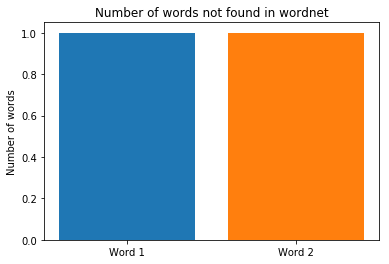

In [18]:
fig , ax = plt.subplots()

ax.bar(   'Word 1'  , len(given_data[given_data['English Word 1 AL1'] == '']) )
ax.bar(   'Word 2'  , len(given_data[given_data['English Word 2 AL1'] == '']))

# ax.legend()

plt.title('Number of words not found in wordnet')
# plt.xlabel('Number of Time words not found in wordnet')
plt.ylabel('Number of words')
plt.show()

In [19]:
print ( "Number of pairs having 0 similarity = " ,len(given_data[given_data['Jaccard A1'] == 0]))
print ( "Number of pairs having similarity except 0 = " ,len(given_data[given_data['Jaccard A1'] != 0]))

Number of pairs having 0 similarity =  475
Number of pairs having similarity except 0 =  25


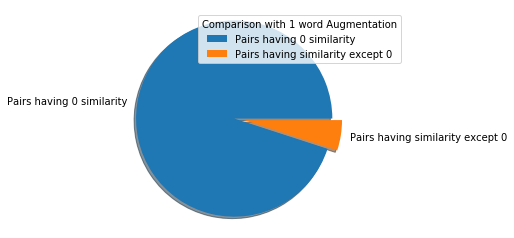

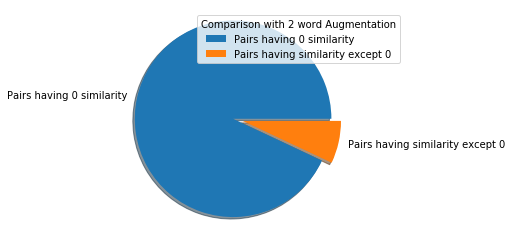

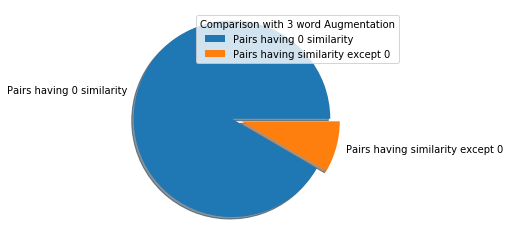

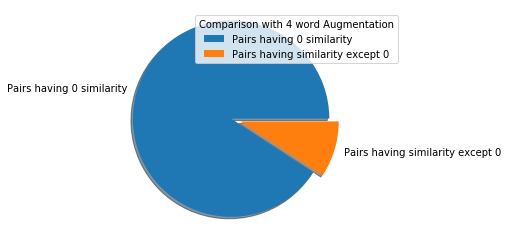

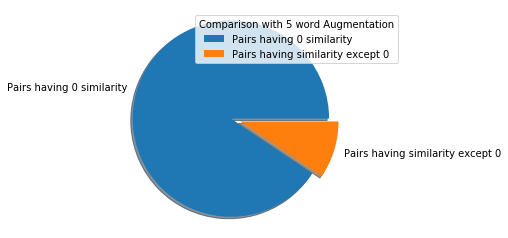

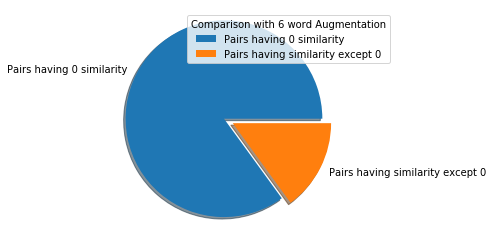

In [20]:
for i in range(1, 7):
    labels_text = ['Pairs having 0 similarity' , 'Pairs having similarity except 0']
    values = [len(given_data[given_data['Jaccard A' + str(i)] == 0]) , 
             len(given_data[given_data['Jaccard A' + str(i)] != 0])]
    explode_value = [0 , 0.1]
    plt.pie(values , explode = explode_value , labels = labels_text , shadow = True, startangle = 0 )
    plt.axis('equal')
    plt.legend(title = "Comparison with " + str(i)+ " word Augmentation")
    plt.show()

In [1]:
from scipy.stats import pearsonr
from beautifultable import BeautifulTable

In [22]:
table = BeautifulTable()
table.column_headers = ["Data", "Number of zero similarity", "Number of non zero similarity"]
print("Similarty using Jaccard")
for i in range(1 , 7):
    table.append_row([str(i) + " Word Augmentation",
                     len(given_data[given_data['Jaccard A' + str(i)] == 0]),
                     len(given_data[given_data['Jaccard A' + str(i)] != 0])])
print(table)

Similarty using Jaccard
+---------------------+-------------------------+------------------------------+
|        Data         | Number of zero similari | Number of non zero similarit |
|                     |           ty            |              y               |
+---------------------+-------------------------+------------------------------+
| 1 Word Augmentation |           475           |              25              |
+---------------------+-------------------------+------------------------------+
| 2 Word Augmentation |           465           |              35              |
+---------------------+-------------------------+------------------------------+
| 3 Word Augmentation |           458           |              42              |
+---------------------+-------------------------+------------------------------+
| 4 Word Augmentation |           454           |              46              |
+---------------------+-------------------------+------------------------------+
| 5 

In [23]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Dice A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Overlap A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Containment A" + str(i)]))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.294  | 0.294 |  0.294  |    0.294    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.324  | 0.343 |  0.343  |    0.343    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.339  | 0.364 |  0.364  |    0.364    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.351  | 0.377 |  0.377  |    0.377    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.348  | 0.376 |  0.376  |    0.376    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.368  | 0.409 |  0.439  |    0.411    |
+---------------------+---------+-------+----

In [32]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(given_data["score"]), list((4 * given_data["Jaccard A" + str(i)])))[0],
                      pearsonr(list(given_data["score"]), list((4 * given_data["Dice A" + str(i)])))[0],
                      pearsonr(list(given_data["score"]), list((4 * given_data["Overlap A" + str(i)])))[0],
                      pearsonr(list(given_data["score"]), list((4 * given_data["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.294  | 0.294 |  0.294  |    0.294    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.324  | 0.343 |  0.343  |    0.343    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.339  | 0.364 |  0.364  |    0.364    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.351  | 0.377 |  0.377  |    0.377    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.348  | 0.376 |  0.376  |    0.376    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.368  | 0.409 |  0.439  |    0.411    |
+---------------------+---------+-------+----

In [2]:
import pandas as pd
from scipy.stats import spearmanr
from beautifultable import BeautifulTable

In [3]:
given_data = pd.read_excel('dataset with similarity score after augmenting with babelnet 1_2_3_4_5.xlsx')
given_data

Unnamed: 0       English Word 1       English word 2  score  Unnamed: 3  \
0             0                Joule           spacecraft   0.58         NaN   
1             1        Promised Land                 Baku   0.42         NaN   
2             2                  car              bicycle   2.83         NaN   
3             3           polyhedron                actor   0.00         NaN   
4             4   multiple sclerosis                   MS   3.92         NaN   
5             5                fault               system   0.58         NaN   
6             6               weapon               helmet   1.83         NaN   
7             7         screenwriter           television   1.67         NaN   
8             8       United Nations          Ban Ki-moon   2.50         NaN   
9             9         Si-o-seh pol  Mathematical Bridge   3.00         NaN   
10           10             basilica               mosaic   1.50         NaN   
11           11  watercolor painting                brush   2.00         NaN   
12           12            democracy             monarchy   2.67         NaN   
13           13                Gauss            scientist   3.00         NaN   
14           14         tuberculosis                  LED   0.00         NaN   
15           15     self-driving car       autonomous car   4.00         NaN   
16           16           apocalypse                 fire   1.25         NaN   
17           17                speed                 post   0.25         NaN   
18           18          PlayStation                  Wii   3.25         NaN   
19           19               laptop             notebook   4.00         NaN   
20           20         Harry Potter               wizard   3.00         NaN   
21           21            snowboard               skiing   3.17         NaN   
22           22              pointer                slide   1.33         NaN   
23           23               sensor             radiator   1.25         NaN   
24           24                  hit                frame   0.42         NaN   
25           25               theory           hypothesis   3.83         NaN   
26           26          Wall Street     financial market   2.92         NaN   
27           27               Darwin            evolution   2.58         NaN   
28           28                actor              actress   3.42         NaN   
29           29                 film              theatre   2.25         NaN   
..          ...                  ...                  ...    ...         ...   
470         470           subroutine             compiler   2.67         NaN   
471         471              Hamadan                 Rome   2.58         NaN   
472         472             umbrella               heater   0.17         NaN   
473         473                honor               esteem   3.25         NaN   
474         474             insignia              dignity   0.58         NaN   
475         475                  KFC           McDonald's   3.17         NaN   
476         476             joystick                radar   0.67         NaN   
477         477              basmati         jasmine rice   3.58         NaN   
478         478                medal             trainers   0.42         NaN   
479         479                  law        swimming pool   0.08         NaN   
480         480               source                  box   0.00         NaN   
481         481              theatre              battery   0.00         NaN   
482         482                flora          web browser   0.00         NaN   
483         483                shirt             cardigan   3.25         NaN   
484         484                 poem               rhythm   1.42         NaN   
485         485              prophet               priest   2.58         NaN   
486         486               Oscars              stadium   0.08         NaN   
487         487           backgammon                   Go   3.25         NaN   
488  

In [26]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(given_data["score"]), list( given_data["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Dice A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Overlap A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.305  | 0.305 |  0.305  |    0.305    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.371  | 0.371 |  0.371  |    0.371    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.407  | 0.407 |  0.407  |    0.407    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.419  | 0.419 |  0.419  |    0.419    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.425  | 0.425 |  0.425  |    0.425    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.469  | 0.469 |  0.469  |    0.468    |
+---------------------+---------+-------+---

In [27]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(given_data["score"]), list( 4 * given_data["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list( 4 * given_data["Dice A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list( 4 * given_data["Overlap A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list( 4 * given_data["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.305  | 0.305 |  0.305  |    0.305    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.371  | 0.371 |  0.371  |    0.371    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.407  | 0.407 |  0.407  |    0.407    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.419  | 0.419 |  0.419  |    0.419    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.425  | 0.425 |  0.425  |    0.425    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.469  | 0.469 |  0.469  |    0.468    |
+---------------------+---------+-------+---

# Target only overlaping sets

In [3]:
df_nonZero =  given_data[given_data['Jaccard A6'] != 0.0]

In [6]:
df_nonZero.shape

(75, 46)

In [9]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_nonZero["score"]), list((4 * df_nonZero["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_nonZero["score"]), list((4 * df_nonZero["Dice A" + str(i)])))[0],
                      pearsonr(list(df_nonZero["score"]), list((4 * df_nonZero["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_nonZero["score"]), list((4 * df_nonZero["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.22   | 0.22  |  0.22   |    0.22     |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.287  | 0.308 |  0.308  |    0.308    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.332  | 0.352 |  0.352  |    0.352    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.357  | 0.379 |  0.379  |    0.379    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.344  | 0.371 |  0.371  |    0.371    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.443  | 0.515 |  0.591  |    0.525    |
+---------------------+---------+-------+----

In [10]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_nonZero["score"]), list( 4 * df_nonZero["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_nonZero["score"]), list( 4 * df_nonZero["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_nonZero["score"]), list( 4 * df_nonZero["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_nonZero["score"]), list( 4 * df_nonZero["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.41   | 0.41  |  0.41   |    0.41     |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.501  | 0.501 |  0.501  |    0.501    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.513  | 0.513 |  0.513  |    0.513    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.519  | 0.519 |  0.519  |    0.519    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.519  | 0.519 |  0.519  |    0.519    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.735  | 0.735 |  0.735  |    0.71     |
+---------------------+---------+-------+---

# Comparison

In [16]:
df_Zero =  given_data[given_data['Jaccard A6'] == 0.0]
print(df_Zero.shape)
for index, row in df_Zero.iterrows():
    print(index , "\n" ,row["English Word 1 AL6"], "=======================================" ,row["English Word 2 AL6"])

(425, 46)
0 
 centijoule,attojoule,zetajoule,w·s,watt_seconds,decajoule,exajoules,list_of_converted_amounts_of_joules,decijoule,j,terajoules,hectojoule,watt_second,petajoules,picojoule,exajoule,si_unit_of_energy,kilojoules,j._p._joule,w_s,ocrajoule,james_prescott_joule,joule,james_joule,gigajoules,megajoule,kilojoule,millijoule,j._joule,watt-second,james_p._joule,yoctojoule,femtojoule,μj,watt-seconds,terajoule,zettajoule,kj,j.p._joule,yottajoule,joules,petajoule,joule_programming_language,nanojoule,gigajoule,megajoules,zeptojoule ======================================= spacecraft_instrumentation,tracking,_telemetry,_and_control,starship,spaceship,spacecrafts,orbital_vehicle,interstellar_spacecraft,starship_class,spacecraft_system,star_ship,space-craft,rocketship,space_ship,space_ships,tt&c,starships,space_craft,interstellar_spaceship,list_of_spacecraft,ballistic_capsule,spacecraft_structure,space_vehicle,spacecraft,star_ships,space-ship,rocket_ship,starcraft,spacecraft_communication,sp

 business_ecology,ecosystems,ecosysytem,business_ecosystem,ecological_system,biosystem,business_ecosystems,tropical_ecosystem,ecosystem_function,eco-systems,ecosytem,eco-system,ecosystem,ecological_systems,ecosystem_dynamics ======================================= save_and_invest,economic_inefficiency,economy_system,econs.,the_bean-field,total_liabilities,personal_savings,economic_inefficiencies,economic_sector,user:justicesoldier,economic_policy_advisory_board,history_of_modern_economics,theoretical_economics,school_of_economics_and_business_administration,finances,anchor_economy,economists,national_economy,econs,economic_politics,œconomics,strike_the_root,economic_science,political_economics,list_of_economic_systems,response_probability,econ.,economics_school,economic_theories,types_of_economic_systems,economically,economically_efficient,folk_economics,ecomonics,economy,_pa,saving_rate,national_economies,savings_rate,economic_doctrine,economic_system,real_economy,economiks,minister_o

486 
 oscar_sunday,academy_scientific_and_engineering_award,academy_award_of_merit,oscar_statuette,oscar_award,acadamy_award,acadamy_awards,academyawards,oscars®,the_oscarr,oscar_nominations,oscar_winning,the_academy_awards,the_oscar,academy_award,the_oscars,list_of_academy_award_winner,oscar,oscar_nomination,oscars,academy_award_nominations,oscar_winner,oscar_awards,oscar_statue,oscers,academy_awards,academy_award_nomination,acadmey_award,91st_academy_awards,academy-award,list_of_academy_award_winners ======================================= stadium_de_toulouse,stadium®,indoor_stadium,stadium_-_ithan_avenue,sports_stadium,staduim,stadium-ithan_avenue_station,akon_discography,stadiums,heriberto_jara_corona_stadium,🏟,sports_stadia,stadium–ithan_avenue_station,events_center,good_girls_lie,stade_chapou,estadio,stadium_lrt_station,sports_arena,track_and_field_stadium,stadium®_software,stade_de_toulouse,domed_stadium,stadium_–_ithan_avenue,bowl,sport_arena,stadium_-_ithan_avenue_station,idre

# Target only non empty sets

In [4]:
df_noNan =  given_data[given_data['English Word 1 AL6'].notnull()]
df_noNan.shape

(499, 46)

In [5]:
df_noNan =  df_noNan[df_noNan['English Word 2 AL6'].notnull()]
df_noNan.shape

(498, 46)

In [6]:
df_noNan

Unnamed: 0       English Word 1       English word 2  score  Unnamed: 3  \
0             0                Joule           spacecraft   0.58         NaN   
1             1        Promised Land                 Baku   0.42         NaN   
2             2                  car              bicycle   2.83         NaN   
3             3           polyhedron                actor   0.00         NaN   
4             4   multiple sclerosis                   MS   3.92         NaN   
5             5                fault               system   0.58         NaN   
6             6               weapon               helmet   1.83         NaN   
7             7         screenwriter           television   1.67         NaN   
8             8       United Nations          Ban Ki-moon   2.50         NaN   
9             9         Si-o-seh pol  Mathematical Bridge   3.00         NaN   
10           10             basilica               mosaic   1.50         NaN   
11           11  watercolor painting                brush   2.00         NaN   
12           12            democracy             monarchy   2.67         NaN   
13           13                Gauss            scientist   3.00         NaN   
14           14         tuberculosis                  LED   0.00         NaN   
15           15     self-driving car       autonomous car   4.00         NaN   
16           16           apocalypse                 fire   1.25         NaN   
17           17                speed                 post   0.25         NaN   
18           18          PlayStation                  Wii   3.25         NaN   
19           19               laptop             notebook   4.00         NaN   
20           20         Harry Potter               wizard   3.00         NaN   
21           21            snowboard               skiing   3.17         NaN   
22           22              pointer                slide   1.33         NaN   
23           23               sensor             radiator   1.25         NaN   
24           24                  hit                frame   0.42         NaN   
25           25               theory           hypothesis   3.83         NaN   
26           26          Wall Street     financial market   2.92         NaN   
27           27               Darwin            evolution   2.58         NaN   
28           28                actor              actress   3.42         NaN   
29           29                 film              theatre   2.25         NaN   
..          ...                  ...                  ...    ...         ...   
470         470           subroutine             compiler   2.67         NaN   
471         471              Hamadan                 Rome   2.58         NaN   
472         472             umbrella               heater   0.17         NaN   
473         473                honor               esteem   3.25         NaN   
474         474             insignia              dignity   0.58         NaN   
475         475                  KFC           McDonald's   3.17         NaN   
476         476             joystick                radar   0.67         NaN   
477         477              basmati         jasmine rice   3.58         NaN   
478         478                medal             trainers   0.42         NaN   
479         479                  law        swimming pool   0.08         NaN   
480         480               source                  box   0.00         NaN   
481         481              theatre              battery   0.00         NaN   
482         482                flora          web browser   0.00         NaN   
483         483                shirt             cardigan   3.25         NaN   
484         484                 poem               rhythm   1.42         NaN   
485         485              prophet               priest   2.58         NaN   
486         486               Oscars              stadium   0.08         NaN   
487         487           backgammon                   Go   3.25         NaN   
488  

In [7]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Dice A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.294  | 0.294 |  0.294  |    0.294    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.324  | 0.343 |  0.343  |    0.343    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.339  | 0.364 |  0.364  |    0.364    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.351  | 0.377 |  0.377  |    0.377    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.348  | 0.376 |  0.376  |    0.376    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.368  | 0.409 |  0.439  |    0.411    |
+---------------------+---------+-------+----

In [8]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.305  | 0.305 |  0.305  |    0.305    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.371  | 0.371 |  0.371  |    0.371    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.408  | 0.408 |  0.408  |    0.408    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.419  | 0.419 |  0.419  |    0.419    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.426  | 0.426 |  0.426  |    0.426    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.469  | 0.469 |  0.469  |    0.469    |
+---------------------+---------+-------+---

# Stemming

In [9]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [10]:
def getStemString(words_list):
    list_of_words = words_list.split(',')
    for i in range(0 , len(list_of_words)):
        list_of_words[i] = porter.stem(list_of_words[i])
    list_of_words = list(set(list_of_words))
    return ",".join(list_of_words)

In [11]:
for index, row in df_noNan.iterrows():
    print(index)
    print(row['English Word 1'])
    print(row["English Word 1 AL6"])
    after_stem_1 = getStemString(row["English Word 1 AL6"])
    print(after_stem_1)
    df_noNan.at[index, "English Word 1 AL6"] = after_stem_1
    print("=======================================" )
    print(row['English word 2'])
    print(row["English Word 2 AL6"])
    after_stem_2 =getStemString(row["English Word 2 AL6"])
    print(after_stem_2)
    df_noNan.at[index, "English Word 2 AL6"] = after_stem_2
    print("=======================================" )
    print("=======================================" )
    print("=======================================" )

0
Joule
centijoule,attojoule,zetajoule,w·s,watt_seconds,decajoule,exajoules,list_of_converted_amounts_of_joules,decijoule,j,terajoules,hectojoule,watt_second,petajoules,picojoule,exajoule,si_unit_of_energy,kilojoules,j._p._joule,w_s,ocrajoule,james_prescott_joule,joule,james_joule,gigajoules,megajoule,kilojoule,millijoule,j._joule,watt-second,james_p._joule,yoctojoule,femtojoule,μj,watt-seconds,terajoule,zettajoule,kj,j.p._joule,yottajoule,joules,petajoule,joule_programming_language,nanojoule,gigajoule,megajoules,zeptojoule
megajoul,watt-second,terajoul,picojoul,decajoul,joul,joule_programming_languag,millijoul,yottajoul,gigajoul,μj,femtojoul,zeptojoul,j.p._joul,petajoul,w·,hectojoul,centijoul,attojoul,watt_second,james_joul,kj,zetajoul,decijoul,ocrajoul,zettajoul,nanojoul,exajoul,james_prescott_joul,w_,j,list_of_converted_amounts_of_joul,kilojoul,j._p._joul,yoctojoul,j._joul,si_unit_of_energi,james_p._joul
spacecraft
spacecraft_instrumentation,tracking,_telemetry,_and_control,starship

scriptwrit,screen_writ,script_writ,screenplay_writ,screen-writ,film_writ,writer,scenarist,movie_writ,scenario_writ,script-writ,screenwrit,screen_play_writ,american_screenwrit
television
fernsehen,television_sets,tely,telly_vision,televisión,small_screen,television_actress,high_definition_television,television_industries,the_tely,tv,idiot_box,google_box,high-definition_television,t._v.,telly,sjónvarp,television_industry,little_johnny_jewel,shit_pump,outdoor_television,televeision,the_television,telavision,télévision,old_television,watching_tv,working_principle_of_tv,the_tele,television_set,televison,idiot's_lantern,televison_actor,television/band,tv_reciever,tracks_on_wax_4,babble-box,video,television,televisione,black_and_white_tv,fernsehapparat,jumping_box,outdoor_tv,retroprojector,t.v,televised,crt_television,telecasting,used_television,t_v,analogue_tv_channels,televesion,telivision,user:patladwig/television,television_system,new_television,telebisyon,tv_set,televisions,tee_vee,telev

olde_english_grammar,web_hit,shoulder_strik,page_hit,bang,collid,navea_training_cent,hit_during_the_iraq_war,henson_international_televis,h._i._t.,dispatch,shoulderbutt,old_english_grammar,old_english_personal_pronoun,ridgehand,get,basehit,lyons_partnership,arrive_at,_iraq,make,bump_off,old_english_syntax,hit_entertainment_plc,baseball_statistics/h,old_english_declens,h.i.t.,_qasr-e_qand,old_english_preposit,the_hit,is,gain,heet_district,hīt_district,alternatives_to_fist_strik,shouldershot,score,strike,hit_district,jostl,shoulderstrik,hit,hīt,collision_of_bodi,stumbl,old_english_morpholog,arriv,shoot,shoulder-butt,hit_ratio,collis,trhak,talli,shoulder_butt,unique_hit,shoulder-strik,hīt_during_the_iraq_war,remov,thu,hit_entertain,collide_with,smash,come,safeti,old_english_languag,trhák,wit,smasher,palm_strik,old_english_determin,ġē,attack,hitting_a_basebal,shoulder_shot,impinge_on,allis,shoulder-shot,base_hit,closing_spe,crash,murder,off,attain,old_english_pronoun,slay,personal_pronouns

fuel_supply_system,energy_depart,total_energi,vulner,vital_essence_theori,cal,artificial_lif,gram_calori,electrical_energi,save_the_night,fuel_suppli,the_collect,negative_energi,life_energi,history_of_vit,vital_force_theori,calori,energy_suppli,electric_potential_energi,place_of_pow,vitalist_theori,un/locode:userg,vitalistic_medicin,doe,energy_technolog,department_of_energi,energy_and_societi,subtle_energi,vitalist,psychic_energi,get-up-and-go,vigor,vim,large_calori,physical_energi,energy_qu,favorite_gam,gonna_find_y,vital,muscular,as4,electr,operation_ivy_album,electric_energi,psychological_energi,energy_nusa_derenda,energy_field,food_energi,dietary_calori,vital_principl,earth_energi,measurement_of_energi,free_energi,energy_transf,kilogram_calori,mental_act,au_gust_zilel,thermodynamic_free_energi,alesta:_the_remix_+,operation_ivi,push,keri_hilson_energi,cosmic_energi,vital_energi,ciao,vitalism_theori,psi_field,emotional_energi,mental_energi,bad_energi,vital_fluid,free_energy_chang,ene

television_relay_st,court_interpret,sign_language_interpret,broadcast_transl,intepret,programming_language_processor,target_languag,satellite_st,simultaneous_interpret,rebroadcast,broadcast_relay_st,tv_relay_transmitt,interper,translator_st,semi-satellit,television_transl,medical_interpret,booster_st,american_sign_language_interpret,relay_transmitt,interpret,relay_st,simultaneous_transl,dubash,tv_translat,broadcast_relay,transcrib,satel,programming_language_process,radio_transl,great_translator_invas,fm_translat,consecutive_interpret,language_interpret,national_relay_servic,translat,program_transl,translating_program
foreigner
british_swag,foreigner_suite,noncitizen,illegal_aliens,nonresident_alien,sal-afsan,protector,peacemaker,non-resident_alien,assa,the_quintaglio_ascension,live_your_life,bren_cameron,tracker,steal_my_breath_away,kill_me_tonight,conspirator,i'm_ready,deceiver,precursor,intruder,explorer,visitor,resident_aliens,quintaglio_ascension,afsan,convergence,counterfeit,quint

antitumor_drug,tumoricid,low_level_disinfect,chemotherapeutic_ag,chemotherapeut,chemo,cancer_drug,anticancer_ag,chemo_therapi,chemotherapy_treat,anticancer_antibiot,side_effects_of_chemotherapi,microbiocid,chemotherapeutic_drug,disinfect,anticancer_drug,side_effects_of_cancer_treat,chemotheraput,oral_chemotherapi,antineoplast,ctx,high-level_disinfect,antimicrobial_therapi,antimitotic_ag,cancer_chemotherapi,maintenance_chemotherapi,sanitis,anti-neoplastic_chemotherapi,cytostat,antineoplastic_drug,chemotherapy_for_anim,antitumour_antibiot,chemotherapy_for_canc,disinfectants_and_sanit,anti-cancer_drug,cytotoxic_drug,antimicrobi,antimicrobial_ag,chemothreapi,levels_of_disinfect,sporicid,antimicrobial_drug,anti-tumor,anti-mitot,high-dose_alkylating_chemotherapi,jeypin,khemotherapi,chemotherapi,antimitotic_drug,sunlight_is_the_best_disinfect,antitumor,antineoplastic_medicin,chemoprevent,antitumor_antibiot,wet_on,germicid,palliative_chemotherapi,chemotherapy_drug,antitumour,sanit,cytotoxic_an

idioma_inglé,lëon_marie_bloy,bloy,lagging_for_the_break,english_speak,u.k._english,english-languag,jump_shot,people_of_england,united_kingdom_english,english_of_britain,united_states_english,us_acc,number_of_words_in_english,side,british_dialect_of_english,american_english_phonolog,pakistani_english,sudanese_english,amerenglish,american_english_languag,usan_english,english_of_great_britain,english_desc,cue_sports_glossari,engla,scotch_doubl,english_vocabulari,_crawford_counti,us_english,english-speak,the_english_languag,double_opt-out,en_u,frame,scotch_doubles_tourna,english_studi,aiden_english,three_foul_rul,english_of_the_united_kingdom,british_vari,u.s._english,bre,anglesc,_billiards_and_snook,american-english,_léon,english_language_in_britain,countries_that_teach_english_as_a_foreign_languag,english_and_literary_studi,opt-out,en,en-uk,_in,english_n,glossary_of_billiard,_and_snook,billiard_lingo,english_genealog,spoken_english,total_clear,englishlanguag,glossary_of_snooker_term,fluk

80
government
forms_of_government,royal_thai_government,list_of_forms_of_government,governmental_administration,governs,government_types,governmentally,public_governments,govermint,types_of_government,political_analysts,system_of_government,rialtas,cabinet_of_ireland,poli-sci,political_taxonomy,public_government,government_in_ireland,government_program,participatory_governance,govt,gummint,regime_government,-cracy,political_scientist,seat_of_government,forms_of_leadership,government_of_the_republic_of_ireland,politologist,government_form,political_scientists,government_of_republic_of_ireland,systems_of_government,classifications_of_government,private_governments,irish_government,rection,polysci,private_governance,poli_sci,political_typology,governments,gov't,govern_ment,politics,the_government_of_ireland,regime,political_analytics,shared_government,government_street,political_science,irish_cabinet,list_of_government_forms,cracy,rulership,government_of_thailand,earthly_government,govt.,

blude,blood_curd,cancer,caleb,genetic_inherit,rakehel,persistence_of_tim,bordeaux_ros,blood_in_food,blood:_cryptic_passag,blood_composit,cheogh,blood_indian,rhye,blood_oxygen-carrying_capac,christopher_paul_persaud-jagdhar,talk_to_h,hemic,proflig,blood_color,the_rise_and_fall_of_my_chemical_rom,blood.,herid,blo,blood_as_food,syndicat_des_vins_de_bordeaux_et_bordeaux_superieur,vs.,oxygen_transport,cj,blood_brothers_auto_&_machine_compani,pedigre,hereditari,transporting_oxygen,h8_red,heaven_help_u,the_blood,rip,deoxygenated_blood,kainai,science_of_hered,shial,dead,the_end,not_listen,pearl_jam,classified_bordeaux,sleep,parentag,familial_trait,hello_mast,c.j,indiffer,bl00d,blood,leash,bordeaux_plan,blood_ingest,haemochrom,genetic_lin,ryan_hoyl,oxygen-carrying_capac,the_end.,bloodlin,cj_wildheart,hered,lay_down,origin,káínawa_ᖿᐟᖻᖷ,rake,jesse_triplett,the_black_parad,bordeaux_win,ancestri,inherited_trait,human_blood,plan_bordeaux,collective_soul,blood_lin,line_of_desc,kainah,getting_away_wit

scottish,palace_mus,shirts_and_boot,gener,bonnie_prince_billi,the_thrill_of_it_al,bonnie_"prince"_billi,palac,best_troubador,danish,palace_film,palace:_the_locked_heart_jad,paço,blind_ey,scottish_bastard,joseph_will_oldham,midnight_train,royal_palac,bonny_prince_billi,castl,royal_resid,bonnie_“prince”_billi,gung,leader_of_the_pack,wil_oldham,babi,bonny_billi,say_it_first,jang,shit_head,scar,palati,palace_broth,lucki,the_palace_(2011)_film,bonnie_billi,_you_make_me_crazi,shithead,the_palac,grand_hotel,shed,gong,palace_films_and_cinema,palas,nothing_left_for_y,bonny_'prince'_billi,bonnie_'prince'_billi,bonnie_«prince»_billi,palace_hotel,idiot,_gong_suo_xin_yu,palazzo,no_peac,one_day_at_a_tim,karma,gong_suo_xin_yu,palace:_lock_sinensi,shed_palace_and_karma,drug,palace_soundtrack,palace_song,him,poo_head,will_oldham
skyscraper
high-rise,skycraper,sky-scraper,six_flags_geauga_lake,sky_scrapers,skyscraper_city,six_flags_worlds_of_adventure,commercial_towers,tall_stories,stiletto_skyscraper,s

grew_ic,enemi,phencyclidine_hydrochlorid,5.15,dj_khaled_intro,dihydrogen_oxid,diprotium_oxid,h₂o,states_of_wat,blood_red_sho,let_shit_go,pharmaci,formations_of_ic,heat_capacity_of_wat,secret,sterile_wat,trust_m,love,victory_for_the_magpi,formed_ic,party_ic,you_got_m,heartbreak_on_a_full_moon,brush_fenc,specific_heat_of_wat,happy_stick,put_it_down,wee-we,oh2,uncommon_phases_of_water_ic,water_vapour,chemical_properties_of_wat,water_ic,hands_up,municipal_water_suppli,classical_element/wat,sterile_water_for_irrig,vertical_horse_jump,ice-thirteen,ice_six,producing_of_ic,body_of_wat,hydroxylic_acid,you_lik,killer_we,phases_of_ic,to_my_b,producing_ic,hydrol,the_sea,water-work,water_sourc,frozen_lak,water_supply_system,5_15,growing_of_ic,h1.5o,water_condens,clear_and_copi,ice_iv,the_great_mystery_of_wat,forms_of_ic,gaseous_wat,frozen_wat,pull_up,ice_thirteen,production_of_ic,call_if_you_need_m,formation_of_ic,hurt_the_sam,water,wateri,dust,air_moistur,if_it_ain’t_m,human_piss,amp,μ-oxido_dihyd

rain:_the_terror_within...,jeong_ji-hoon_정지훈,judi,zheng_zhixun,_mother,supply_and_demand,regen,bi_rain/version_2,rainwat,rain_am_lech,just_a_boy,hurt_befor,jeong_ji_hoon,_sweat_&_tear,rainstorm,recycl,memory_in_my_hand,rain_measur,rain/bonni,intensity_frequency_and_dur,_and_tora_woloshin_band,another_lifetim,rain_/_bridge_over_troubled_wat,rain_down,raindrop,bi,rainfal,pissing_it_down,정지훈,creatures_of_the_night,heavy_rain:_the_taxidermist,raini,american_dream,three_generations_are_enough,pelt,jeong_ji-hoon,rain's_coming_world_tour,night,csi:_ni,rain_ep,on_the_job,payton_bank,in_blu,_swabia,bi/rain,ji_hoon_jung,bi_rain,'til_death_do_we_part,talkin'_'bout_himself,one_night,🌦,give_it_all_up,rain_wat,_kentucki,the_origami_kil,blood,rainfall_intens,peyton_bank,fall_back,bonnie_maxon,the_fal,hyetal,simone_battl,it's_rain,norman_jayden,blink,wettest_spot_on_earth,torrential_rain,jung_ji_hoon,lost_in_the_rain,ke'ke',sadie_thompson,origami_kil,crime_&_misdemeanor,pluviophil,at_your_sid,rainiest

times_europa_offic,times_symbol,timesonline.co.uk,tournament_in_management_and_engineering_skil,times_europa,multiplikand,multiplication_symbol,times_new_roman,the_tim,times_class,multiplication_as_juxtaposit,times_modern,the_times_of_london,⋅,implicite_multipl,3chordfold_puls,arithmetic/multipl,clarita,dot_oper,times_magazin,integer_multipl,into_sign,multiplication_denoted_by_juxtaposit,times_new_roman_wgl,product_of_a_sequ,product,times_4-line_mathematics_series_569,terrace_martin,explicite_multipl,white_tim,multiplication_sign,multiplik,times_roman_font,the_times_onlin,daily_universal_regist,the_daily_universal_regist,times_roman_ten,the_times_magazin,times_onlin,times,times_new_roman_font,multiplication_x,times_new_roman_world,capital_pi_not,times2,the_london_tim,times_millennium,implicit_multipl,3chordfold_-_remix,_ireland_edit,logographi,⊠,capital-pi_not,multiply_sign,multiplied_bi,×,times_roman,multipli,times_series_827,thetimes.co.uk,cg_time,pi_not,times_of_london,timesonlin,ti

heavy_metal:_fakk2,melodic_heavy_met,bienver_met,the_skin_of_my_yellow_country_teeth,downer_rock,f.a.k.k._2,melodic_met,_heavi,_inc.,egyptian_heavy_metal_mus,rock_met,metal_mus,heavy_metal:_f.a.k.k.2,canelo_casa,alakazam_!,heavy_metal_band,traditional_met,1980s_heavy_metal_mus,sunshine_and_cloud,ram_it_down,new_met,heavy_metal_d,proto_met,tribal_met,hm_music,details_of_the_war,heavy_metal_f.a.k.k.2,heavy_metal:_music_from_the_motion_pictur,heavy_metal_mus,heavy_blues-rock,erick_casa,blood_red_ski,1960s_heavy_met,proto-met,metal_rock,heavy_metal_contamin,fakk2,heavy_el,protomet,toxic_heavy_met,hm_commun,egyptian_heavy_met,heavy_met,stop,modern_met,heavy_m_mus,heavy_metal:_f.a.k.k.²,heavy_metal_in_muslim_majority_countri,clap_your_hands_say_yeah,heavy_metal_tox,old-school_met,upon_this_tidal_wave_of_young_blood,heavy_metal_fakk2,1980s_heavy_met,loc-nar,trad_met,hard_and_heavi,heavy_metal_in_islamic_countri,heavy_metal_f.a.k.k.²,metallic_mus,pleasur,alakazam!,old_school_met,_nervous_syste

wizard:_the_guide_to_com,oz,what_have_you_done?,wingless_wizard,the_duk,henchman,istari,miracle_work,aa_dinwiddi,paul_canero,wizard:_wizard:_the_magazine_of_com,list_of_blue_wizard,octavo,100_greatest_villain,wizard's_power-glov,archmagi,dungeon,witch-craft,thaumaturgu,corpse-poison,thaumatourgo,the_tower_of_art,wizard,the_jiggl,necromanc,ook_languag,tranc,intenditor,magic_us,social_maven,sensat,magia,wizard_magazin,star,magic_circl,archmag,wizard:_the_magazine_of_com,adventure_time_with_finn_and_jak,superstar,wizard:_the_comics_magazin,adept,oook,whizz,ozpinhead,setup_wizard,wizard's_anti-grav_disc,geniu,the_witch's_garden,ponder_stibbon,wizard_fan_award,bewitch,russian_witchcraft,djamb,unseen_univers,witchcraft,maven,ritual_magick,magical_phras,memories_of_boom_boom_mountain,spellcraft,archchancellor,what_is_lif,charm,wizardli,librarian,mavin,supputit,witch,áńt’į,software_assist,ace,the_bursar,archwizard,beto_vázquez_infin,witcheri,evok,setup_assist,hedge_wizard,adrian_turnipse,mega_

motherboard.vice.com,cyberchase_charact,motherboard_magazin,mobo,vice_magazin,pc_motherboard_form_factor,digit_leboid,vice_united_st,cybersit,secondary_logic_board,the_hack,pc_motherboard,planar_board,cpu_board,motherboard,mainboard,logicboard,noisey,list_of_vice_magazine_issu,within,matt,systemboard,touch,logic_board,random_access_memori,digit,list_of_characters_from_cyberchas,vice,vice.com,hacker,thump,horizon,inez,ram_album,system_board,hardware_board,main_board,integrated_peripher,computer_motherboard,vice_motherboard,jacki,main_logic_board,list_of_cyberchase_charact,cyber_chas,mother_board,delet,beyond,kareem_blackwel,dr._marbl,cyberchas,vicenew,buzz,cpu_card
mainboard
main_logic_board,main_board,cpu_board,mobo,pc_motherboard_form_factor,pc_motherboard,system_board,pc_motherboards,cpu_card,mother_board,planar_board,secondary_logic_board,logic_board,systemboard,cpu_cards,mainboard,integrated_peripheral,computer_motherboard,motherboard,logicboard,hardware_board,motherboards
system_b

head_hair,konoha_military_polic,anbu,absent_root,tonal_centr,kirigakur,radic,surds_and_indic,kaergera,word_stem,vanishing_funct,signs_of_short_ascens,deep_root,base,pelage_hair,deep-root,anteced,labelled_tre,hunter_nin,medic_nin,tone-cent,tooth_root,naruto_clan,unlock_root,kurama_clan,bulbus_pili,radical_symbol,hair_textur,begin,cymotrich,rootl,x-intercept,ichiraku,plant_root,radikand,amegakur,hyūga_clan,roots_of_a_funct,interv,leaf,rooting_the_android_operating_system,forest,root_credenti,rinnengan,root_password,zero_of_a_funct,ancestor,tonic,human_hair,custom_rom,sixth_root,hyuuga_clan,harmonic_interv,sixth_interv,rootag,tonic_not,bijū,basse_fondemental,root_of_a_funct,tree_root,graph-theoretical_tre,sunagakur,ascend,zeroes_of_a_funct,land_of_fir,computer_administr,root_word,sign_of_short_ascens,zero,noun_stem,take_root,naruto_geographi,steady_down,radical_express,naruto_world,tree_graph,hair_shaft,tree,roots_of_the_hair,s-class,jinchuriki,vertic,null,pitch_cent,administrator_right,s

greensward,grassland_clim,grassland,_texa,open_plain,grassland_ecosystem,grassland_biom,grassveld,_tx,grass_land,greens_ward
195
guitar
left_handed_guitar,guitar_tone,strap_lock_system,guiatr,guiatar,rhythm_guitar_solo,rock_guitar,guitar_history,belly_fiddler,gitar,history_of_guitars,rhythm_guitars,usa_guitar,guitar_strap,the_guitar,parts_of_the_guitar,playing_guitars,rhythm_guitarist,guitar_music,gitfiddle,gatar,archguitar,guitar_instruction,rhythm_guitar,guitar,history_of_the_guitar,six-string_guitar,guitar_lesson,black_plastic_guitar_case,🎸,guitar_components,guitar_lessons,gitarre,kinds_of_guitars,guitariste,(ewan_dobson_album),gitiar,guitars,user:blackiedog/garbles,geetar,saddle,gutiar,types_of_guitars,6-string_guitar,rythm_guitar,giutar
playing_guitar,the_guitar,guitar_ton,gitar,saddl,archguitar,guitar_instruct,history_of_the_guitar,left_handed_guitar,(ewan_dobson_album),black_plastic_guitar_cas,six-string_guitar,gitarr,rythm_guitar,usa_guitar,history_of_guitar,guitar_lesson,gatar

carsi,soup_can,aluminium_can,donnick,had_to,public_lavatori,guangzhou_international_airport,has_to,zggg,wash_room,dismiss,dominion_of_canada,ars,hadn't_bett,hiney,canton_international_airport,baiyun_int’l_airport,couldn't,🆏,piss_pot,baiyun_airport,nate,seat,modal_verbs_in_english,toilet_room,western_commod,nicknames_for_toilet,baiyun_int'l_airport,badonkadonk,english_modal_verb,water_toilet,ammonium_cerium(iv)_nitr,could,canada',public_washroom,baiyun_international_airport,lay_off,lavatori,commod,patricia_ryan,thankcog,shouldn't,guangzhou_baiyun_intern,rest_room,conveni,flush_tank,christian_association_of_nigeria,backsid,bare_bum,derrièr,canad,tuch,guangzhou_baiyun,inner_spac,buttox,paul_engel,🅏,double_mod,controller-area_network,mayn't,posterior,guangzhou-baiyun_airport,siphon_jet,free_the_children_of_god,tin,canst,iso_11898,derrier,canbu,bottom,yukon,canada’,fanni,çan,parents'_committee_to_free_our_children_from_the_children_of_god,derierr,🚾,d9s46e,controller-area_network_bu,german_t

towel_headed_man,ՙ,ringbuff,ring_ii:_twilight_of_the_god,coláiste_na_rinn,ring_abov,properties_weaker_than_having_an_ident,ring_unit,list_of_characters_in_the_r,circular_r,doorbot,troublesome_youth_group,current_privilege_level,nonassociative_r,luidger_tom_r,squared_circl,cyclic_buff,eun-suh_park,cpl3,ringing_sign,simple_r,knell,hoop,cpl1,annular_domain,pseudo-r,jewelry_r,moesko_island,supervisor_mod,polyphonic_ring_ton,ring_with_ident,ludger_tom,gang_warfar,''_the_ring_'',unit_r,requester_privilege_level,unitary_r,border,the_ring_viru,cycloparaffin,ring_finger_domain,ring_cad,ring_with_1,shepherding_satellit,napthen,environ,u-krouzek,anchor_r,cycloalkane_react,rington,associative_r,ring_possibly_without_ident,closed_chain,ringer,ring_1,planet_r,circumplanetary_dust,homocycl,cycloaliphat,reverber,gang_act,_county_waterford,ring_of_funct,ring_below,ludger,ludger_tom_rink,kernel_mod,unital_r,unitary_algebra,call,ring_mathemat,ring_object,finger_r,input/output_privilege_level,circin,modif

⁕,satellite_television_asia_region,star_gazet,second_class_scout_rank,asterisk_oper,bsa_rank,guanylyl_cyclase_c,spirit,_texa,student-teacher_achievement_ratio,light,ranks_in_boys_scouts_of_america,leading_actor,✮,tar.gz,star-48b,molet,[*1],star-37n,life_scout,✱,✧,star_cricket,star-48v,✲,claw,ulmus_americana_'star',_m,❉,superstar,the_star,whisper,boston_consulting_group_matrix,boy_scout_rank,ziggy_stardust,whizz,star_topolog,celestial_object,star_wind,one_diamond_hotel,geniu,estelle_fanta_swaray,.tb2,honor,xerox_8010_star_information_system,heraldic_star,brittany_o'gradi,wing,hypothetical_star_typ,daughtry_discographi,✳,mac,asia_star_tv_busi,tenderfoot_scout,seven-pointed_star,steroidogenic_acute_regul,six_pointed_star,nonconvex_regular_polygon,tar.xz,ain't_the_whiskey_talk,܍,stellar_radiu,the_rise_and_fall_of_ziggy_stardust,star_gold_hd,star-27,_nc,⭒,star_37,8010_star,꙳,leading_part,✫,lead,national_star,super_star,regular_star_polygon,star_polygon,radio_rhema,bituin,boston_box,❊,astric

praecipit,precipitaiton,classification_of_cloud,hurried,hasti,crash_out,precipitaion,convectional_precipit,supran,atmospheric_precipit,atmospheric_hydrometeor,annual_precipit,supern,antisolv,chemical_precipit,🝟,hast,hurri,precipit,precipitation_measur,precipitation_react,downfal,cloud_condens,cumulonimbus_praecipitatio,supernat,hydrometeor
239
AI
innerrhoden,anguila,airyai,soft_ai,machine_understanding,artificially_inseminating,game_artificial_intelligence,sport_in_anguilla,ai:_artificial_intelligence,anguila_islands,computer_game_playing,artificial_insemination_of_livestock_and_pets,airy_differential_equation,morane-saulnier_mos-29,iso_3166-1:ai,appenzell_innerrhoden,semi_ai,municipalities_of_the_canton_of_appenzell_innerrhoden,navy_of_angulla,bradypus_tridactylus,architecture_of_anguilla,artificially_intelligent_beings,international_amnesty,simulated_intelligence,cognitive_simulation,artificial_intelligence:_a.i.,artificial_intellect,natural_intelligence,navy_of_anguilla,ai_scripting

academy_in_athen,university_(orange_county),school,university_neighborhood,university_(neighborhood),four-year_colleg,académi,_florida,university_lrt_st,birmingham_university_lions_basketbal,_hong_kong,sydney_university_rugby_league_team,xuexiao,southeast_minneapoli,université,the_university_of_birmingham,tekkatho,vishvavidyalaya,university_metro_st,academia,school_yard,birmingham_univers,_orange_counti,comprehensive_univers,platon_academi,_north_carolina,guild_televis,universti,guild_television_birmingham,vnivers,_mn,aut-uob,westhill_colleg,_minnesota,nakhon_ratchasima_rajabhat_univers,the_univers,cadbury_research_librari,akademeia,research_univers,_hillsborough_counti,🏫,university_of_birmingham_observatori,sydney_uni_rugby_league_club,_colorado,ma_liu_shui,university_statu,uni,higher_general_educ,guild_tv,sydney_university_rugby_league_football_club,schoolyard,acadmey,skool,university_of_birmingham,skul,colleg,acadami,ma_liu_shui_st,university_ctrain_st,school_secur,the_university_of

one_edged_sword,medieval_sword,double-edge_sword,medieval_european_sword,double_edge_sword,single-edge_sword,presentation_sword,one-edged_sword,two-edge_sword,sword_blad,sword_part,swordsmanship,laser_sword,double-edged_sword,oneedg,the_sword,doubleedg,s.w.o.r.d.,singleedge_sword,two_edge_sword,double-edg,parts_of_the_sword,two-edged_sword,oneedged_sword,one-edg,two_edged_sword,sword,european_sword,training_sword,singleedged_sword,single_edg,parts_of_a_sword,blade,sentient_world_observation_and_response_depart,bladed_weapon,list_of_sword_part,rapier,single-edged_sword,steel,two_edg,swordplay,sword_belt,twoedged_sword,beam_sword,s._w._o._r._d.,one_edg,brand,sword_com,single_edge_sword,energy_sword,data_of_the_sword,swordsman,blade_weapon,doubleedge_sword,european_medieval_sword,two-edg,singleedg,double_edg,doubleedged_sword,single_edged_sword,⚔,s_w_o_r_d,twoedge_sword,single-edg,double_edged_sword,history_of_the_steel_sword,laser-beam_sword,twoedg
269
cotton
cotton_cloth,cotton_boll,asi

276
Mercury
the_newport_daily_news,more_hopes_and_dreams,farrokh_bomi_bulsara,history_of_mercury,cincinnati_mercury,mercury/god,mercury_element,advanced_vortex,friedrich-bauer-grotesk,over_&_done,mercury's_orbit_and_rotation,mercury_my,mars,mercury_(programming_language,saturn,_the_bringer_of_old_age,sol-1,mr._fahrenheit,mercury/planet,native_mercury,the_bringer_of_jollity,planet_mercury,ford_mercury,alipes,mercury,_savoie,archer_macleans_mercury,newport_daily_news,hermiocentric_orbit,mark_i_autocode,the_mercury,freddy_mercury,mercury_m_t_s,the_bringer_of_old_age,will_you_find_me?,lincoln–mercury,celebrity_mercury,mercurio,symphony_no._43,the_planets_suite,imo_9106302,bristol_mercury_viii,mercurial_chemistry,mercury_automobile,mercury-viatel,faroukh_bulsara,mars:_the_bringer_of_war,mercuric,nutra_fig,mercury_m._t._s.,de_graft,phoenix_mercury,bristol_mercury,orbit_of_mercury,mv_celebrity_mercury,fleet-footed_roman_god,mercury_bay,the_bristol_mercury,ફરોખ_બલ્સારા,stanley_island,_new_zeal

scholarship,scholarly_method,scholarly_research,learnedli,associative_learn,book_sal,learning_process,learnt,learn,college_scholarship,scholarly_person,bookshop,learned,merit-based_financial_aid,college_scholarship_penalti,bookstor,scholarli,sale_of_book,full-rid,human_learn,booksel,book_retail,bookman,erudit,student,bookshopp,learner,non-associative_learn,incidental_learn,factors_affecting_learn,encycloped,encyclopaed,college_bookstor,book_stor,scholar,scholarship_fund,book_shop,learningli,antiquarian_booksel,book_sel
tuition
college_tuitions,in-state_tuition,tuition,instruction,colleges_tuition,tuition_fees,tutelage,school_fee,collge_tuitions,university_tuition,college_tuition,tutorship,tuition_payments,tuitions,teaching,tuition_fee
instruct,tuition,college_tuit,colleges_tuit,school_fe,tuition_fe,tutorship,collge_tuit,tuition_pay,teach,tutelag,university_tuit,in-state_tuit
292
book
qur´an,curaan,holy_text,holy_scriptures,قورئان,musical_play,qurân,qurʻān,volume,ancient_scripture,the_b

more_purple_than_black,cosculluela:_el_niño,el_niño,southern_oscillation_index,cosculluela:_el_nino,modiki,el_nina,el_nino-southern_oscil,trans-niño,el_ninho,el_nigno,elnino,el_niño–southern_oscil,jesús_castro,el_niño_phenomenon,el_niño/more_purple_than_black,el_ninõ,southern_oscil,el_nino/more_purple_than_black,el_nino,el_nino-southern,niño,el_niño/la_niña-southern_oscil
equator
equatorial_country,ecuatorial,latitude_0_degrees_n,equator,0th_parallel,list_of_countries_on_the_equator,ecuator,equitorial,circumference_of_earth,list_of_countries_crossing_the_equator,the_equator,circumference_of_the_earth,latitude_0_degrees_s
equat,ecuatori,equatorial_countri,latitude_0_degrees_n,0th_parallel,the_equ,latitude_0_degrees_,list_of_countries_on_the_equ,circumference_of_the_earth,circumference_of_earth,equitori,list_of_countries_crossing_the_equ,ecuat
307
badge
pin,heraldic_device,accomplishment,the_extra_man,homo_homini_lupis,the_insider,ensign,cognizance,the_third_horseman,heraldic_emblem,list

soldier_x,cable_tv,cable_service_provid,star_quad,cable_television_in_the_united_kingdom,transmission_lin,cable_television_servic,transmission-lin,basic_cable_servic,analogue_c,balanced_transmission_lin,programming_servic,cable_television_system,nathan_christopher_summ,basic_c,satellite_channel,rope,cable_system,nathan_christopher_charles_summ,ultimate_c,cable_length,cable-tv,wire,_wisconsin,nathan_dayspring_askani'son,cable_channel,cable_televis,communications_c,cable-televis,telegraphy_equ,catv,telegraph,nathan_summ,community_antenna_televis,cablegram,cable_oper,x-men,cable_programm,insulated_c,askani'son,cable_typ,analog_c,cabletv,cable:_blood_and_met,flat_cabl,cable's_length,cabl,cable_network,non-broadcast_network,_wi,town_of_c,data_c,cable_franchis,cable_servic,forex_c,electrical_c,cable_television_network,nathan_wint,line,cablelength,electric_c,gbpusd,overseas_telegram
321
cash flow
cnbc's_cash_flow,company's_cash_flow,cash_flow,cash_flows,cashflow,cash-flow,cash_flow_from_austr

donative_int,donat,gift_~eternal_rainbow~,giftwin32,gift_giv,filepip,gift_in_contemplation_of_death,donation_mortis_causa,poison,endow,apollon,invest,giftcur,indu,gift:_eternal_rainbow,empow,an_bronntana,gifter,give,poisoned_project,gift_eternal_rainbow,the_gift,given,the_psychology_of_giving_gift,endu,gift_law,natural_endow,personalized_gift,transfer_in_contemplation_of_death,openft,giver,gift,gift_causa_morti,contemplation_of_death,the_sisterhood,kceasi,present-giv,gift_internet_file_transf,filepipe_p2p,donatio_mortis_causa,gift_inter_vivo,gift_exchang,gift_p2p,donationes_mortis_causa,present,talent,gift-giv,🎁,gave,giftox,gottsilla,giftwar,gift_not,gift-win32
337
woodland
timberland,woodland,_michigan,woodland,_aroostook,_maine,woodland,woodland,_ca,woodland,_illinois,woodland,_wa,_me,woodland,_ms,woodland,_aroostook,_me,woodland,_wa,woodland,_minnesota,by_hell,woodland,_washington,_me,woodland,_north_carolina,woodland,_alabama,woodland,_washington,_d._c.,woodland,_maryland,woodland,

mill
house_property_tax,three_mens_morris,kibbled,occupation_of_the_shire,michel_delving,waymeet,👩‍🏭,j._s._mill,site_value_tax,assessment_tax,sarn_ford,mill_about,bucklanders,factorij,morelles,sûza,rod_mill,manufactory,land_rent,👨🏻‍🏭,buckland,haysend,milling,high_hay,land_property_tax,the_mill,marish,merels,grinding_mill,regions_of_the_shire,ninepenny_marl,grinding_mills,j_s_mill,3_men's_morris,john_stewart_mills,factory_worker,pulverization,land_rents,manufacturing_plants,white_downs,john_mill,acre-scot,detrition,milling_machinery,mills,autogenous_grinding_mill,👨🏼‍🏭,milray,👩🏾‍🏭,👩🏿‍🏭,grinding,bucklebury_ferry,frogmorton,crickhollow,john_stuart_mill,pulverisation,property_taxation,👩🏽‍🏭,land_value_tax,portuguese_factory_in_antwerp,abrasion_platform,nine_man_morris,sûzat,malom,hobbinton,scary,ozb,mill_around,bagshot_row,property_tax,shirriff,millian,feitoria,three-farthing_stone,mill,mil,millage_tax,👨🏿‍🏭,👨‍🏭,mill,_north_brabant,manufactories,i_drann,mill_rate,grinder,buckleburry,6_men's_m

effort_valu,after_al,twenty-someth,pokeru,fire_typ,pokemon_typ,bae_iren,theory_of_happi,boast,burn,dextett,the_master_bal,dragon_pokemon,elemental_ston,happineſ,nope,pokemon_natur,the_gameplay_of_pokémon,pkr,bill_maplewood,great_night,if_i_ever_was_a_child,pokemon_legend,pokébal,pokegear,pokebal,cry_all_day,list_of_pokemon_item,fire_blast,let's_stay_home_tonight,pokemon_gym_badg,great_bal,pokemon_navig,pokemart,battle_search,silph_scop,raptur,pokémon_cent,mountain_part_1,legendary_bird_pokémon,레드벨벳,grass_pokemon,pokemon_crystal_health_items_list,pokémon_berri,grass_pokémon,perfect_day,ruri_kawamoto,list_of_pokemon_,into_thin_air,le_bonheur,play,have_fun,gladli,groovi,gs_ball,pokémon_featur,amus,hydro_pump,fairy_typ,fighting_pokemon,mimu_hioki,pokemon_el,pokemon_centr,electric_pokemon,mood_elev,dark_pokémon,pokemon_zukan,pokémon_gym_badg,berry_blend,pokemon_,pokénav,poke_bank,having_fun,starter_pokémon,kim_yeri,effort_value_point,happiness_theori,red_room,masterbal,pokémon_game_featur,p

backing_band,set,scope,screen_background,foreground,dialogue_accompani,jailhouse_inform,accompaniment_figur,patentability_search,double_super_secret_background,anonymous_sourc,confidential_sourc,confidential_inform,grass,secret_sourc,patent_search,deep_background,narc,theatrical_flat,backing_group,background_knowledg,police_inform,desktop_pattern,support,musical_accompani,structural_level,back-up,desktop,state-of-the-art_search,unattribut,prior_art_search,stool_pigeon,backdrop,accompani,journalism_sourc,drop_a_dim,backup_band,strata,edge_of_divorc,set_construct,background,accompaniment_pattern,list_of_backing_group,off_the_record,novelty_search,patent_research,background_sign,chop_and_nod,background_art,searching_for_prior_art,priorart,inform,middleground,news_sourc,desktop_comput,backcloth,the_inform,on-the-record,double_super-secret_background,background_process,harmonic_accompani,backup,ground,criminal_inform,denounc,schichten,instrumental_accompani,flat,attribut,prior_art,downplay,

valkorion,the_cold_war_since_1970,_threat_of_peac,cold-war,operation_solarium,cold_war_1.0,end_of_cold_war,silent_all_these_year,jekk'jekk_tarr,end_of_the_cold_war,cold_war:part_3,the_great_game_ii,star_wars_tor,star_wars:_the_old_republ,joralla,cold_war_period,kajim,old_cold_war,list_of_soviet_cold_war_power_play,operation_gladio,first_cold_war,cold_war_(1947-1953)_and_its_origin,sw_tor,the_cold_war_in_the_1950s_and_1960,bipolar_superpower_confront,ending_of_the_cold_war,knights_of_the_old_republic_3,cold_warfar,cold_war:part_2,холодная_война,forty-five_years'_war,confrontation_between_the_us_and_the_soviet_union,tortan,swor,knights_of_the_fallen_empir,cold_war_era,list_of_soviet_actions_since_1945_that_have_been_considered_imperialist,treaty_of_corusc,nuclear_scar,swtor,star_wars_the_old_republ,cold_war_on,drop_and_cov,baral,cold_war,tortop,1st_cold_war,swtortop,history_of_the_cold_war,the_old_republ,the_cold_war,cold_war_histori,vitiat,guerra_fria,coldwar,sacking_of_corusc,causes_of

road-with-shrub,cycleway,visiting_team,road_machineri,roads_and_highway,path,get_me_out_of_her,road_system,unpaved_road,looking_at_h,never_kilt_a_man,everybody_out_ther,new,highway_mainten,save_u,highway,roadbuild,i_can_bet,appreci,on_my_way_to_work,citizens_movement_democratic_act,turned_out,𓈐,ruch_obywatelski_akcja_demokratyczna,away_gam,bridleway,northumberland_road,kilt_a_man,road_gam,all-weather_road,stone_chip,scare,early_day,away_ground,road_transport_polici,hosanna,slab_stabil,unsealed_road,struggl,citizens_movement_'democratic_action',highway_construct,away,the_road,allig,secret_life_of_a_party_girl,_jim_cartwright,approach_road,maintaining_road,joint_seal,away_match,⛑,citizens'_movement_for_democratic_act,road_mainten,jol,rout,track,road_build,road
398
chain reaction
absolute_power,entity,point_of_no_return,the_best,divide_and_conquer,generations,csi:_miami,dangerous_son,my_window,ambush,chain_reaction,critical_reaction,inside_out,permanent_vacation,silent_shadows,the_other_s

fasten,affix,supplement,add_on,stick_on,hold_in_plac,attach,secur,fix,prefix_morphem,affix_lett,append,affixion
412
global warming
climate_destruction,climate_change,anthropogenic_global_warming_theory,sun_global_warming,global_warmin,tchu_tchu_tcha,heat_emissions,global_warming,gobal_warming,golbal_warming,pollution_contributed_climate_change,climate_warming,last_night,anthopogenic_global_warming_theory,anthopogenic_global_warming,global_warming_period,global_warming_hypothesis,understanding_global_warming.,anthropogenic_climate_change,anthropogenic_warming,global_warming_theory,modern_warming,heat_emission,hope_we_meet_again,warmism,global_warming:_meltdown,drinks_for_you,climate_crunch,global_wobal,climate_change_in_maldives,global_warmng,off_that,global_woble,global_warnming,climate_feedback,climate-change,globle_warming,climatism,climate_damaging,party_ain't_over,anthropogenic_global_warming,planetary_warming,have_some_fun,climate_crisis,eco-apocalypse,global_climate_crisis,global

fraudulent_schem,cacophoni,plt_scheme,make_merri,plt_racket,din,illegitimate_enterpris,_tennis_racquet,_missouri,tennis_racquet,the_racket,make_whoopi,drscheme,revel,tweener_racket,criminal_racket,disson,wire_room,drracket,tweener_racquet,racket_programming_languag,racket_lang,row,jollifi,racket_languag,tennis_raquet,discord,raquet,blare,whoop_it_up,nois,wassail,clamor,mzscheme,rackat,racquet,racket,make_happi,antiracket,tennis_racket
ball
ballock,⚽,ball_shape,s²,fifa_world_cup_official_match_ball,lead_bullet,spherical,balls,orchitic,testiculus,ball_family_name,fifa_approved,football,lucille_ball_arnaz,clod,american_football_ball,rugby_league_ball,australian_football,lucille_désirée_ball,american_football,baseball_statistics/ball,closed_metric_ball,egg,topological_sphere,1-ball,dianne_belmont,table_tennis_ball,slug,ballview,match_ball,history_of_association_football_balls,projectile_slug,lucille_ball,surface_area_of_the_sphere,volume_of_a_sphere,balls_of_the_feet,surface_area_of_a_sphe

447
opera
criticisms_of_opera,multitorg_opera,terror_at_the_opera,otello_corporation,opera_web_browser,opera_software,opera,admarvel,operatics,opera_internet_suite,operas,opera_neutrino_experiment,opera_eroica,opera_software_inc.,gli_opera,opera_asa,baroque_opera,cern_neutrinos_to_gran_sasso,ópera,lingogi,wingogi,opera_experiment,piece_of_work,opera_software_max,opera_detector,opéra,opera.exe,opera_developer,the_opera,opera_house,opera_internet_browser,opera.com,opera_magazine,cngs1_experiment,opera_singers,oscillation_project_with_emulsion-tracking_apparatus,wikipedia:opera_basic_topics,work,italy_neutrino_experiment,opera_ie,opera_houses,antonio_ereditato,opera_is,opera_software_inc,opera_suite,opera_browser,opera_unite,operatic,operatic_scene,opera_singer,direct_wikipedia_search_from_opera,gogi,operah_browser,opera_next,opera_software,_inc.,opera_software_asa,opera,_lombardy,opera_software,_inc
cngs1_experi,opera_web_brows,cern_neutrinos_to_gran_sasso,terror_at_the_opera,opera,oscil

vedran,places_in_the_hitchhikers_guide_to_the_galaxi,epun,golden_oozaru,earthing_system,port_sesefron,stavromula_beta,a_hero's_legaci,_texa,kakrafoon,fallia,bistro_illeg,arkintoofle_minor,betelgeuse_f,history_of_earth,terra_mat,sol-3,db,earthly_concern,sol_d,hollop,battle_of_hephaisto,anea,kamehameha_dragon_bal,earthli,café_lou,vassilian,south_island,nowwhat,hawaliu,frogstar_world_c,esflovia,earth's_mean_dens,frog_star,oozaru,cwulzenda,krikkit_war,betelgeuse_seven,earth_electrod,places_in_the_hitchhiker's_guide_to_the_galaxi,artifactovol,tarn-vedra,goku_gaiden!_yuki_no_akashi_wa_si_xing_qiu,return_curr,hoi-poi_capsul,hyper_transform,slim's_throat_emporium,doragon_bō-ru,whole_sort_of_general_mish_mash,sqornshel,planet_of_wat,tenkaichi_budokai,ground,saiyan,tierra,the_chaos_emerald,reference_ground,saiya-jin,shattered_ski,earth-spacer_treaty_of_friendship,dangrabad_beta,sonic_eras,hastromil,makafushigi_adobenchâ,super_saiyan_3,super_saiyan_2,maximegalon_univers,traal,cruxwan,mobiu,chales

winx_club_nickelodeon,belivix,tecna,france_flora,saskia_as_flora,flore_franck,frank-flor,fr._flori,microflora,mazonipteru,flora_clan,external_factors_pl,frances_flor,frans_van_flori,planter,winx_club:_the_lost_princess,flori,jak-23,frans_de_vriendt_gen._flori,stormi,frans_flori,flora_hiperspectr,frans_floris_de_vriendt,pixi,un/locode:usaea,franç._flor,fur_foot,winx_pow,flore_franc,antigen,frances_flora,franz_flori,frans_gen._de_vriendt_flori,_in,fransge_flori,layla,liza_jacquelin,yak23,f._flora,winx_club:_secret_diary_2009,yak-23_flora,simple_pl,frans_de_vriendt,genannt_vriendt_franz_flori,characters_and_locations_in_winx_club,_i_floris_de_vriendt,_m,winxclub,francis_flori,frans_floru,franc-flor,fran._flori,frank_flori,liza_kaplan,plantæ,fra._flor,fran^tco^r_florez,fran._floru,françois_flor,frankflor,_i_flori,ms._griselda,asha_saini,type_28,called_the_raphael_of_flanders_francis_flori,fra._floru,fra._flori,tune,f._floru,franz_flören,franck_flor,frantz_flor,flora_st,vegetative_cov,frans

In [12]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Dice A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((4 * df_noNan["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.294  | 0.294 |  0.294  |    0.294    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.324  | 0.343 |  0.343  |    0.343    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.339  | 0.364 |  0.364  |    0.364    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.351  | 0.377 |  0.377  |    0.377    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.348  | 0.376 |  0.376  |    0.376    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.368  | 0.409 |  0.439  |    0.411    |
+---------------------+---------+-------+----

In [13]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( 4 * df_noNan["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.305  | 0.305 |  0.305  |    0.305    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.371  | 0.371 |  0.371  |    0.371    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.408  | 0.408 |  0.408  |    0.408    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.419  | 0.419 |  0.419  |    0.419    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.426  | 0.426 |  0.426  |    0.426    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.469  | 0.469 |  0.469  |    0.469    |
+---------------------+---------+-------+---

# after 4 multipy

In [6]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Dice A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.294  | 0.294 |  0.294  |    0.294    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.324  | 0.343 |  0.343  |    0.343    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.339  | 0.364 |  0.364  |    0.364    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.351  | 0.377 |  0.377  |    0.377    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.348  | 0.376 |  0.376  |    0.376    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.368  | 0.409 |  0.439  |    0.411    |
+---------------------+---------+-------+----

In [7]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.305  | 0.305 |  0.305  |    0.305    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.371  | 0.371 |  0.371  |    0.371    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.408  | 0.408 |  0.408  |    0.408    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.419  | 0.419 |  0.419  |    0.419    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.426  | 0.426 |  0.426  |    0.426    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.469  | 0.469 |  0.469  |    0.469    |
+---------------------+---------+-------+---